# Import Dependencies

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

print(tf.__version__)

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passi

2.0.0-alpha0


/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.

# Read CSV

In [3]:
csv_file = "Daftar_Fitur_Citra.csv"

df = pd.read_csv(csv_file, index_col=0)
df

,code,label citra,Mean_L,Mean_a,Mean_b,StDev_L,StDev_a,StDev_b,skewness_L,skewness_a,...,skewness_S,skewness_V,LBP_1,LBP_2,LBP_3,LBP_4,LBP_5,LBP_6,LBP_7,LBP_8
0,0,WingkoKotak,12.340933,18.462644,62.139444,6237.379322,18254.070023,29205.586109,5.446225e-08,1.300268e-07,...,4.178870e-08,3.798407e-08,6158.0,2351.0,2083.0,2927.0,2454.0,2258.0,3007.0,68762.0
1,0,WingkoKotak,15.788778,21.593322,67.683333,7452.308412,20222.298044,30129.257824,4.637950e-08,1.148911e-07,...,4.294166e-08,3.287885e-08,7979.0,2469.0,1989.0,2873.0,2509.0,2130.0,2856.0,67195.0
2,0,WingkoKotak,15.515944,20.547722,66.441600,7391.028286,19690.161630,29902.027775,4.684670e-08,1.191547e-07,...,4.327935e-08,3.362522e-08,7853.0,2497.0,1869.0,2813.0,2471.0,2078.0,2785.0,67634.0
3,0,WingkoKotak,15.579944,19.682244,66.747289,7526.366374,19297.360825,30220.428692,4.853487e-08,1.226282e-07,...,4.725852e-08,3.502187e-08,7516.0,2201.0,2038.0,2635.0,3058.0,2118.0,3298.0,67136.0
4,0,WingkoKotak,15.576378,18.308733,66.534778,7535.824771,18600.479444,30195.258090,4.850485e-08,1.288483e-07,...,4.763655e-08,3.509377e-08,7502.0,2247.0,2007.0,2467.0,3133.0,2049.0,3267.0,67328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,33,BikaAmbon,18.205767,82.161200,83.993989,7354.237582,34408.426487,33532.376083,2.477985e-08,2.532294e-08,...,2.617710e-08,2.245674e-08,8139.0,3905.0,2111.0,3726.0,3182.0,2169.0,3627.0,63141.0
535,33,BikaAmbon,21.210344,95.165967,93.708611,7802.775338,35564.572118,34196.861834,1.676305e-08,1.647069e-08,...,1.850826e-08,1.542462e-08,8512.0,3876.0,2404.0,4508.0,3457.0,2437.0,3954.0,60852.0
536,33,BikaAmbon,39.834767,161.190567,173.282567,7566.875697,34049.442324,31409.779163,-2.652973e-08,-2.595014e-08,...,-2.355011e-08,-3.211519e-08,14479.0,6467.0,4408.0,7384.0,6742.0,4652.0,7713.0,38155.0
537,33,BikaAmbon,39.101411,158.046344,170.055000,7653.108742,34324.757912,31933.543583,-2.454082e-08,-2.381542e-08,...,-2.144643e-08,-2.992909e-08,14385.0,6459.0,4287.0,7229.0,6417.0,4664.0,7453.0,39106.0


array([[<AxesSubplot:title={'center':'code'}>,
        <AxesSubplot:title={'center':'Mean_L'}>,
        <AxesSubplot:title={'center':'Mean_a'}>,
        <AxesSubplot:title={'center':'Mean_b'}>,
        <AxesSubplot:title={'center':'StDev_L'}>],
       [<AxesSubplot:title={'center':'StDev_a'}>,
        <AxesSubplot:title={'center':'StDev_b'}>,
        <AxesSubplot:title={'center':'skewness_L'}>,
        <AxesSubplot:title={'center':'skewness_a'}>,
        <AxesSubplot:title={'center':'skewness_b'}>],
       [<AxesSubplot:title={'center':'mean_H'}>,
        <AxesSubplot:title={'center':'mean_S'}>,
        <AxesSubplot:title={'center':'mean_V'}>,
        <AxesSubplot:title={'center':'stDev_H'}>,
        <AxesSubplot:title={'center':'stDev_S'}>],
       [<AxesSubplot:title={'center':'stDev_V'}>,
        <AxesSubplot:title={'center':'skewness_H'}>,
        <AxesSubplot:title={'center':'skewness_S'}>,
        <AxesSubplot:title={'center':'skewness_V'}>,
        <AxesSubplot:title={'center':'

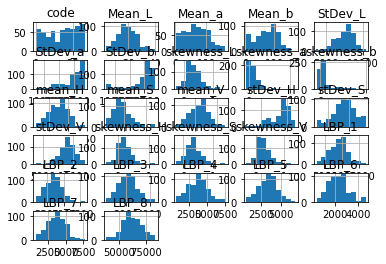

In [4]:
df.hist()

# Z-Score Normalization

In [4]:
subset = df.columns.difference(['code', 'label citra'])
Zscore_df=(df[subset]-df[subset].mean())/df[subset].std()

df[subset] = Zscore_df
# df.to_excel("Daftar_Fitur_Citra_normalized.xlsx") 

### shuffling for kfold

In [5]:
df_features = df.sample(frac=1)

In [ ]:
#df_features.to_csv('DF_Normalized+Shuffled.csv')

# Read Shuffled CSV

In [6]:
csv_file = "DF_Normalized+Shuffled.csv"

df_features = pd.read_csv(csv_file, index_col=0)
df_features

,code,label citra,Mean_L,Mean_a,Mean_b,StDev_L,StDev_a,StDev_b,skewness_L,skewness_a,...,skewness_S,skewness_V,LBP_1,LBP_2,LBP_3,LBP_4,LBP_5,LBP_6,LBP_7,LBP_8
166,11,SusKeong,-1.287566,-0.864668,-0.762791,-0.880434,-0.432944,-0.136066,1.377995,0.292694,...,1.456706,1.387921,-1.502735,-1.460043,-1.303459,-1.314593,-1.210175,-1.404066,-1.186091,1.447905
451,29,Mendhut,-0.669719,-0.194634,-1.203327,0.048935,0.175029,-0.662826,0.643332,-0.220422,...,1.035236,0.846738,-1.018234,-0.932187,-0.814206,-0.823070,-0.548431,-0.831135,-0.434891,0.855146
285,20,tahuBakso,-0.519003,0.009756,-0.008934,0.102000,0.551931,0.473973,0.556320,-0.263167,...,0.809036,0.525028,-0.727378,0.032597,-0.898861,0.110078,-0.543123,-0.892232,-0.567410,0.515855
481,30,Onde2,-0.689964,-0.560151,-0.295316,0.000175,-0.036451,0.209912,0.710165,0.052783,...,0.716021,0.601786,-0.563286,-0.894428,-0.803002,-1.012977,0.226551,-0.838051,-0.881847,0.709670
135,9,DadarGulung,-1.181115,-1.189197,-0.242888,-1.455787,-1.111011,0.198858,0.807905,0.720039,...,0.465754,0.702440,-0.669441,-0.641673,-0.786818,-0.628695,-0.621860,-0.750440,-0.709338,0.718698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,9,DadarGulung,-1.194261,-1.145201,-0.652505,-0.966534,-1.023717,-0.190470,1.167162,0.642018,...,0.652331,0.966775,-1.063729,-0.894428,-1.032067,-0.978719,-1.072164,-0.989065,-1.196285,1.101072
255,18,TapeGoreng,-0.348095,0.232619,0.129254,-0.104444,0.680498,0.500654,0.020617,-0.367966,...,0.142296,0.108607,-0.391805,0.056485,-0.393424,0.199446,-0.645747,-0.323912,-0.467041,0.295870
134,9,DadarGulung,-1.181518,-1.194530,-0.245174,-1.455147,-1.123367,0.195289,0.810547,0.730118,...,0.462502,0.703773,-0.662441,-0.630885,-0.896371,-0.643590,-0.603282,-0.825371,-0.671700,0.726926
110,7,LumpiaAyam,0.606830,0.337965,0.047881,1.776312,0.717516,0.428822,-0.215105,-0.415227,...,0.059859,-0.085284,0.155688,-0.220158,-0.516671,-0.190794,-0.404228,-0.506051,-0.179264,0.192106


### Printing Labels

In [7]:
train_labels = np.array(df['code'].drop_duplicates())
print(train_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]


### Printing Features Columns

In [8]:
FEATURES = np.array(df_features.columns.difference(['code', 'label citra']))
print(len(FEATURES))

26


## Lab + HSV Color Moments 

In [9]:
df_CMoments = df_features[['code','label citra','Mean_L', 'Mean_a', 'Mean_b','StDev_L', 'StDev_a','StDev_b','skewness_L', 'skewness_a', 'skewness_b',
                        'mean_H', 'mean_S', 'mean_V', 'stDev_H', 'stDev_S', 'stDev_V', 'skewness_H', 'skewness_S', 'skewness_V']]

## CIELab 

In [10]:
df_Lab = df_features[['code','label citra','Mean_L', 'Mean_a', 'Mean_b','StDev_L', 'StDev_a','StDev_b','skewness_L', 'skewness_a', 'skewness_b']]

## HSV

In [11]:
df_HSV = df_features[['code','label citra', 'mean_H', 'mean_S', 'mean_V', 'stDev_H', 'stDev_S', 'stDev_V', 'skewness_H', 'skewness_S', 'skewness_V']]

## LBP

In [12]:
df_LBP = df_features[['code','label citra', 'LBP_1','LBP_2','LBP_3','LBP_4','LBP_5','LBP_6','LBP_7','LBP_8']]

## L, a, b + LBP

In [13]:
df_LLBP = df_features[['code','label citra', 'Mean_L', 'StDev_L', 'skewness_L', 'LBP_1','LBP_2','LBP_3','LBP_4','LBP_5','LBP_6','LBP_7','LBP_8']]

In [14]:
df_aLBP = df_features[['code','label citra', 'Mean_a', 'StDev_a', 'skewness_a', 'LBP_1','LBP_2','LBP_3','LBP_4','LBP_5','LBP_6','LBP_7','LBP_8']]

In [15]:
df_bLBP = df_features[['code','label citra', 'Mean_b', 'StDev_b', 'skewness_b', 'LBP_1','LBP_2','LBP_3','LBP_4','LBP_5','LBP_6','LBP_7','LBP_8']]

## H, S, V + LBP

In [16]:
df_HLBP = df_features[['code','label citra', 'mean_H', 'stDev_H', 'skewness_H', 'LBP_1','LBP_2','LBP_3','LBP_4','LBP_5','LBP_6','LBP_7','LBP_8']]

In [17]:
df_SLBP = df_features[['code','label citra', 'mean_S', 'stDev_S', 'skewness_S', 'LBP_1','LBP_2','LBP_3','LBP_4','LBP_5','LBP_6','LBP_7','LBP_8']]

In [18]:
df_VLBP = df_features[['code','label citra', 'mean_V', 'stDev_V', 'skewness_V', 'LBP_1','LBP_2','LBP_3','LBP_4','LBP_5','LBP_6','LBP_7','LBP_8']]

# Pengklasifikasi MultiLayer Perceptron

In [19]:
def create_model(num_features=26):
    model = tf.keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(num_features,)),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(34, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               13824     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 34)                2210      
Total params: 89,954
Trainable params: 89,954
Non-trainable params: 0
_________________________________________________________________


# K-FOLD CROSS VALIDATION

In [20]:
def k_Fold_CrossV(df, title, fold):
    features = np.array(df.columns.difference(['code', 'label citra']))
    num_features = len(features)
    
    unique_groups = np.array_split(df, fold)
    
    acc_per_fold = []
    loss_per_fold = []
    
    for fold in range(len(unique_groups)):
        # Create a basic model instance
        model = create_model(num_features)
        
        # Assign test data
        df_testing = pd.DataFrame(unique_groups[fold])
        
        #TO CSV
        test_path = "Fold_Data/"+"test"+str(title)+"_"+str(fold+1)+".csv"
        df_testing.to_csv(test_path)

        test_ds = (
            tf.data.Dataset.from_tensors(
                (
                    tf.cast(df_testing[features].values, tf.float32),
                    tf.cast(df_testing['code'].values, tf.int32)
                )
            )
        ).shuffle(100)
        
        # Assign train data
        df_training = df.drop(df_testing.index)
        
        #TO CSV
        train_path = "Fold_Data/"+"train"+str(title)+"_"+str(fold+1)+".csv"
        df_training.to_csv(train_path)
        
        train_ds = (
            tf.data.Dataset.from_tensors(
                (
                    tf.cast(df_training[features].values, tf.float32),
                    tf.cast(df_training['code'].values, tf.int32)
                )
            )
        ).shuffle(100)

        print()
        print('-----------------------------------------------------------------------------------')
        print('Training untuk fold-',fold+1,'...')

        history = model.fit(train_ds, epochs=250, shuffle=True)
        print(history.history.keys())
        
        # Save the entire model to a HDF5 file.
#         saved_model_path = "HDF5/"+str(title)+"_"+str(fold+1)+".h5"
#         model.save(saved_model_path)
        
        loss, accuracy = model.evaluate(test_ds, verbose=0)
        print(f'Hasil fold-',fold+1, ': loss sebesar', loss, '; Akurasi sebesar', accuracy*100,'%')
        acc_per_fold.append(accuracy * 100)
        loss_per_fold.append(loss)
        
    # Average Score
    print('')
    print('>>>>>>>>>>>> HASIL PER FOLD <<<<<<<<<<<')

    for i in range(0, len(acc_per_fold)):
        print('------------------------------------------------------------------------')
        print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Akurasi: {acc_per_fold[i]}%')
        
    print()
    print('Rata-rata akurasi seluruh fold:')
    print(f'> Akurasi: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
    print('------------------------------------------------------------------------')

# CLASSIFICATION

### All Features

In [18]:
k_Fold_CrossV(df_features, "all", fold=10)


-----------------------------------------------------------------------------------
Training untuk fold- 1 ...
Epoch 1/250
1/1 [==============================] - 1s 508ms/step - loss: 3.5982 - accuracy: 0.0165
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 3.5441 - accuracy: 0.0165
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4825 - accuracy: 0.0474
Epoch 4/250
1/1 [==============================] - 0s 8ms/step - loss: 3.4408 - accuracy: 0.0825
Epoch 5/250
1/1 [==============================] - 0s 9ms/step - loss: 3.3776 - accuracy: 0.1258
Epoch 6/250
1/1 [==============================] - 0s 9ms/step - loss: 3.3441 - accuracy: 0.1340
Epoch 7/250
1/1 [==============================] - 0s 7ms/step - loss: 3.2875 - accuracy: 0.1670
Epoch 8/250
1/1 [==============================] - 0s 7ms/step - loss: 3.2397 - accuracy: 0.1876
Epoch 9/250
1/1 [==============================] - 0s 7ms/step - loss: 3.1940 - accuracy: 0.1959
Epoch 10/250


Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7673 - accuracy: 0.7691
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7776 - accuracy: 0.7567
Epoch 86/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7604 - accuracy: 0.7670
Epoch 87/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7439 - accuracy: 0.7814
Epoch 88/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7214 - accuracy: 0.7732
Epoch 89/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.8103
Epoch 90/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6960 - accuracy: 0.7794
Epoch 91/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 0.7897
Epoch 92/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6709 - accuracy: 0.7959
Epoch 93/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6868 - accuracy: 0.7938
Epoch 94/250
1/1 [==

Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2806 - accuracy: 0.9196
Epoch 168/250
1/1 [==============================] - 0s 8ms/step - loss: 0.2778 - accuracy: 0.9196
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2863 - accuracy: 0.9072
Epoch 170/250
1/1 [==============================] - 0s 8ms/step - loss: 0.2890 - accuracy: 0.9216
Epoch 171/250
1/1 [==============================] - 0s 8ms/step - loss: 0.2898 - accuracy: 0.9113
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2907 - accuracy: 0.9010
Epoch 173/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2917 - accuracy: 0.9072
Epoch 174/250
1/1 [==============================] - 0s 8ms/step - loss: 0.2846 - accuracy: 0.9052
Epoch 175/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2807 - accuracy: 0.9093
Epoch 176/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2942 - accuracy: 0.9072
Epoch 177/

Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1695 - accuracy: 0.9546
dict_keys(['loss', 'accuracy'])
Hasil fold- 1 : loss sebesar 0.3757151961326599 ; Akurasi sebesar 88.88888955116272 %

-----------------------------------------------------------------------------------
Training untuk fold- 2 ...
Epoch 1/250
1/1 [==============================] - 1s 552ms/step - loss: 3.5837 - accuracy: 0.0268
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 3.5171 - accuracy: 0.0330
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4612 - accuracy: 0.0598
Epoch 4/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4089 - accuracy: 0.0866
Epoch 5/250
1/1 [==============================] - 0s 8ms/step - loss: 3.3494 - accuracy: 0.1299
Epoch 6/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3042 - accuracy: 0.1814
Epoch 7/250
1/1 [==============================] - 0s 7ms/step - loss: 3.2496 - accurac

Epoch 82/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7563 - accuracy: 0.7526
Epoch 83/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7543 - accuracy: 0.7608
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7351 - accuracy: 0.7814
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7117 - accuracy: 0.7876
Epoch 86/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7217 - accuracy: 0.7753
Epoch 87/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7426 - accuracy: 0.7856
Epoch 88/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6858 - accuracy: 0.7794
Epoch 89/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6837 - accuracy: 0.7876
Epoch 90/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6538 - accuracy: 0.8103
Epoch 91/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6769 - accuracy: 0.7856
Epoch 92/250
1/1 [==

Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2960 - accuracy: 0.9072
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3010 - accuracy: 0.8907
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2896 - accuracy: 0.9052
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3015 - accuracy: 0.9175
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2886 - accuracy: 0.9175
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2649 - accuracy: 0.9216
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2880 - accuracy: 0.9072
Epoch 172/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2725 - accuracy: 0.9134
Epoch 173/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2534 - accuracy: 0.9155
Epoch 174/250
1/1 [==============================] - 0s 5ms/step - loss: 0.2605 - accuracy: 0.9237
Epoch 175/

Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1724 - accuracy: 0.9402
Epoch 249/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1489 - accuracy: 0.9670
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1410 - accuracy: 0.9588
dict_keys(['loss', 'accuracy'])
Hasil fold- 2 : loss sebesar 0.46866345405578613 ; Akurasi sebesar 87.03703880310059 %

-----------------------------------------------------------------------------------
Training untuk fold- 3 ...
Epoch 1/250
1/1 [==============================] - 1s 542ms/step - loss: 3.5103 - accuracy: 0.0351
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4356 - accuracy: 0.0722
Epoch 3/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3629 - accuracy: 0.1237
Epoch 4/250
1/1 [==============================] - 0s 8ms/step - loss: 3.2987 - accuracy: 0.1485
Epoch 5/250
1/1 [==============================] - 0s 7ms/step - loss: 3.2359 - ac

Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7213 - accuracy: 0.7773
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7414 - accuracy: 0.7711
Epoch 82/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7127 - accuracy: 0.7670
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6988 - accuracy: 0.7835
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6736 - accuracy: 0.7649
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6986 - accuracy: 0.7814
Epoch 86/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6571 - accuracy: 0.7979
Epoch 87/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6620 - accuracy: 0.7753
Epoch 88/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6636 - accuracy: 0.7732
Epoch 89/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6608 - accuracy: 0.7959
Epoch 90/250
1/1 [==

Epoch 163/250
1/1 [==============================] - 0s 8ms/step - loss: 0.2942 - accuracy: 0.9052
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2861 - accuracy: 0.9113
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2916 - accuracy: 0.9031
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2639 - accuracy: 0.9216
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2831 - accuracy: 0.9010
Epoch 168/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2882 - accuracy: 0.9031
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2909 - accuracy: 0.8990
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2580 - accuracy: 0.9216
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2792 - accuracy: 0.9113
Epoch 172/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2497 - accuracy: 0.9216
Epoch 173/

Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1774 - accuracy: 0.9485
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1600 - accuracy: 0.9588
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1396 - accuracy: 0.9711
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1407 - accuracy: 0.9732
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1484 - accuracy: 0.9670
dict_keys(['loss', 'accuracy'])
Hasil fold- 3 : loss sebesar 0.5036711692810059 ; Akurasi sebesar 88.88888955116272 %

-----------------------------------------------------------------------------------
Training untuk fold- 4 ...
Epoch 1/250
1/1 [==============================] - 1s 512ms/step - loss: 3.5499 - accuracy: 0.0165
Epoch 2/250
1/1 [==============================] - 0s 8ms/step - loss: 3.4738 - accuracy: 0.0433
Epoch 3/250
1/1 [==============================] - 0s 8ms/step - loss: 3.4125 -

Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8137 - accuracy: 0.7485
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7914 - accuracy: 0.7608
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7684 - accuracy: 0.7732
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7468 - accuracy: 0.7546
Epoch 82/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7095 - accuracy: 0.7918
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7373 - accuracy: 0.7588
Epoch 84/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7197 - accuracy: 0.7711
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6897 - accuracy: 0.7856
Epoch 86/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6644 - accuracy: 0.7918
Epoch 87/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6597 - accuracy: 0.8124
Epoch 88/250
1/1 [==

Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3002 - accuracy: 0.9031
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2596 - accuracy: 0.9258
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2852 - accuracy: 0.9093
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2946 - accuracy: 0.9113
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2778 - accuracy: 0.9134
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2827 - accuracy: 0.9031
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2463 - accuracy: 0.9258
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2510 - accuracy: 0.9278
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2674 - accuracy: 0.9175
Epoch 170/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2496 - accuracy: 0.9196
Epoch 171/

Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1482 - accuracy: 0.9608
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1548 - accuracy: 0.9567
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1704 - accuracy: 0.9361
Epoch 247/250
1/1 [==============================] - 0s 8ms/step - loss: 0.1520 - accuracy: 0.9588
Epoch 248/250
1/1 [==============================] - 0s 8ms/step - loss: 0.1542 - accuracy: 0.9567
Epoch 249/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1477 - accuracy: 0.9588
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1557 - accuracy: 0.9546
dict_keys(['loss', 'accuracy'])
Hasil fold- 4 : loss sebesar 0.7032590508460999 ; Akurasi sebesar 85.18518805503845 %

-----------------------------------------------------------------------------------
Training untuk fold- 5 ...
Epoch 1/250
1/1 [==============================] - 1s 569ms/step - loss: 3.56

Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7766 - accuracy: 0.7464
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7522 - accuracy: 0.7959
Epoch 78/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7596 - accuracy: 0.7629
Epoch 79/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7180 - accuracy: 0.7773
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7166 - accuracy: 0.7814
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7410 - accuracy: 0.7526
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6909 - accuracy: 0.7691
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6859 - accuracy: 0.8000
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7014 - accuracy: 0.7835
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6766 - accuracy: 0.7814
Epoch 86/250
1/1 [==

Epoch 159/250
1/1 [==============================] - 0s 5ms/step - loss: 0.2875 - accuracy: 0.9155
Epoch 160/250
1/1 [==============================] - 0s 5ms/step - loss: 0.2751 - accuracy: 0.9381
Epoch 161/250
1/1 [==============================] - 0s 5ms/step - loss: 0.2828 - accuracy: 0.9175
Epoch 162/250
1/1 [==============================] - 0s 5ms/step - loss: 0.2958 - accuracy: 0.9010
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2872 - accuracy: 0.9113
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2918 - accuracy: 0.9093
Epoch 165/250
1/1 [==============================] - 0s 5ms/step - loss: 0.2926 - accuracy: 0.9134
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2554 - accuracy: 0.9258
Epoch 167/250
1/1 [==============================] - 0s 5ms/step - loss: 0.2900 - accuracy: 0.8928
Epoch 168/250
1/1 [==============================] - 0s 5ms/step - loss: 0.2619 - accuracy: 0.9175
Epoch 169/

Epoch 242/250
1/1 [==============================] - 0s 5ms/step - loss: 0.1628 - accuracy: 0.9546
Epoch 243/250
1/1 [==============================] - 0s 5ms/step - loss: 0.1787 - accuracy: 0.9361
Epoch 244/250
1/1 [==============================] - 0s 5ms/step - loss: 0.1502 - accuracy: 0.9567
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1491 - accuracy: 0.9567
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1342 - accuracy: 0.9753
Epoch 247/250
1/1 [==============================] - 0s 9ms/step - loss: 0.1573 - accuracy: 0.9629
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1470 - accuracy: 0.9670
Epoch 249/250
1/1 [==============================] - 0s 5ms/step - loss: 0.1510 - accuracy: 0.9649
Epoch 250/250
1/1 [==============================] - 0s 5ms/step - loss: 0.1506 - accuracy: 0.9588
dict_keys(['loss', 'accuracy'])
Hasil fold- 5 : loss sebesar 0.724401593208313 ; Akurasi sebesar 81.481480598

Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9616 - accuracy: 0.7010
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9631 - accuracy: 0.6969
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9096 - accuracy: 0.7278
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8836 - accuracy: 0.7175
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9018 - accuracy: 0.7237
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8763 - accuracy: 0.7278
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8223 - accuracy: 0.7526
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8537 - accuracy: 0.7278
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8252 - accuracy: 0.7505
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8023 - accuracy: 0.7567
Epoch 84/250
1/1 [==

1/1 [==============================] - 0s 6ms/step - loss: 0.3241 - accuracy: 0.9052
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2858 - accuracy: 0.9320
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3225 - accuracy: 0.8928
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3135 - accuracy: 0.8969
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3107 - accuracy: 0.9052
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3222 - accuracy: 0.8948
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2922 - accuracy: 0.9072
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3064 - accuracy: 0.9196
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3160 - accuracy: 0.8866
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2618 - accuracy: 0.9258
Epoch 167/250
1/1 [=====

Epoch 240/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1800 - accuracy: 0.9485
Epoch 241/250
1/1 [==============================] - 0s 5ms/step - loss: 0.1628 - accuracy: 0.9567
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1448 - accuracy: 0.9608
Epoch 243/250
1/1 [==============================] - 0s 5ms/step - loss: 0.1785 - accuracy: 0.9443
Epoch 244/250
1/1 [==============================] - 0s 5ms/step - loss: 0.1420 - accuracy: 0.9649
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1622 - accuracy: 0.9526
Epoch 246/250
1/1 [==============================] - 0s 5ms/step - loss: 0.1651 - accuracy: 0.9608
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1522 - accuracy: 0.9629
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1473 - accuracy: 0.9588
Epoch 249/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1373 - accuracy: 0.9608
Epoch 250/

Epoch 72/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8588 - accuracy: 0.7423
Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8401 - accuracy: 0.7361
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8328 - accuracy: 0.7443
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8001 - accuracy: 0.7629
Epoch 76/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8246 - accuracy: 0.7175
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7875 - accuracy: 0.7526
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8054 - accuracy: 0.7464
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7727 - accuracy: 0.7546
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7433 - accuracy: 0.7670
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7512 - accuracy: 0.7691
Epoch 82/250
1/1 [==

Epoch 156/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3267 - accuracy: 0.8866
Epoch 157/250
1/1 [==============================] - 0s 5ms/step - loss: 0.3089 - accuracy: 0.9010
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3264 - accuracy: 0.8969
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3172 - accuracy: 0.9072
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3209 - accuracy: 0.9031
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3153 - accuracy: 0.8969
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3023 - accuracy: 0.9134
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2787 - accuracy: 0.9134
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2818 - accuracy: 0.9155
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3127 - accuracy: 0.9052
Epoch 166/

Epoch 239/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1718 - accuracy: 0.9505
Epoch 240/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1711 - accuracy: 0.9505
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1789 - accuracy: 0.9464
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1755 - accuracy: 0.9443
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1726 - accuracy: 0.9485
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1622 - accuracy: 0.9567
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1492 - accuracy: 0.9629
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1652 - accuracy: 0.9567
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1534 - accuracy: 0.9629
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1518 - accuracy: 0.9588
Epoch 249/

Epoch 71/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9449 - accuracy: 0.7093
Epoch 72/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9273 - accuracy: 0.6969
Epoch 73/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9267 - accuracy: 0.7216
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9123 - accuracy: 0.7155
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8550 - accuracy: 0.7546
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8611 - accuracy: 0.7361
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8674 - accuracy: 0.7216
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8061 - accuracy: 0.7567
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8584 - accuracy: 0.7196
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8096 - accuracy: 0.7443
Epoch 81/250
1/1 [==

Epoch 155/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3328 - accuracy: 0.8990
Epoch 156/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3399 - accuracy: 0.8990
Epoch 157/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3263 - accuracy: 0.8948
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.8907
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3076 - accuracy: 0.8969
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3248 - accuracy: 0.8928
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3171 - accuracy: 0.9010
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3013 - accuracy: 0.9155
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3107 - accuracy: 0.8969
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2880 - accuracy: 0.9072
Epoch 165/

Epoch 238/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1743 - accuracy: 0.9505
Epoch 239/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1701 - accuracy: 0.9567
Epoch 240/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1796 - accuracy: 0.9485
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1607 - accuracy: 0.9588
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1664 - accuracy: 0.9567
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1666 - accuracy: 0.9505
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1731 - accuracy: 0.9464
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1555 - accuracy: 0.9526
Epoch 246/250
1/1 [==============================] - 0s 5ms/step - loss: 0.1716 - accuracy: 0.9505
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1584 - accuracy: 0.9546
Epoch 248/

Epoch 70/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8472 - accuracy: 0.7608
Epoch 71/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8603 - accuracy: 0.7443
Epoch 72/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8188 - accuracy: 0.7402
Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8139 - accuracy: 0.7608
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7699 - accuracy: 0.7608
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7949 - accuracy: 0.7464
Epoch 76/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7891 - accuracy: 0.7485
Epoch 77/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7709 - accuracy: 0.7443
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7277 - accuracy: 0.7835
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7250 - accuracy: 0.7773
Epoch 80/250
1/1 [==

Epoch 154/250
1/1 [==============================] - 0s 5ms/step - loss: 0.2878 - accuracy: 0.9113
Epoch 155/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3016 - accuracy: 0.9072
Epoch 156/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2931 - accuracy: 0.9113
Epoch 157/250
1/1 [==============================] - 0s 5ms/step - loss: 0.3121 - accuracy: 0.8948
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2948 - accuracy: 0.9175
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2843 - accuracy: 0.9216
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2869 - accuracy: 0.9093
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2631 - accuracy: 0.9216
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2815 - accuracy: 0.9072
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2690 - accuracy: 0.9175
Epoch 164/

Epoch 237/250
1/1 [==============================] - 0s 5ms/step - loss: 0.1494 - accuracy: 0.9588
Epoch 238/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1635 - accuracy: 0.9608
Epoch 239/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1658 - accuracy: 0.9691
Epoch 240/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1590 - accuracy: 0.9588
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1633 - accuracy: 0.9443
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1478 - accuracy: 0.9608
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1409 - accuracy: 0.9588
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1584 - accuracy: 0.9526
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1350 - accuracy: 0.9629
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1487 - accuracy: 0.9546
Epoch 247/

Epoch 69/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8624 - accuracy: 0.7346
Epoch 70/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8813 - accuracy: 0.7263
Epoch 71/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8442 - accuracy: 0.7325
Epoch 72/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8255 - accuracy: 0.7593
Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8204 - accuracy: 0.7510
Epoch 74/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7906 - accuracy: 0.7490
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7523 - accuracy: 0.7716
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7530 - accuracy: 0.7613
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7547 - accuracy: 0.7551
Epoch 78/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7345 - accuracy: 0.7716
Epoch 79/250
1/1 [==

Epoch 153/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3145 - accuracy: 0.8971
Epoch 154/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3165 - accuracy: 0.9095
Epoch 155/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2824 - accuracy: 0.9218
Epoch 156/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3177 - accuracy: 0.8971
Epoch 157/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3153 - accuracy: 0.9095
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3099 - accuracy: 0.8992
Epoch 159/250
1/1 [==============================] - 0s 5ms/step - loss: 0.2877 - accuracy: 0.9239
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2898 - accuracy: 0.9053
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2756 - accuracy: 0.9218
Epoch 162/250
1/1 [==============================] - 0s 5ms/step - loss: 0.3111 - accuracy: 0.8971
Epoch 163/

Epoch 236/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1762 - accuracy: 0.9424
Epoch 237/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2041 - accuracy: 0.9444
Epoch 238/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1774 - accuracy: 0.9424
Epoch 239/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1989 - accuracy: 0.9362
Epoch 240/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1628 - accuracy: 0.9424
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1766 - accuracy: 0.9506
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1771 - accuracy: 0.9568
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.1731 - accuracy: 0.9486
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1557 - accuracy: 0.9630
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.1842 - accuracy: 0.9342
Epoch 246/

### LAB + HSV CM

In [19]:
k_Fold_CrossV(df_CMoments, "CM", fold=10)


-----------------------------------------------------------------------------------
Training untuk fold- 1 ...
Epoch 1/250
1/1 [==============================] - 1s 599ms/step - loss: 3.5338 - accuracy: 0.0268
Epoch 2/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4735 - accuracy: 0.0742
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4226 - accuracy: 0.0948
Epoch 4/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3757 - accuracy: 0.1526
Epoch 5/250
1/1 [==============================] - 0s 8ms/step - loss: 3.3347 - accuracy: 0.1773
Epoch 6/250
1/1 [==============================] - 0s 6ms/step - loss: 3.2810 - accuracy: 0.1979
Epoch 7/250
1/1 [==============================] - 0s 10ms/step - loss: 3.2140 - accuracy: 0.2124
Epoch 8/250
1/1 [==============================] - 0s 7ms/step - loss: 3.1688 - accuracy: 0.2124
Epoch 9/250
1/1 [==============================] - 0s 6ms/step - loss: 3.1174 - accuracy: 0.2041
Epoch 10/250

Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9293 - accuracy: 0.6804
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8865 - accuracy: 0.7237
Epoch 86/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8727 - accuracy: 0.7113
Epoch 87/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8625 - accuracy: 0.7196
Epoch 88/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8474 - accuracy: 0.7237
Epoch 89/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8474 - accuracy: 0.7216
Epoch 90/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8361 - accuracy: 0.7196
Epoch 91/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8239 - accuracy: 0.7402
Epoch 92/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8115 - accuracy: 0.7175
Epoch 93/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8398 - accuracy: 0.7010
Epoch 94/250
1/1 [==

Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4291 - accuracy: 0.8247
Epoch 168/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4138 - accuracy: 0.8577
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4471 - accuracy: 0.8536
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4387 - accuracy: 0.8392
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4369 - accuracy: 0.8515
Epoch 172/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4157 - accuracy: 0.8680
Epoch 173/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4050 - accuracy: 0.8619
Epoch 174/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4225 - accuracy: 0.8557
Epoch 175/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3995 - accuracy: 0.8784
Epoch 176/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4261 - accuracy: 0.8536
Epoch 177/

Epoch 250/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2917 - accuracy: 0.8928
dict_keys(['loss', 'accuracy'])
Hasil fold- 1 : loss sebesar 0.6659743189811707 ; Akurasi sebesar 81.4814805984497 %

-----------------------------------------------------------------------------------
Training untuk fold- 2 ...
Epoch 1/250
1/1 [==============================] - 1s 565ms/step - loss: 3.5594 - accuracy: 0.0289
Epoch 2/250
1/1 [==============================] - 0s 8ms/step - loss: 3.4876 - accuracy: 0.0433
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4372 - accuracy: 0.0680
Epoch 4/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3917 - accuracy: 0.0990
Epoch 5/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3319 - accuracy: 0.1237
Epoch 6/250
1/1 [==============================] - 0s 6ms/step - loss: 3.2822 - accuracy: 0.1464
Epoch 7/250
1/1 [==============================] - 0s 6ms/step - loss: 3.2298 - accuracy

Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9090 - accuracy: 0.7175
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8986 - accuracy: 0.7031
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8721 - accuracy: 0.7072
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9093 - accuracy: 0.7031
Epoch 86/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8836 - accuracy: 0.6825
Epoch 87/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8652 - accuracy: 0.7031
Epoch 88/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8747 - accuracy: 0.7155
Epoch 89/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8337 - accuracy: 0.7072
Epoch 90/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8433 - accuracy: 0.7381
Epoch 91/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8121 - accuracy: 0.7340
Epoch 92/250
1/1 [==

Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4517 - accuracy: 0.8412
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4430 - accuracy: 0.8495
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4247 - accuracy: 0.8536
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4267 - accuracy: 0.8722
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4544 - accuracy: 0.8495
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4411 - accuracy: 0.8495
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4142 - accuracy: 0.8701
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4283 - accuracy: 0.8495
Epoch 173/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4462 - accuracy: 0.8412
Epoch 174/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4233 - accuracy: 0.8557
Epoch 175/

Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3015 - accuracy: 0.8928
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3058 - accuracy: 0.9010
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2842 - accuracy: 0.9052
dict_keys(['loss', 'accuracy'])
Hasil fold- 2 : loss sebesar 0.5241437554359436 ; Akurasi sebesar 83.33333134651184 %

-----------------------------------------------------------------------------------
Training untuk fold- 3 ...
Epoch 1/250
1/1 [==============================] - 1s 622ms/step - loss: 3.4950 - accuracy: 0.0722
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4375 - accuracy: 0.1093
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3767 - accuracy: 0.1381
Epoch 4/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3175 - accuracy: 0.1340
Epoch 5/250
1/1 [==============================] - 0s 9ms/step - loss: 3.2661 - acc

Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9395 - accuracy: 0.6928
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9461 - accuracy: 0.6784
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9176 - accuracy: 0.6866
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9462 - accuracy: 0.6639
Epoch 84/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9510 - accuracy: 0.6701
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9016 - accuracy: 0.6845
Epoch 86/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9103 - accuracy: 0.6784
Epoch 87/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8537 - accuracy: 0.6907
Epoch 88/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8960 - accuracy: 0.6866
Epoch 89/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8392 - accuracy: 0.7072
Epoch 90/250
1/1 [==

Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4757 - accuracy: 0.8289
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4543 - accuracy: 0.8371
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4577 - accuracy: 0.8412
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4692 - accuracy: 0.8351
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4670 - accuracy: 0.8330
Epoch 168/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4467 - accuracy: 0.8454
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4744 - accuracy: 0.8371
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4603 - accuracy: 0.8371
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4224 - accuracy: 0.8412
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4745 - accuracy: 0.8289
Epoch 173/

Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3040 - accuracy: 0.8948
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3205 - accuracy: 0.8784
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2977 - accuracy: 0.8969
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3072 - accuracy: 0.9010
Epoch 250/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2953 - accuracy: 0.8969
dict_keys(['loss', 'accuracy'])
Hasil fold- 3 : loss sebesar 0.5728638172149658 ; Akurasi sebesar 85.18518805503845 %

-----------------------------------------------------------------------------------
Training untuk fold- 4 ...
Epoch 1/250
1/1 [==============================] - 1s 745ms/step - loss: 3.5080 - accuracy: 0.0289
Epoch 2/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4613 - accuracy: 0.0763
Epoch 3/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3943 -

Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9658 - accuracy: 0.6887
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9732 - accuracy: 0.6763
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9412 - accuracy: 0.6825
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9579 - accuracy: 0.6557
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9456 - accuracy: 0.6845
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9273 - accuracy: 0.6804
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9027 - accuracy: 0.7010
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9083 - accuracy: 0.6763
Epoch 86/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8831 - accuracy: 0.6969
Epoch 87/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8807 - accuracy: 0.7134
Epoch 88/250
1/1 [==

Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4427 - accuracy: 0.8351
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4283 - accuracy: 0.8474
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4739 - accuracy: 0.8577
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4405 - accuracy: 0.8495
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8351
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4292 - accuracy: 0.8474
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4546 - accuracy: 0.8412
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4471 - accuracy: 0.8536
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4297 - accuracy: 0.8660
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4366 - accuracy: 0.8639
Epoch 171/

Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2974 - accuracy: 0.8969
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2839 - accuracy: 0.8907
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2851 - accuracy: 0.9072
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3067 - accuracy: 0.8948
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2741 - accuracy: 0.9237
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2820 - accuracy: 0.9052
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2854 - accuracy: 0.9093
dict_keys(['loss', 'accuracy'])
Hasil fold- 4 : loss sebesar 0.9455583095550537 ; Akurasi sebesar 79.62962985038757 %

-----------------------------------------------------------------------------------
Training untuk fold- 5 ...
Epoch 1/250
1/1 [==============================] - 1s 594ms/step - loss: 3.53

Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9822 - accuracy: 0.6907
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9663 - accuracy: 0.6660
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9632 - accuracy: 0.6577
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9354 - accuracy: 0.6722
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9487 - accuracy: 0.6845
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9214 - accuracy: 0.7052
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9159 - accuracy: 0.6825
Epoch 83/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8956 - accuracy: 0.6866
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8948 - accuracy: 0.7010
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8781 - accuracy: 0.6990
Epoch 86/250
1/1 [==

Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4628 - accuracy: 0.8371
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4888 - accuracy: 0.8351
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4695 - accuracy: 0.8371
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4525 - accuracy: 0.8186
Epoch 163/250
1/1 [==============================] - 0s 5ms/step - loss: 0.4496 - accuracy: 0.8557
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4409 - accuracy: 0.8454
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4411 - accuracy: 0.8392
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4501 - accuracy: 0.8371
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4663 - accuracy: 0.8247
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4472 - accuracy: 0.8392
Epoch 169/

Epoch 242/250
1/1 [==============================] - 0s 5ms/step - loss: 0.2909 - accuracy: 0.8887
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3077 - accuracy: 0.9010
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2897 - accuracy: 0.9010
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3231 - accuracy: 0.8804
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3072 - accuracy: 0.8928
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3191 - accuracy: 0.8742
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2965 - accuracy: 0.9072
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3102 - accuracy: 0.8948
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2783 - accuracy: 0.9052
dict_keys(['loss', 'accuracy'])
Hasil fold- 5 : loss sebesar 0.41630077362060547 ; Akurasi sebesar 85.1851880

Epoch 74/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0820 - accuracy: 0.6474
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0604 - accuracy: 0.6433
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0390 - accuracy: 0.6557
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0272 - accuracy: 0.6660
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0415 - accuracy: 0.6392
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0174 - accuracy: 0.6577
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9940 - accuracy: 0.6557
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9871 - accuracy: 0.6763
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9561 - accuracy: 0.6742
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9508 - accuracy: 0.7031
Epoch 84/250
1/1 [==

Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4761 - accuracy: 0.8392
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4807 - accuracy: 0.8351
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.5002 - accuracy: 0.8330
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4983 - accuracy: 0.8206
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4764 - accuracy: 0.8330
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4712 - accuracy: 0.8371
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4644 - accuracy: 0.8351
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4662 - accuracy: 0.8433
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4848 - accuracy: 0.8412
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4557 - accuracy: 0.8392
Epoch 168/

Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3217 - accuracy: 0.8804
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2962 - accuracy: 0.8990
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3012 - accuracy: 0.9072
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2960 - accuracy: 0.8948
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2864 - accuracy: 0.9072
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2871 - accuracy: 0.9010
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3001 - accuracy: 0.8969
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2920 - accuracy: 0.9072
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2667 - accuracy: 0.9093
Epoch 250/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2684 - accuracy: 0.8990
dict_keys(

Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0092 - accuracy: 0.6598
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0240 - accuracy: 0.6557
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0159 - accuracy: 0.6763
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9902 - accuracy: 0.6536
Epoch 77/250
1/1 [==============================] - 0s 8ms/step - loss: 1.0002 - accuracy: 0.6577
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9495 - accuracy: 0.6825
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9303 - accuracy: 0.6866
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9196 - accuracy: 0.7113
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9328 - accuracy: 0.6907
Epoch 82/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9149 - accuracy: 0.6763
Epoch 83/250
1/1 [==

Epoch 157/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4616 - accuracy: 0.8247
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4966 - accuracy: 0.8165
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4443 - accuracy: 0.8371
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4815 - accuracy: 0.8330
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5108 - accuracy: 0.8124
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4733 - accuracy: 0.8165
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4742 - accuracy: 0.8227
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4739 - accuracy: 0.8268
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4629 - accuracy: 0.8412
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4678 - accuracy: 0.8536
Epoch 167/

Epoch 240/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.8948
Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3161 - accuracy: 0.8866
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2958 - accuracy: 0.8969
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3109 - accuracy: 0.8866
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3214 - accuracy: 0.8742
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3171 - accuracy: 0.8969
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2775 - accuracy: 0.9155
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3084 - accuracy: 0.8887
Epoch 248/250
1/1 [==============================] - 0s 5ms/step - loss: 0.3003 - accuracy: 0.8907
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2863 - accuracy: 0.9052
Epoch 250/

Epoch 72/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0286 - accuracy: 0.6639
Epoch 73/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9966 - accuracy: 0.6845
Epoch 74/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0306 - accuracy: 0.6660
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9769 - accuracy: 0.6907
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9694 - accuracy: 0.6804
Epoch 77/250
1/1 [==============================] - 0s 8ms/step - loss: 0.9723 - accuracy: 0.6887
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9584 - accuracy: 0.6557
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9706 - accuracy: 0.6557
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9504 - accuracy: 0.6474
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9038 - accuracy: 0.7093
Epoch 82/250
1/1 [==

1/1 [==============================] - 0s 7ms/step - loss: 0.4496 - accuracy: 0.8495
Epoch 156/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4597 - accuracy: 0.8557
Epoch 157/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4802 - accuracy: 0.8371
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4808 - accuracy: 0.8351
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4739 - accuracy: 0.8392
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4841 - accuracy: 0.8351
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4695 - accuracy: 0.8412
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4647 - accuracy: 0.8433
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4298 - accuracy: 0.8619
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4641 - accuracy: 0.8433
Epoch 165/250
1/1 [=====

Epoch 238/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2824 - accuracy: 0.9093
Epoch 239/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2973 - accuracy: 0.8948
Epoch 240/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2879 - accuracy: 0.8969
Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2928 - accuracy: 0.9031
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2848 - accuracy: 0.9113
Epoch 243/250
1/1 [==============================] - 0s 8ms/step - loss: 0.2918 - accuracy: 0.8948
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2982 - accuracy: 0.8887
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2889 - accuracy: 0.8969
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3057 - accuracy: 0.8928
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3183 - accuracy: 0.8845
Epoch 248/

Epoch 70/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0752 - accuracy: 0.6351
Epoch 71/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0670 - accuracy: 0.6433
Epoch 72/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0251 - accuracy: 0.6660
Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0329 - accuracy: 0.6536
Epoch 74/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0265 - accuracy: 0.6619
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9850 - accuracy: 0.6742
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9739 - accuracy: 0.6660
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9977 - accuracy: 0.6412
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9483 - accuracy: 0.6763
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9451 - accuracy: 0.6536
Epoch 80/250
1/1 [==

Epoch 154/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4638 - accuracy: 0.8309
Epoch 155/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4596 - accuracy: 0.8577
Epoch 156/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4759 - accuracy: 0.8433
Epoch 157/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4447 - accuracy: 0.8454
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4595 - accuracy: 0.8289
Epoch 159/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4677 - accuracy: 0.8433
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4378 - accuracy: 0.8577
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4385 - accuracy: 0.8454
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4368 - accuracy: 0.8598
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4551 - accuracy: 0.8268
Epoch 164/

Epoch 237/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2818 - accuracy: 0.9010
Epoch 238/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2820 - accuracy: 0.9072
Epoch 239/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2949 - accuracy: 0.9052
Epoch 240/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2906 - accuracy: 0.9052
Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3061 - accuracy: 0.8990
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3005 - accuracy: 0.9052
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 0.9031
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2601 - accuracy: 0.9216
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2938 - accuracy: 0.9072
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 0.9134
Epoch 247/

Epoch 69/250
1/1 [==============================] - 0s 6ms/step - loss: 1.1459 - accuracy: 0.6337
Epoch 70/250
1/1 [==============================] - 0s 7ms/step - loss: 1.1046 - accuracy: 0.6358
Epoch 71/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0863 - accuracy: 0.6420
Epoch 72/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0962 - accuracy: 0.6337
Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0571 - accuracy: 0.6379
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0331 - accuracy: 0.6605
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0225 - accuracy: 0.6584
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0034 - accuracy: 0.6790
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0047 - accuracy: 0.6770
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9812 - accuracy: 0.6852
Epoch 79/250
1/1 [==

Epoch 153/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4678 - accuracy: 0.8498
Epoch 154/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4625 - accuracy: 0.8477
Epoch 155/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4859 - accuracy: 0.8189
Epoch 156/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4550 - accuracy: 0.8477
Epoch 157/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4738 - accuracy: 0.8519
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4645 - accuracy: 0.8477
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4704 - accuracy: 0.8313
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4595 - accuracy: 0.8457
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4737 - accuracy: 0.8354
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4718 - accuracy: 0.8333
Epoch 163/

Epoch 236/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3048 - accuracy: 0.8992
Epoch 237/250
1/1 [==============================] - 0s 7ms/step - loss: 0.3089 - accuracy: 0.8971
Epoch 238/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2764 - accuracy: 0.9115
Epoch 239/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2881 - accuracy: 0.8951
Epoch 240/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2974 - accuracy: 0.9074
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2790 - accuracy: 0.9156
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2939 - accuracy: 0.8971
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3059 - accuracy: 0.8971
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2888 - accuracy: 0.9012
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.2815 - accuracy: 0.8992
Epoch 246/

## Lab Color Moments

In [20]:
#LAB CM
k_Fold_CrossV(df_Lab, "Lab",fold=10)


-----------------------------------------------------------------------------------
Training untuk fold- 1 ...
Epoch 1/250
1/1 [==============================] - 1s 613ms/step - loss: 3.5494 - accuracy: 0.0206
Epoch 2/250
1/1 [==============================] - 0s 6ms/step - loss: 3.5034 - accuracy: 0.0268
Epoch 3/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4654 - accuracy: 0.0948
Epoch 4/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4262 - accuracy: 0.1113
Epoch 5/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3947 - accuracy: 0.1216
Epoch 6/250
1/1 [==============================] - 0s 5ms/step - loss: 3.3549 - accuracy: 0.1134
Epoch 7/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3076 - accuracy: 0.1258
Epoch 8/250
1/1 [==============================] - 0s 6ms/step - loss: 3.2788 - accuracy: 0.1340
Epoch 9/250
1/1 [==============================] - 0s 6ms/step - loss: 3.2265 - accuracy: 0.1464
Epoch 10/250


Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4650 - accuracy: 0.5361
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4537 - accuracy: 0.5093
Epoch 86/250
1/1 [==============================] - 0s 5ms/step - loss: 1.4463 - accuracy: 0.5299
Epoch 87/250
1/1 [==============================] - 0s 5ms/step - loss: 1.3916 - accuracy: 0.5670
Epoch 88/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4095 - accuracy: 0.5423
Epoch 89/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4180 - accuracy: 0.5320
Epoch 90/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3793 - accuracy: 0.5629
Epoch 91/250
1/1 [==============================] - 0s 5ms/step - loss: 1.3852 - accuracy: 0.5649
Epoch 92/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3642 - accuracy: 0.5402
Epoch 93/250
1/1 [==============================] - 0s 5ms/step - loss: 1.3612 - accuracy: 0.5526
Epoch 94/250
1/1 [==

Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8901 - accuracy: 0.6845
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8645 - accuracy: 0.7031
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8920 - accuracy: 0.6784
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8521 - accuracy: 0.6948
Epoch 171/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8312 - accuracy: 0.7155
Epoch 172/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8311 - accuracy: 0.7196
Epoch 173/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8464 - accuracy: 0.7299
Epoch 174/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8591 - accuracy: 0.6948
Epoch 175/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8509 - accuracy: 0.7031
Epoch 176/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8279 - accuracy: 0.7237
Epoch 177/

Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6613 - accuracy: 0.7691
dict_keys(['loss', 'accuracy'])
Hasil fold- 1 : loss sebesar 1.3976069688796997 ; Akurasi sebesar 55.55555820465088 %

-----------------------------------------------------------------------------------
Training untuk fold- 2 ...
Epoch 1/250
1/1 [==============================] - 1s 703ms/step - loss: 3.5387 - accuracy: 0.0165
Epoch 2/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4976 - accuracy: 0.0474
Epoch 3/250
1/1 [==============================] - 0s 5ms/step - loss: 3.4544 - accuracy: 0.0804
Epoch 4/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4210 - accuracy: 0.1175
Epoch 5/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3806 - accuracy: 0.1505
Epoch 6/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3472 - accuracy: 0.1443
Epoch 7/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3049 - accurac

Epoch 82/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4928 - accuracy: 0.5278
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4584 - accuracy: 0.5526
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4812 - accuracy: 0.5361
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4469 - accuracy: 0.5485
Epoch 86/250
1/1 [==============================] - 0s 5ms/step - loss: 1.4743 - accuracy: 0.5299
Epoch 87/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4095 - accuracy: 0.5670
Epoch 88/250
1/1 [==============================] - 0s 5ms/step - loss: 1.4219 - accuracy: 0.5175
Epoch 89/250
1/1 [==============================] - 0s 5ms/step - loss: 1.4230 - accuracy: 0.5381
Epoch 90/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3959 - accuracy: 0.5464
Epoch 91/250
1/1 [==============================] - 0s 5ms/step - loss: 1.3828 - accuracy: 0.5608
Epoch 92/250
1/1 [==

Epoch 165/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8484 - accuracy: 0.7113
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8780 - accuracy: 0.6907
Epoch 167/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8753 - accuracy: 0.7155
Epoch 168/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8567 - accuracy: 0.6969
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8544 - accuracy: 0.6825
Epoch 170/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8444 - accuracy: 0.7072
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8287 - accuracy: 0.6866
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8459 - accuracy: 0.6948
Epoch 173/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8421 - accuracy: 0.7093
Epoch 174/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8330 - accuracy: 0.7155
Epoch 175/

Epoch 248/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6571 - accuracy: 0.7505
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6487 - accuracy: 0.7691
Epoch 250/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6528 - accuracy: 0.7423
dict_keys(['loss', 'accuracy'])
Hasil fold- 2 : loss sebesar 1.0872454643249512 ; Akurasi sebesar 57.40740895271301 %

-----------------------------------------------------------------------------------
Training untuk fold- 3 ...
Epoch 1/250
1/1 [==============================] - 1s 719ms/step - loss: 3.5523 - accuracy: 0.0289
Epoch 2/250
1/1 [==============================] - 0s 5ms/step - loss: 3.5080 - accuracy: 0.0392
Epoch 3/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4803 - accuracy: 0.0598
Epoch 4/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4365 - accuracy: 0.1381
Epoch 5/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3940 - acc

Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4720 - accuracy: 0.5175
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4602 - accuracy: 0.5031
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4637 - accuracy: 0.5196
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4557 - accuracy: 0.5340
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4426 - accuracy: 0.5340
Epoch 85/250
1/1 [==============================] - 0s 5ms/step - loss: 1.4174 - accuracy: 0.5526
Epoch 86/250
1/1 [==============================] - 0s 5ms/step - loss: 1.4226 - accuracy: 0.5505
Epoch 87/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3921 - accuracy: 0.5629
Epoch 88/250
1/1 [==============================] - 0s 5ms/step - loss: 1.3954 - accuracy: 0.5443
Epoch 89/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4019 - accuracy: 0.5485
Epoch 90/250
1/1 [==

Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9135 - accuracy: 0.6784
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8976 - accuracy: 0.6845
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9025 - accuracy: 0.6907
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9110 - accuracy: 0.6577
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9059 - accuracy: 0.6907
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9202 - accuracy: 0.6763
Epoch 169/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8977 - accuracy: 0.6619
Epoch 170/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8536 - accuracy: 0.7155
Epoch 171/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8478 - accuracy: 0.7113
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8623 - accuracy: 0.6907
Epoch 173/

Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6222 - accuracy: 0.7732
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6666 - accuracy: 0.7567
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6308 - accuracy: 0.7794
Epoch 249/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6587 - accuracy: 0.7608
Epoch 250/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6296 - accuracy: 0.7979
dict_keys(['loss', 'accuracy'])
Hasil fold- 3 : loss sebesar 1.17013418674469 ; Akurasi sebesar 68.5185194015503 %

-----------------------------------------------------------------------------------
Training untuk fold- 4 ...
Epoch 1/250
1/1 [==============================] - 1s 708ms/step - loss: 3.5358 - accuracy: 0.0247
Epoch 2/250
1/1 [==============================] - 0s 5ms/step - loss: 3.4794 - accuracy: 0.0577
Epoch 3/250
1/1 [==============================] - 0s 5ms/step - loss: 3.4429 - ac

Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4818 - accuracy: 0.5196
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4486 - accuracy: 0.5381
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4309 - accuracy: 0.5423
Epoch 81/250
1/1 [==============================] - 0s 5ms/step - loss: 1.4323 - accuracy: 0.5155
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4098 - accuracy: 0.5361
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4106 - accuracy: 0.5505
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4089 - accuracy: 0.5464
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3693 - accuracy: 0.5649
Epoch 86/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3996 - accuracy: 0.5485
Epoch 87/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4099 - accuracy: 0.5464
Epoch 88/250
1/1 [==

Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9293 - accuracy: 0.6804
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9310 - accuracy: 0.6804
Epoch 163/250
1/1 [==============================] - 0s 5ms/step - loss: 0.9250 - accuracy: 0.6763
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9320 - accuracy: 0.6557
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9137 - accuracy: 0.6825
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9343 - accuracy: 0.6598
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9106 - accuracy: 0.6784
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8844 - accuracy: 0.6866
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9031 - accuracy: 0.6784
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9039 - accuracy: 0.6866
Epoch 171/

Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7114 - accuracy: 0.7361
Epoch 245/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7026 - accuracy: 0.7588
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7062 - accuracy: 0.7464
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6645 - accuracy: 0.7485
Epoch 248/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6987 - accuracy: 0.7237
Epoch 249/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7236 - accuracy: 0.7526
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6757 - accuracy: 0.7381
dict_keys(['loss', 'accuracy'])
Hasil fold- 4 : loss sebesar 1.41448974609375 ; Akurasi sebesar 64.81481194496155 %

-----------------------------------------------------------------------------------
Training untuk fold- 5 ...
Epoch 1/250
1/1 [==============================] - 1s 686ms/step - loss: 3.5482

Epoch 76/250
1/1 [==============================] - 0s 5ms/step - loss: 1.5762 - accuracy: 0.4619
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5446 - accuracy: 0.4948
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5151 - accuracy: 0.4969
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5324 - accuracy: 0.4887
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5349 - accuracy: 0.5093
Epoch 81/250
1/1 [==============================] - 0s 5ms/step - loss: 1.5023 - accuracy: 0.5010
Epoch 82/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4717 - accuracy: 0.5258
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4869 - accuracy: 0.5237
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4663 - accuracy: 0.5237
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4521 - accuracy: 0.5196
Epoch 86/250
1/1 [==

Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9210 - accuracy: 0.6784
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9282 - accuracy: 0.6660
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9366 - accuracy: 0.6619
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9335 - accuracy: 0.6887
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9291 - accuracy: 0.6907
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9217 - accuracy: 0.6907
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9500 - accuracy: 0.6701
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9058 - accuracy: 0.6784
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9119 - accuracy: 0.6784
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9181 - accuracy: 0.6825
Epoch 169/

Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.7753
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.7711
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7013 - accuracy: 0.7546
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6763 - accuracy: 0.7588
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6847 - accuracy: 0.7608
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6812 - accuracy: 0.7567
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6743 - accuracy: 0.7670
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6616 - accuracy: 0.7918
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6731 - accuracy: 0.7691
dict_keys(['loss', 'accuracy'])
Hasil fold- 5 : loss sebesar 0.7387707829475403 ; Akurasi sebesar 72.22222089

Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 1.6416 - accuracy: 0.4763
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 1.6241 - accuracy: 0.4928
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5825 - accuracy: 0.4722
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 1.6256 - accuracy: 0.4969
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5988 - accuracy: 0.4660
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5917 - accuracy: 0.4866
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5445 - accuracy: 0.5093
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5453 - accuracy: 0.4804
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 1.5709 - accuracy: 0.4948
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5280 - accuracy: 0.5031
Epoch 84/250
1/1 [==

Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0111 - accuracy: 0.6660
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0047 - accuracy: 0.6371
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9721 - accuracy: 0.6701
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9674 - accuracy: 0.6598
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9586 - accuracy: 0.6742
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9776 - accuracy: 0.6577
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9448 - accuracy: 0.6454
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9552 - accuracy: 0.6598
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9740 - accuracy: 0.6639
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9515 - accuracy: 0.6557
Epoch 168/

Epoch 241/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7120 - accuracy: 0.7526
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7207 - accuracy: 0.7546
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6876 - accuracy: 0.7567
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6760 - accuracy: 0.7629
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7186 - accuracy: 0.7237
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7017 - accuracy: 0.7443
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6751 - accuracy: 0.7732
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7100 - accuracy: 0.7423
Epoch 249/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7216 - accuracy: 0.7320
Epoch 250/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7014 - accuracy: 0.7588
dict_keys(

Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4563 - accuracy: 0.5340
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4929 - accuracy: 0.4948
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4619 - accuracy: 0.5320
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4534 - accuracy: 0.5443
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4496 - accuracy: 0.5196
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4234 - accuracy: 0.5196
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4391 - accuracy: 0.5237
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4098 - accuracy: 0.5443
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4010 - accuracy: 0.5505
Epoch 82/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3882 - accuracy: 0.5340
Epoch 83/250
1/1 [==

Epoch 157/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9127 - accuracy: 0.7052
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9121 - accuracy: 0.6866
Epoch 159/250
1/1 [==============================] - 0s 5ms/step - loss: 0.9370 - accuracy: 0.6701
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9117 - accuracy: 0.6990
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8931 - accuracy: 0.6948
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9126 - accuracy: 0.6866
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9376 - accuracy: 0.6845
Epoch 164/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8519 - accuracy: 0.6969
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8653 - accuracy: 0.6866
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8685 - accuracy: 0.6990
Epoch 167/

Epoch 240/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7036 - accuracy: 0.7526
Epoch 241/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7065 - accuracy: 0.7505
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6767 - accuracy: 0.7629
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6802 - accuracy: 0.7423
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.7629
Epoch 245/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7030 - accuracy: 0.7464
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6708 - accuracy: 0.7835
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6664 - accuracy: 0.7588
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6688 - accuracy: 0.7649
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6755 - accuracy: 0.7402
Epoch 250/

Epoch 72/250
1/1 [==============================] - 0s 5ms/step - loss: 1.6108 - accuracy: 0.4969
Epoch 73/250
1/1 [==============================] - 0s 5ms/step - loss: 1.5958 - accuracy: 0.4907
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5866 - accuracy: 0.5175
Epoch 75/250
1/1 [==============================] - 0s 5ms/step - loss: 1.5752 - accuracy: 0.5093
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5697 - accuracy: 0.5072
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5465 - accuracy: 0.5113
Epoch 78/250
1/1 [==============================] - 0s 5ms/step - loss: 1.5215 - accuracy: 0.5072
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5319 - accuracy: 0.5072
Epoch 80/250
1/1 [==============================] - 0s 5ms/step - loss: 1.5217 - accuracy: 0.4990
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5023 - accuracy: 0.5175
Epoch 82/250
1/1 [==

Epoch 156/250
1/1 [==============================] - 0s 5ms/step - loss: 0.9484 - accuracy: 0.6887
Epoch 157/250
1/1 [==============================] - 0s 5ms/step - loss: 0.9295 - accuracy: 0.6742
Epoch 158/250
1/1 [==============================] - 0s 5ms/step - loss: 0.9558 - accuracy: 0.6557
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9138 - accuracy: 0.6577
Epoch 160/250
1/1 [==============================] - 0s 5ms/step - loss: 0.9176 - accuracy: 0.6784
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9177 - accuracy: 0.6619
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9097 - accuracy: 0.6763
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9235 - accuracy: 0.6557
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8968 - accuracy: 0.6866
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9109 - accuracy: 0.6701
Epoch 166/

Epoch 239/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6830 - accuracy: 0.7588
Epoch 240/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6723 - accuracy: 0.7381
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6682 - accuracy: 0.7423
Epoch 242/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6682 - accuracy: 0.7567
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6654 - accuracy: 0.7711
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6951 - accuracy: 0.7485
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6243 - accuracy: 0.7814
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6707 - accuracy: 0.7794
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6525 - accuracy: 0.7794
Epoch 248/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6611 - accuracy: 0.7753
Epoch 249/

Epoch 71/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5513 - accuracy: 0.5031
Epoch 72/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5259 - accuracy: 0.5113
Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5422 - accuracy: 0.5134
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5196 - accuracy: 0.5278
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4930 - accuracy: 0.5320
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4921 - accuracy: 0.5113
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4681 - accuracy: 0.5093
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4623 - accuracy: 0.5216
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4249 - accuracy: 0.5423
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4296 - accuracy: 0.5175
Epoch 81/250
1/1 [==

Epoch 155/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9035 - accuracy: 0.6701
Epoch 156/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9032 - accuracy: 0.6557
Epoch 157/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8962 - accuracy: 0.6515
Epoch 158/250
1/1 [==============================] - 0s 5ms/step - loss: 0.9012 - accuracy: 0.6990
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9074 - accuracy: 0.6680
Epoch 160/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8888 - accuracy: 0.6619
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8953 - accuracy: 0.6557
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8516 - accuracy: 0.6742
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8739 - accuracy: 0.6845
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8516 - accuracy: 0.7031
Epoch 165/

Epoch 238/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6294 - accuracy: 0.7732
Epoch 239/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6350 - accuracy: 0.7711
Epoch 240/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6448 - accuracy: 0.7567
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6409 - accuracy: 0.7608
Epoch 242/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6248 - accuracy: 0.7753
Epoch 243/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6419 - accuracy: 0.7629
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6510 - accuracy: 0.7629
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6255 - accuracy: 0.7649
Epoch 246/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6169 - accuracy: 0.7732
Epoch 247/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6164 - accuracy: 0.7856
Epoch 248/

Epoch 70/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5889 - accuracy: 0.4815
Epoch 71/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5986 - accuracy: 0.4568
Epoch 72/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5988 - accuracy: 0.4733
Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5520 - accuracy: 0.4897
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5227 - accuracy: 0.4938
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5203 - accuracy: 0.5062
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4936 - accuracy: 0.5082
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5153 - accuracy: 0.4959
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4748 - accuracy: 0.5021
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4824 - accuracy: 0.5165
Epoch 80/250
1/1 [==

Epoch 154/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9636 - accuracy: 0.6749
Epoch 155/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9926 - accuracy: 0.6440
Epoch 156/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9546 - accuracy: 0.6543
Epoch 157/250
1/1 [==============================] - 0s 5ms/step - loss: 0.9466 - accuracy: 0.6749
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9361 - accuracy: 0.6749
Epoch 159/250
1/1 [==============================] - 0s 5ms/step - loss: 0.9413 - accuracy: 0.6708
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9446 - accuracy: 0.6893
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9231 - accuracy: 0.6790
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8933 - accuracy: 0.6955
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9036 - accuracy: 0.6626
Epoch 164/

Epoch 237/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6787 - accuracy: 0.7490
Epoch 238/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.7428
Epoch 239/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6717 - accuracy: 0.7654
Epoch 240/250
1/1 [==============================] - 0s 5ms/step - loss: 0.7030 - accuracy: 0.7551
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6800 - accuracy: 0.7737
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7020 - accuracy: 0.7490
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6766 - accuracy: 0.7675
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7428 - accuracy: 0.7490
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6680 - accuracy: 0.7798
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6732 - accuracy: 0.7840
Epoch 247/

## HSV Color Moments

In [21]:
#HSV CM
k_Fold_CrossV(df_HSV, "HSV",fold=10)


-----------------------------------------------------------------------------------
Training untuk fold- 1 ...
Epoch 1/250
1/1 [==============================] - 1s 723ms/step - loss: 3.5526 - accuracy: 0.0206
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 3.5146 - accuracy: 0.0268
Epoch 3/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4802 - accuracy: 0.0701
Epoch 4/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4450 - accuracy: 0.1031
Epoch 5/250
1/1 [==============================] - 0s 5ms/step - loss: 3.4151 - accuracy: 0.1320
Epoch 6/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3888 - accuracy: 0.1278
Epoch 7/250
1/1 [==============================] - 0s 5ms/step - loss: 3.3555 - accuracy: 0.1443
Epoch 8/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3133 - accuracy: 0.1526
Epoch 9/250
1/1 [==============================] - 0s 6ms/step - loss: 3.2764 - accuracy: 0.1546
Epoch 10/250


Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2637 - accuracy: 0.6021
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2342 - accuracy: 0.6206
Epoch 86/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2442 - accuracy: 0.6000
Epoch 87/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2257 - accuracy: 0.6021
Epoch 88/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2168 - accuracy: 0.6124
Epoch 89/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2156 - accuracy: 0.6186
Epoch 90/250
1/1 [==============================] - 0s 6ms/step - loss: 1.1850 - accuracy: 0.6144
Epoch 91/250
1/1 [==============================] - 0s 7ms/step - loss: 1.1800 - accuracy: 0.6330
Epoch 92/250
1/1 [==============================] - 0s 6ms/step - loss: 1.1391 - accuracy: 0.6371
Epoch 93/250
1/1 [==============================] - 0s 6ms/step - loss: 1.1415 - accuracy: 0.6454
Epoch 94/250
1/1 [==

Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6960 - accuracy: 0.7773
Epoch 168/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6770 - accuracy: 0.7794
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6481 - accuracy: 0.7979
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6417 - accuracy: 0.8021
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6633 - accuracy: 0.7876
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6555 - accuracy: 0.7814
Epoch 173/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6589 - accuracy: 0.7856
Epoch 174/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6640 - accuracy: 0.7856
Epoch 175/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6487 - accuracy: 0.8021
Epoch 176/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6203 - accuracy: 0.8082
Epoch 177/

Epoch 250/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4442 - accuracy: 0.8474
dict_keys(['loss', 'accuracy'])
Hasil fold- 1 : loss sebesar 0.8619406223297119 ; Akurasi sebesar 81.4814805984497 %

-----------------------------------------------------------------------------------
Training untuk fold- 2 ...
Epoch 1/250
1/1 [==============================] - 1s 737ms/step - loss: 3.5317 - accuracy: 0.0577
Epoch 2/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4814 - accuracy: 0.0763
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4507 - accuracy: 0.1155
Epoch 4/250
1/1 [==============================] - 0s 5ms/step - loss: 3.4161 - accuracy: 0.1237
Epoch 5/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3830 - accuracy: 0.1567
Epoch 6/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3414 - accuracy: 0.1423
Epoch 7/250
1/1 [==============================] - 0s 5ms/step - loss: 3.3103 - accuracy

Epoch 82/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2741 - accuracy: 0.6082
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2936 - accuracy: 0.5979
Epoch 84/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2879 - accuracy: 0.5835
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2410 - accuracy: 0.6247
Epoch 86/250
1/1 [==============================] - 0s 5ms/step - loss: 1.2492 - accuracy: 0.5979
Epoch 87/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2328 - accuracy: 0.5918
Epoch 88/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2311 - accuracy: 0.6062
Epoch 89/250
1/1 [==============================] - 0s 6ms/step - loss: 1.1961 - accuracy: 0.6227
Epoch 90/250
1/1 [==============================] - 0s 6ms/step - loss: 1.1860 - accuracy: 0.6412
Epoch 91/250
1/1 [==============================] - 0s 6ms/step - loss: 1.1533 - accuracy: 0.6577
Epoch 92/250
1/1 [==

Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6749 - accuracy: 0.7649
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.7732
Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6462 - accuracy: 0.7732
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6588 - accuracy: 0.7732
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6696 - accuracy: 0.7670
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6781 - accuracy: 0.7526
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6626 - accuracy: 0.7753
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6301 - accuracy: 0.7876
Epoch 173/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6500 - accuracy: 0.7670
Epoch 174/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6408 - accuracy: 0.7753
Epoch 175/

Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4424 - accuracy: 0.8392
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4658 - accuracy: 0.8536
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4324 - accuracy: 0.8639
dict_keys(['loss', 'accuracy'])
Hasil fold- 2 : loss sebesar 0.8129777312278748 ; Akurasi sebesar 75.9259283542633 %

-----------------------------------------------------------------------------------
Training untuk fold- 3 ...
Epoch 1/250
1/1 [==============================] - 1s 743ms/step - loss: 3.5442 - accuracy: 0.0351
Epoch 2/250
1/1 [==============================] - 0s 6ms/step - loss: 3.5034 - accuracy: 0.0412
Epoch 3/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4729 - accuracy: 0.0619
Epoch 4/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4403 - accuracy: 0.1113
Epoch 5/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4019 - accu

Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3182 - accuracy: 0.5897
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3110 - accuracy: 0.6000
Epoch 82/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2726 - accuracy: 0.5938
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2392 - accuracy: 0.6165
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2354 - accuracy: 0.6474
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2324 - accuracy: 0.6186
Epoch 86/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2179 - accuracy: 0.6268
Epoch 87/250
1/1 [==============================] - 0s 6ms/step - loss: 1.1955 - accuracy: 0.6330
Epoch 88/250
1/1 [==============================] - 0s 6ms/step - loss: 1.1800 - accuracy: 0.6351
Epoch 89/250
1/1 [==============================] - 0s 6ms/step - loss: 1.1660 - accuracy: 0.6330
Epoch 90/250
1/1 [==

Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6623 - accuracy: 0.7835
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6638 - accuracy: 0.7856
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6886 - accuracy: 0.7608
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6417 - accuracy: 0.7876
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6528 - accuracy: 0.7938
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6387 - accuracy: 0.7794
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6216 - accuracy: 0.7938
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6325 - accuracy: 0.7897
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6252 - accuracy: 0.7918
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6397 - accuracy: 0.7835
Epoch 173/

Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4455 - accuracy: 0.8495
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4322 - accuracy: 0.8515
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4211 - accuracy: 0.8577
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4374 - accuracy: 0.8639
Epoch 250/250
1/1 [==============================] - 0s 5ms/step - loss: 0.4516 - accuracy: 0.8289
dict_keys(['loss', 'accuracy'])
Hasil fold- 3 : loss sebesar 0.989924967288971 ; Akurasi sebesar 72.22222089767456 %

-----------------------------------------------------------------------------------
Training untuk fold- 4 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5434 - accuracy: 0.0371
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 3.5122 - accuracy: 0.0454
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4736 - acc

Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3537 - accuracy: 0.5711
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3447 - accuracy: 0.5567
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3355 - accuracy: 0.5732
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3117 - accuracy: 0.5711
Epoch 82/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3094 - accuracy: 0.5814
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3067 - accuracy: 0.5835
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2635 - accuracy: 0.5918
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2512 - accuracy: 0.6041
Epoch 86/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2360 - accuracy: 0.5959
Epoch 87/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2121 - accuracy: 0.5856
Epoch 88/250
1/1 [==

Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6586 - accuracy: 0.7979
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6663 - accuracy: 0.7753
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6864 - accuracy: 0.7691
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6393 - accuracy: 0.7876
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6323 - accuracy: 0.8000
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6331 - accuracy: 0.7691
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6550 - accuracy: 0.7959
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6259 - accuracy: 0.7938
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.8103
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6081 - accuracy: 0.7897
Epoch 171/

Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3997 - accuracy: 0.8639
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3988 - accuracy: 0.8722
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4001 - accuracy: 0.8701
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4061 - accuracy: 0.8639
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4224 - accuracy: 0.8392
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4029 - accuracy: 0.8784
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.3811 - accuracy: 0.8701
dict_keys(['loss', 'accuracy'])
Hasil fold- 4 : loss sebesar 1.1932008266448975 ; Akurasi sebesar 72.22222089767456 %

-----------------------------------------------------------------------------------
Training untuk fold- 5 ...
Epoch 1/250
1/1 [==============================] - 1s 707ms/step - loss: 3.53

Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3780 - accuracy: 0.5959
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3349 - accuracy: 0.5835
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3621 - accuracy: 0.5505
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3336 - accuracy: 0.5794
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3291 - accuracy: 0.5649
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2964 - accuracy: 0.5897
Epoch 82/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2587 - accuracy: 0.6062
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2928 - accuracy: 0.5814
Epoch 84/250
1/1 [==============================] - 0s 5ms/step - loss: 1.2737 - accuracy: 0.6124
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2646 - accuracy: 0.6103
Epoch 86/250
1/1 [==

Epoch 159/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6677 - accuracy: 0.7856
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6827 - accuracy: 0.7814
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6824 - accuracy: 0.7629
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7435 - accuracy: 0.7278
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6685 - accuracy: 0.7732
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6899 - accuracy: 0.7856
Epoch 165/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6816 - accuracy: 0.7732
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.7897
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.7876
Epoch 168/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6680 - accuracy: 0.7732
Epoch 169/

Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4412 - accuracy: 0.8536
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4589 - accuracy: 0.8392
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4394 - accuracy: 0.8598
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4587 - accuracy: 0.8515
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4379 - accuracy: 0.8763
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4487 - accuracy: 0.8557
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4232 - accuracy: 0.8763
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4208 - accuracy: 0.8577
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4485 - accuracy: 0.8557
dict_keys(['loss', 'accuracy'])
Hasil fold- 5 : loss sebesar 0.6519286632537842 ; Akurasi sebesar 77.77777910

Epoch 74/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3997 - accuracy: 0.5485
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4171 - accuracy: 0.5526
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4141 - accuracy: 0.5505
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3706 - accuracy: 0.5649
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3525 - accuracy: 0.5670
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3644 - accuracy: 0.5505
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3217 - accuracy: 0.5814
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3038 - accuracy: 0.5670
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2832 - accuracy: 0.5773
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2955 - accuracy: 0.5959
Epoch 84/250
1/1 [==

Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7050 - accuracy: 0.7711
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7228 - accuracy: 0.7526
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7142 - accuracy: 0.7773
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6866 - accuracy: 0.7732
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6825 - accuracy: 0.7835
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7045 - accuracy: 0.7938
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6838 - accuracy: 0.7856
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7033 - accuracy: 0.7753
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7081 - accuracy: 0.7588
Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6659 - accuracy: 0.7856
Epoch 168/

Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4430 - accuracy: 0.8639
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4319 - accuracy: 0.8577
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4571 - accuracy: 0.8474
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4501 - accuracy: 0.8619
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4854 - accuracy: 0.8309
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4418 - accuracy: 0.8474
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4842 - accuracy: 0.8289
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4667 - accuracy: 0.8495
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4720 - accuracy: 0.8412
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4046 - accuracy: 0.8701
dict_keys(

Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 1.5038 - accuracy: 0.5340
Epoch 74/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4841 - accuracy: 0.5361
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4586 - accuracy: 0.5320
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4279 - accuracy: 0.5464
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4337 - accuracy: 0.5361
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4166 - accuracy: 0.5485
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3756 - accuracy: 0.5711
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3732 - accuracy: 0.5711
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3769 - accuracy: 0.5629
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3385 - accuracy: 0.5959
Epoch 83/250
1/1 [==

Epoch 157/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7467 - accuracy: 0.7608
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7273 - accuracy: 0.7505
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7138 - accuracy: 0.7629
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6810 - accuracy: 0.7918
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7004 - accuracy: 0.7691
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6864 - accuracy: 0.7526
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7190 - accuracy: 0.7649
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7092 - accuracy: 0.7505
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6900 - accuracy: 0.7856
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7085 - accuracy: 0.7649
Epoch 167/

Epoch 240/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4756 - accuracy: 0.8495
Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4461 - accuracy: 0.8515
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4797 - accuracy: 0.8536
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4684 - accuracy: 0.8515
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4781 - accuracy: 0.8330
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4892 - accuracy: 0.8289
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4420 - accuracy: 0.8515
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4428 - accuracy: 0.8639
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4604 - accuracy: 0.8392
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4698 - accuracy: 0.8474
Epoch 250/

Epoch 72/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4900 - accuracy: 0.5278
Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4457 - accuracy: 0.5464
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4487 - accuracy: 0.5670
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4206 - accuracy: 0.5423
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4295 - accuracy: 0.5649
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4015 - accuracy: 0.5649
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3672 - accuracy: 0.5629
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3861 - accuracy: 0.5588
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3374 - accuracy: 0.5753
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3424 - accuracy: 0.5711
Epoch 82/250
1/1 [==

Epoch 156/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7410 - accuracy: 0.7340
Epoch 157/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6679 - accuracy: 0.7773
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7000 - accuracy: 0.7773
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7058 - accuracy: 0.7588
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6712 - accuracy: 0.7814
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6767 - accuracy: 0.7876
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.7423
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6820 - accuracy: 0.7670
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6772 - accuracy: 0.7856
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6532 - accuracy: 0.7670
Epoch 166/

Epoch 239/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4811 - accuracy: 0.8412
Epoch 240/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4612 - accuracy: 0.8515
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4556 - accuracy: 0.8639
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4822 - accuracy: 0.8289
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4484 - accuracy: 0.8474
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4604 - accuracy: 0.8268
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4630 - accuracy: 0.8454
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4804 - accuracy: 0.8247
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4722 - accuracy: 0.8309
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4265 - accuracy: 0.8742
Epoch 249/

Epoch 71/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4281 - accuracy: 0.5505
Epoch 72/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4045 - accuracy: 0.5485
Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3884 - accuracy: 0.5588
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3754 - accuracy: 0.5588
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3505 - accuracy: 0.5835
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3294 - accuracy: 0.5814
Epoch 77/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3208 - accuracy: 0.5856
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3409 - accuracy: 0.5670
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2952 - accuracy: 0.5794
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2946 - accuracy: 0.6144
Epoch 81/250
1/1 [==

1/1 [==============================] - 0s 6ms/step - loss: 0.6873 - accuracy: 0.7876
Epoch 155/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6984 - accuracy: 0.7753
Epoch 156/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6983 - accuracy: 0.7711
Epoch 157/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6733 - accuracy: 0.7959
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6746 - accuracy: 0.7835
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6631 - accuracy: 0.7732
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6705 - accuracy: 0.7670
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6663 - accuracy: 0.7670
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6622 - accuracy: 0.7732
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6695 - accuracy: 0.7670
Epoch 164/250
1/1 [=====

Epoch 237/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4926 - accuracy: 0.8268
Epoch 238/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4709 - accuracy: 0.8454
Epoch 239/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4849 - accuracy: 0.8392
Epoch 240/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4688 - accuracy: 0.8392
Epoch 241/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4405 - accuracy: 0.8619
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4385 - accuracy: 0.8557
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4695 - accuracy: 0.8371
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4386 - accuracy: 0.8495
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4382 - accuracy: 0.8639
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4413 - accuracy: 0.8433
Epoch 247/

Epoch 69/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4506 - accuracy: 0.5329
Epoch 70/250
1/1 [==============================] - 0s 6ms/step - loss: 1.4371 - accuracy: 0.5329
Epoch 71/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4552 - accuracy: 0.5514
Epoch 72/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3845 - accuracy: 0.5597
Epoch 73/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3810 - accuracy: 0.5823
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3919 - accuracy: 0.5617
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3606 - accuracy: 0.5679
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3244 - accuracy: 0.5556
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3414 - accuracy: 0.5576
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3025 - accuracy: 0.5576
Epoch 79/250
1/1 [==

Epoch 153/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6691 - accuracy: 0.7819
Epoch 154/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.7840
Epoch 155/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6757 - accuracy: 0.7716
Epoch 156/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6502 - accuracy: 0.7757
Epoch 157/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6745 - accuracy: 0.7716
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6530 - accuracy: 0.7778
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6580 - accuracy: 0.7922
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6227 - accuracy: 0.8107
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6292 - accuracy: 0.7984
Epoch 162/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6381 - accuracy: 0.7860
Epoch 163/

Epoch 236/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4289 - accuracy: 0.8457
Epoch 237/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4267 - accuracy: 0.8560
Epoch 238/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4762 - accuracy: 0.8457
Epoch 239/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4496 - accuracy: 0.8539
Epoch 240/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4412 - accuracy: 0.8539
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4796 - accuracy: 0.8333
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8786
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4268 - accuracy: 0.8621
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4205 - accuracy: 0.8724
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.4296 - accuracy: 0.8498
Epoch 246/

## LOCAL BINARY PATTERN

In [22]:
#LBP
k_Fold_CrossV(df_LBP, "LBP", fold=10)


-----------------------------------------------------------------------------------
Training untuk fold- 1 ...
Epoch 1/250
1/1 [==============================] - 1s 843ms/step - loss: 3.5417 - accuracy: 0.0165
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 3.5051 - accuracy: 0.0454
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4814 - accuracy: 0.0722
Epoch 4/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4674 - accuracy: 0.0825
Epoch 5/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4483 - accuracy: 0.0763
Epoch 6/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4302 - accuracy: 0.0804
Epoch 7/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4110 - accuracy: 0.0804
Epoch 8/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3922 - accuracy: 0.0680
Epoch 9/250
1/1 [==============================] - 0s 5ms/step - loss: 3.3818 - accuracy: 0.0784
Epoch 10/250


Epoch 84/250
1/1 [==============================] - 0s 8ms/step - loss: 2.0662 - accuracy: 0.3794
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0317 - accuracy: 0.3979
Epoch 86/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0281 - accuracy: 0.4000
Epoch 87/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0423 - accuracy: 0.3959
Epoch 88/250
1/1 [==============================] - 0s 7ms/step - loss: 1.9865 - accuracy: 0.4000
Epoch 89/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0074 - accuracy: 0.3856
Epoch 90/250
1/1 [==============================] - 0s 7ms/step - loss: 1.9736 - accuracy: 0.3918
Epoch 91/250
1/1 [==============================] - 0s 7ms/step - loss: 1.9896 - accuracy: 0.4021
Epoch 92/250
1/1 [==============================] - 0s 8ms/step - loss: 1.9698 - accuracy: 0.4062
Epoch 93/250
1/1 [==============================] - 0s 6ms/step - loss: 1.9451 - accuracy: 0.4103
Epoch 94/250
1/1 [==

Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3503 - accuracy: 0.5835
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3524 - accuracy: 0.5959
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3314 - accuracy: 0.5897
Epoch 170/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3562 - accuracy: 0.5753
Epoch 171/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3346 - accuracy: 0.5794
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3302 - accuracy: 0.5753
Epoch 173/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3305 - accuracy: 0.6021
Epoch 174/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3168 - accuracy: 0.6041
Epoch 175/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3193 - accuracy: 0.5876
Epoch 176/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3147 - accuracy: 0.5959
Epoch 177/

Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9579 - accuracy: 0.6948
dict_keys(['loss', 'accuracy'])
Hasil fold- 1 : loss sebesar 1.5986132621765137 ; Akurasi sebesar 62.962961196899414 %

-----------------------------------------------------------------------------------
Training untuk fold- 2 ...
Epoch 1/250
1/1 [==============================] - 1s 856ms/step - loss: 3.5331 - accuracy: 0.0227
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 3.5002 - accuracy: 0.0309
Epoch 3/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4825 - accuracy: 0.0392
Epoch 4/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4595 - accuracy: 0.0577
Epoch 5/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4422 - accuracy: 0.0639
Epoch 6/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4224 - accuracy: 0.0866
Epoch 7/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4004 - accura

Epoch 82/250
1/1 [==============================] - 0s 9ms/step - loss: 2.0991 - accuracy: 0.3546
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0921 - accuracy: 0.3691
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0762 - accuracy: 0.3567
Epoch 85/250
1/1 [==============================] - 0s 8ms/step - loss: 2.0548 - accuracy: 0.3794
Epoch 86/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0630 - accuracy: 0.3691
Epoch 87/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0506 - accuracy: 0.3608
Epoch 88/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0216 - accuracy: 0.3938
Epoch 89/250
1/1 [==============================] - 0s 8ms/step - loss: 2.0138 - accuracy: 0.3773
Epoch 90/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0149 - accuracy: 0.3649
Epoch 91/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0067 - accuracy: 0.3691
Epoch 92/250
1/1 [==

Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3509 - accuracy: 0.5753
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3187 - accuracy: 0.6041
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3841 - accuracy: 0.5773
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3220 - accuracy: 0.6000
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3279 - accuracy: 0.5814
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3048 - accuracy: 0.6062
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3207 - accuracy: 0.6082
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2850 - accuracy: 0.6186
Epoch 173/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3252 - accuracy: 0.5794
Epoch 174/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2671 - accuracy: 0.6124
Epoch 175/

Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9277 - accuracy: 0.7072
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9419 - accuracy: 0.7258
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9415 - accuracy: 0.7031
dict_keys(['loss', 'accuracy'])
Hasil fold- 2 : loss sebesar 1.5576485395431519 ; Akurasi sebesar 53.70370149612427 %

-----------------------------------------------------------------------------------
Training untuk fold- 3 ...
Epoch 1/250
1/1 [==============================] - 1s 799ms/step - loss: 3.5350 - accuracy: 0.0392
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 3.5203 - accuracy: 0.0371
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.5004 - accuracy: 0.0474
Epoch 4/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4787 - accuracy: 0.0557
Epoch 5/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4647 - acc

Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0867 - accuracy: 0.3526
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0464 - accuracy: 0.3876
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0814 - accuracy: 0.3753
Epoch 83/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0237 - accuracy: 0.3938
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0380 - accuracy: 0.3814
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0104 - accuracy: 0.3938
Epoch 86/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0128 - accuracy: 0.3814
Epoch 87/250
1/1 [==============================] - 0s 7ms/step - loss: 1.9958 - accuracy: 0.3856
Epoch 88/250
1/1 [==============================] - 0s 6ms/step - loss: 1.9956 - accuracy: 0.3835
Epoch 89/250
1/1 [==============================] - 0s 7ms/step - loss: 1.9774 - accuracy: 0.3794
Epoch 90/250
1/1 [==

Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3440 - accuracy: 0.5897
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3411 - accuracy: 0.6000
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3513 - accuracy: 0.5897
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3030 - accuracy: 0.6206
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3247 - accuracy: 0.6041
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3203 - accuracy: 0.6124
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2959 - accuracy: 0.5938
Epoch 170/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3560 - accuracy: 0.5856
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2937 - accuracy: 0.6062
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3199 - accuracy: 0.5938
Epoch 173/

Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9935 - accuracy: 0.6928
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9529 - accuracy: 0.7010
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9599 - accuracy: 0.7155
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9187 - accuracy: 0.7299
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9380 - accuracy: 0.7010
dict_keys(['loss', 'accuracy'])
Hasil fold- 3 : loss sebesar 1.623970866203308 ; Akurasi sebesar 61.11111044883728 %

-----------------------------------------------------------------------------------
Training untuk fold- 4 ...
Epoch 1/250
1/1 [==============================] - 1s 802ms/step - loss: 3.5311 - accuracy: 0.0165
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 3.5205 - accuracy: 0.0433
Epoch 3/250
1/1 [==============================] - 0s 8ms/step - loss: 3.5002 - 

Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1312 - accuracy: 0.3835
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1155 - accuracy: 0.3753
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0948 - accuracy: 0.4041
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1144 - accuracy: 0.3608
Epoch 82/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0654 - accuracy: 0.4124
Epoch 83/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0512 - accuracy: 0.3897
Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0449 - accuracy: 0.4000
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0110 - accuracy: 0.4227
Epoch 86/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0089 - accuracy: 0.3794
Epoch 87/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0248 - accuracy: 0.3938
Epoch 88/250
1/1 [==

Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3910 - accuracy: 0.5608
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3734 - accuracy: 0.5691
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3888 - accuracy: 0.6082
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3744 - accuracy: 0.5588
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3510 - accuracy: 0.5711
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3750 - accuracy: 0.5732
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3743 - accuracy: 0.5773
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3149 - accuracy: 0.6021
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3742 - accuracy: 0.5711
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3287 - accuracy: 0.5876
Epoch 171/

Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0013 - accuracy: 0.6969
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9784 - accuracy: 0.6928
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0282 - accuracy: 0.6660
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0079 - accuracy: 0.6825
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9536 - accuracy: 0.7093
Epoch 249/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9492 - accuracy: 0.7093
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9831 - accuracy: 0.6845
dict_keys(['loss', 'accuracy'])
Hasil fold- 4 : loss sebesar 1.7542997598648071 ; Akurasi sebesar 55.55555820465088 %

-----------------------------------------------------------------------------------
Training untuk fold- 5 ...
Epoch 1/250
1/1 [==============================] - 1s 882ms/step - loss: 3.53

Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1731 - accuracy: 0.3485
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1612 - accuracy: 0.3423
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1472 - accuracy: 0.3753
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1472 - accuracy: 0.3773
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1099 - accuracy: 0.3711
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0955 - accuracy: 0.3856
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0778 - accuracy: 0.3897
Epoch 83/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0591 - accuracy: 0.3814
Epoch 84/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0760 - accuracy: 0.3773
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0684 - accuracy: 0.3876
Epoch 86/250
1/1 [==

Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3153 - accuracy: 0.5773
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3100 - accuracy: 0.6041
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2628 - accuracy: 0.6186
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2624 - accuracy: 0.6144
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2348 - accuracy: 0.6268
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2380 - accuracy: 0.6165
Epoch 165/250
1/1 [==============================] - 0s 5ms/step - loss: 1.2675 - accuracy: 0.6247
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2053 - accuracy: 0.6515
Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2129 - accuracy: 0.6433
Epoch 168/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2514 - accuracy: 0.6124
Epoch 169/

Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8704 - accuracy: 0.7196
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8350 - accuracy: 0.7691
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8250 - accuracy: 0.7237
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8080 - accuracy: 0.7505
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8151 - accuracy: 0.7608
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8330 - accuracy: 0.7299
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8070 - accuracy: 0.7423
Epoch 249/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8050 - accuracy: 0.7670
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7844 - accuracy: 0.7567
dict_keys(['loss', 'accuracy'])
Hasil fold- 5 : loss sebesar 2.3125174045562744 ; Akurasi sebesar 53.70370149

Epoch 74/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1689 - accuracy: 0.3505
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1506 - accuracy: 0.3505
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1415 - accuracy: 0.3794
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1192 - accuracy: 0.3649
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0968 - accuracy: 0.3546
Epoch 79/250
1/1 [==============================] - 0s 8ms/step - loss: 2.0873 - accuracy: 0.4021
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0736 - accuracy: 0.3773
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0687 - accuracy: 0.3794
Epoch 82/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0729 - accuracy: 0.3711
Epoch 83/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0553 - accuracy: 0.3814
Epoch 84/250
1/1 [==

Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3632 - accuracy: 0.5732
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3580 - accuracy: 0.5897
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3552 - accuracy: 0.5835
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3644 - accuracy: 0.5897
Epoch 162/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3654 - accuracy: 0.5959
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3201 - accuracy: 0.6165
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3275 - accuracy: 0.5814
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3076 - accuracy: 0.6186
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2865 - accuracy: 0.6330
Epoch 167/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3067 - accuracy: 0.5979
Epoch 168/

Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9269 - accuracy: 0.7155
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9157 - accuracy: 0.6948
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9173 - accuracy: 0.7216
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9236 - accuracy: 0.7093
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9010 - accuracy: 0.7216
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8978 - accuracy: 0.7155
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8810 - accuracy: 0.7320
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9243 - accuracy: 0.6969
Epoch 249/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9179 - accuracy: 0.7010
Epoch 250/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9048 - accuracy: 0.7052
dict_keys(

Epoch 73/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1884 - accuracy: 0.3649
Epoch 74/250
1/1 [==============================] - 0s 8ms/step - loss: 2.1591 - accuracy: 0.3381
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1172 - accuracy: 0.3814
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1153 - accuracy: 0.3959
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1222 - accuracy: 0.3835
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0852 - accuracy: 0.3876
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0704 - accuracy: 0.3897
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0660 - accuracy: 0.4062
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0566 - accuracy: 0.4000
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0707 - accuracy: 0.3918
Epoch 83/250
1/1 [==

Epoch 157/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3700 - accuracy: 0.5567
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3880 - accuracy: 0.5835
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3582 - accuracy: 0.5794
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3681 - accuracy: 0.5814
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3891 - accuracy: 0.5876
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3456 - accuracy: 0.6041
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3576 - accuracy: 0.5979
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3400 - accuracy: 0.6021
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3231 - accuracy: 0.6062
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3335 - accuracy: 0.6103
Epoch 167/

Epoch 240/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9392 - accuracy: 0.7113
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9272 - accuracy: 0.7258
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9420 - accuracy: 0.7175
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9127 - accuracy: 0.7320
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9258 - accuracy: 0.7175
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9283 - accuracy: 0.7175
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9265 - accuracy: 0.7155
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9144 - accuracy: 0.7361
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8851 - accuracy: 0.7320
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9188 - accuracy: 0.7175
Epoch 250/

Epoch 72/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1095 - accuracy: 0.3856
Epoch 73/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1205 - accuracy: 0.3691
Epoch 74/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0900 - accuracy: 0.3691
Epoch 75/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0637 - accuracy: 0.3814
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0596 - accuracy: 0.3732
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0453 - accuracy: 0.3938
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0343 - accuracy: 0.3938
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0133 - accuracy: 0.3897
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0197 - accuracy: 0.4103
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 1.9933 - accuracy: 0.4144
Epoch 82/250
1/1 [==

Epoch 156/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3093 - accuracy: 0.6000
Epoch 157/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2899 - accuracy: 0.6247
Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2900 - accuracy: 0.6289
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2871 - accuracy: 0.6206
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2811 - accuracy: 0.6165
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2488 - accuracy: 0.6124
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2865 - accuracy: 0.6227
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2759 - accuracy: 0.6144
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2790 - accuracy: 0.6062
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2624 - accuracy: 0.6186
Epoch 166/

Epoch 239/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9194 - accuracy: 0.7237
Epoch 240/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9332 - accuracy: 0.7237
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8849 - accuracy: 0.7402
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8713 - accuracy: 0.7588
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9244 - accuracy: 0.7196
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9086 - accuracy: 0.7134
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8880 - accuracy: 0.7258
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8956 - accuracy: 0.7216
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8780 - accuracy: 0.7340
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8787 - accuracy: 0.7278
Epoch 249/

Epoch 71/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1905 - accuracy: 0.3526
Epoch 72/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1981 - accuracy: 0.3423
Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1844 - accuracy: 0.3691
Epoch 74/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1615 - accuracy: 0.3443
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1350 - accuracy: 0.3464
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1497 - accuracy: 0.3608
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1067 - accuracy: 0.3649
Epoch 78/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1112 - accuracy: 0.3567
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0897 - accuracy: 0.3979
Epoch 80/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0634 - accuracy: 0.3794
Epoch 81/250
1/1 [==

Epoch 155/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3968 - accuracy: 0.5773
Epoch 156/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4150 - accuracy: 0.5835
Epoch 157/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4027 - accuracy: 0.5876
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3873 - accuracy: 0.5979
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3771 - accuracy: 0.6082
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3942 - accuracy: 0.5649
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3568 - accuracy: 0.5938
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4050 - accuracy: 0.5794
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3652 - accuracy: 0.5835
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3579 - accuracy: 0.5691
Epoch 165/

Epoch 238/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9425 - accuracy: 0.6948
Epoch 239/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9413 - accuracy: 0.7031
Epoch 240/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9195 - accuracy: 0.7031
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9465 - accuracy: 0.7052
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9471 - accuracy: 0.7134
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9721 - accuracy: 0.7093
Epoch 244/250
1/1 [==============================] - 0s 8ms/step - loss: 0.9488 - accuracy: 0.7072
Epoch 245/250
1/1 [==============================] - 0s 8ms/step - loss: 0.9108 - accuracy: 0.7155
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9256 - accuracy: 0.7113
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9777 - accuracy: 0.6804
Epoch 248/

Epoch 70/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1895 - accuracy: 0.3601
Epoch 71/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1964 - accuracy: 0.3560
Epoch 72/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1730 - accuracy: 0.3601
Epoch 73/250
1/1 [==============================] - 0s 6ms/step - loss: 2.1433 - accuracy: 0.3642
Epoch 74/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1324 - accuracy: 0.3848
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1203 - accuracy: 0.3848
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1324 - accuracy: 0.3868
Epoch 77/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0905 - accuracy: 0.3971
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 2.0826 - accuracy: 0.3848
Epoch 79/250
1/1 [==============================] - 0s 6ms/step - loss: 2.0769 - accuracy: 0.4115
Epoch 80/250
1/1 [==

Epoch 154/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3273 - accuracy: 0.6008
Epoch 155/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3258 - accuracy: 0.6152
Epoch 156/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3281 - accuracy: 0.6111
Epoch 157/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3146 - accuracy: 0.6152
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3372 - accuracy: 0.5926
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3104 - accuracy: 0.6132
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3314 - accuracy: 0.5864
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3063 - accuracy: 0.6379
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2504 - accuracy: 0.6132
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 1.2895 - accuracy: 0.6296
Epoch 164/

Epoch 237/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8969 - accuracy: 0.7346
Epoch 238/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9216 - accuracy: 0.7181
Epoch 239/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9163 - accuracy: 0.7140
Epoch 240/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8797 - accuracy: 0.7263
Epoch 241/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9056 - accuracy: 0.7284
Epoch 242/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8928 - accuracy: 0.7469
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8716 - accuracy: 0.7325
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8882 - accuracy: 0.7305
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8938 - accuracy: 0.7181
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8563 - accuracy: 0.7531
Epoch 247/

## L, a, b + LOCAL BINARY PATTERN

In [23]:
#L + LBP
k_Fold_CrossV(df_LLBP, "L+LBP",fold=10)


-----------------------------------------------------------------------------------
Training untuk fold- 1 ...
Epoch 1/250
1/1 [==============================] - 1s 930ms/step - loss: 3.5365 - accuracy: 0.0351
Epoch 2/250
1/1 [==============================] - 0s 8ms/step - loss: 3.5152 - accuracy: 0.0330
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4933 - accuracy: 0.0351
Epoch 4/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4754 - accuracy: 0.0515
Epoch 5/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4457 - accuracy: 0.0928
Epoch 6/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4220 - accuracy: 0.1010
Epoch 7/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3961 - accuracy: 0.1175
Epoch 8/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3640 - accuracy: 0.1216
Epoch 9/250
1/1 [==============================] - 0s 6ms/step - loss: 3.3444 - accuracy: 0.1196
Epoch 10/250


Epoch 84/250
1/1 [==============================] - 0s 6ms/step - loss: 1.7323 - accuracy: 0.4887
Epoch 85/250
1/1 [==============================] - 0s 6ms/step - loss: 1.6988 - accuracy: 0.5134
Epoch 86/250
1/1 [==============================] - 0s 6ms/step - loss: 1.7162 - accuracy: 0.5196
Epoch 87/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6824 - accuracy: 0.5155
Epoch 88/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6772 - accuracy: 0.4969
Epoch 89/250
1/1 [==============================] - 0s 6ms/step - loss: 1.6517 - accuracy: 0.5237
Epoch 90/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6524 - accuracy: 0.4825
Epoch 91/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6536 - accuracy: 0.5278
Epoch 92/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6235 - accuracy: 0.5320
Epoch 93/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6189 - accuracy: 0.5237
Epoch 94/250
1/1 [==

Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9731 - accuracy: 0.6948
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9473 - accuracy: 0.7196
Epoch 169/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9411 - accuracy: 0.7196
Epoch 170/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9797 - accuracy: 0.6948
Epoch 171/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9606 - accuracy: 0.7237
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9430 - accuracy: 0.7113
Epoch 173/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9405 - accuracy: 0.7278
Epoch 174/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9106 - accuracy: 0.7093
Epoch 175/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9419 - accuracy: 0.6866
Epoch 176/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9442 - accuracy: 0.7052
Epoch 177/

Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.5946 - accuracy: 0.8247
dict_keys(['loss', 'accuracy'])
Hasil fold- 1 : loss sebesar 1.572677731513977 ; Akurasi sebesar 72.22222089767456 %

-----------------------------------------------------------------------------------
Training untuk fold- 2 ...
Epoch 1/250
1/1 [==============================] - 1s 935ms/step - loss: 3.5463 - accuracy: 0.0227
Epoch 2/250
1/1 [==============================] - 0s 6ms/step - loss: 3.5063 - accuracy: 0.0392
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4786 - accuracy: 0.0474
Epoch 4/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4568 - accuracy: 0.0784
Epoch 5/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4340 - accuracy: 0.0784
Epoch 6/250
1/1 [==============================] - 0s 6ms/step - loss: 3.4070 - accuracy: 0.1031
Epoch 7/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3861 - accuracy

Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7699 - accuracy: 0.4639
Epoch 83/250
1/1 [==============================] - 0s 6ms/step - loss: 1.7250 - accuracy: 0.4969
Epoch 84/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7296 - accuracy: 0.4660
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7340 - accuracy: 0.4825
Epoch 86/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6707 - accuracy: 0.4866
Epoch 87/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6881 - accuracy: 0.4804
Epoch 88/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6761 - accuracy: 0.5072
Epoch 89/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6661 - accuracy: 0.4928
Epoch 90/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6760 - accuracy: 0.5052
Epoch 91/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6220 - accuracy: 0.5216
Epoch 92/250
1/1 [==

Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0457 - accuracy: 0.6928
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0279 - accuracy: 0.6866
Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0279 - accuracy: 0.6845
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0581 - accuracy: 0.6866
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0445 - accuracy: 0.6557
Epoch 170/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0097 - accuracy: 0.6948
Epoch 171/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9974 - accuracy: 0.6928
Epoch 172/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0095 - accuracy: 0.7113
Epoch 173/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0148 - accuracy: 0.6845
Epoch 174/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9795 - accuracy: 0.7052
Epoch 175/

Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6875 - accuracy: 0.7835
Epoch 249/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6254 - accuracy: 0.8186
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7039 - accuracy: 0.7732
dict_keys(['loss', 'accuracy'])
Hasil fold- 2 : loss sebesar 1.6007500886917114 ; Akurasi sebesar 62.962961196899414 %

-----------------------------------------------------------------------------------
Training untuk fold- 3 ...
Epoch 1/250
1/1 [==============================] - 2s 2s/step - loss: 3.5013 - accuracy: 0.0351
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4713 - accuracy: 0.0454
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4311 - accuracy: 0.0784
Epoch 4/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3959 - accuracy: 0.0845
Epoch 5/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3652 - accur

Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6928 - accuracy: 0.4907
Epoch 81/250
1/1 [==============================] - 0s 8ms/step - loss: 1.6960 - accuracy: 0.4866
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6862 - accuracy: 0.5031
Epoch 83/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6625 - accuracy: 0.5010
Epoch 84/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6469 - accuracy: 0.4928
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6083 - accuracy: 0.5340
Epoch 86/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6393 - accuracy: 0.5113
Epoch 87/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6360 - accuracy: 0.4928
Epoch 88/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6070 - accuracy: 0.4969
Epoch 89/250
1/1 [==============================] - 0s 8ms/step - loss: 1.6117 - accuracy: 0.5134
Epoch 90/250
1/1 [==

Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9505 - accuracy: 0.6969
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9455 - accuracy: 0.7093
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9367 - accuracy: 0.7010
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9118 - accuracy: 0.7237
Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9201 - accuracy: 0.7278
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8988 - accuracy: 0.7443
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9359 - accuracy: 0.7052
Epoch 170/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9209 - accuracy: 0.7052
Epoch 171/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9325 - accuracy: 0.6928
Epoch 172/250
1/1 [==============================] - 0s 6ms/step - loss: 0.8876 - accuracy: 0.7361
Epoch 173/

Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6053 - accuracy: 0.8103
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.5757 - accuracy: 0.8330
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.5331 - accuracy: 0.8515
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.5537 - accuracy: 0.8330
Epoch 250/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5769 - accuracy: 0.8289
dict_keys(['loss', 'accuracy'])
Hasil fold- 3 : loss sebesar 1.319271206855774 ; Akurasi sebesar 68.5185194015503 %

-----------------------------------------------------------------------------------
Training untuk fold- 4 ...
Epoch 1/250
1/1 [==============================] - 1s 879ms/step - loss: 3.5090 - accuracy: 0.0268
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4866 - accuracy: 0.0515
Epoch 3/250
1/1 [==============================] - 0s 9ms/step - loss: 3.4577 - a

Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8369 - accuracy: 0.4454
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8136 - accuracy: 0.4577
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8087 - accuracy: 0.4722
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7850 - accuracy: 0.4660
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7773 - accuracy: 0.4619
Epoch 83/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7823 - accuracy: 0.4804
Epoch 84/250
1/1 [==============================] - 0s 8ms/step - loss: 1.7356 - accuracy: 0.4907
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7138 - accuracy: 0.4784
Epoch 86/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6974 - accuracy: 0.5010
Epoch 87/250
1/1 [==============================] - 0s 7ms/step - loss: 1.6811 - accuracy: 0.5216
Epoch 88/250
1/1 [==

Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0317 - accuracy: 0.6784
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9997 - accuracy: 0.6784
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0038 - accuracy: 0.7093
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9809 - accuracy: 0.7093
Epoch 165/250
1/1 [==============================] - 0s 8ms/step - loss: 0.9973 - accuracy: 0.6680
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9842 - accuracy: 0.6907
Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9681 - accuracy: 0.6969
Epoch 168/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9711 - accuracy: 0.6907
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9364 - accuracy: 0.7052
Epoch 170/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9192 - accuracy: 0.7155
Epoch 171/

Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6392 - accuracy: 0.7979
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6366 - accuracy: 0.8144
Epoch 246/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6108 - accuracy: 0.8082
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6325 - accuracy: 0.8124
Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6070 - accuracy: 0.8165
Epoch 249/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5927 - accuracy: 0.7897
Epoch 250/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6208 - accuracy: 0.8000
dict_keys(['loss', 'accuracy'])
Hasil fold- 4 : loss sebesar 1.5184134244918823 ; Akurasi sebesar 68.5185194015503 %

-----------------------------------------------------------------------------------
Training untuk fold- 5 ...
Epoch 1/250
1/1 [==============================] - 1s 971ms/step - loss: 3.546

Epoch 76/250
1/1 [==============================] - 0s 8ms/step - loss: 1.8566 - accuracy: 0.4680
Epoch 77/250
1/1 [==============================] - 0s 8ms/step - loss: 1.8365 - accuracy: 0.4722
Epoch 78/250
1/1 [==============================] - 0s 8ms/step - loss: 1.8106 - accuracy: 0.4804
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7627 - accuracy: 0.4969
Epoch 80/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7516 - accuracy: 0.4887
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7342 - accuracy: 0.5031
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7703 - accuracy: 0.4866
Epoch 83/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7200 - accuracy: 0.4907
Epoch 84/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7164 - accuracy: 0.4990
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7078 - accuracy: 0.5052
Epoch 86/250
1/1 [==

Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9579 - accuracy: 0.7072
Epoch 160/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9345 - accuracy: 0.7423
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0065 - accuracy: 0.6804
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9549 - accuracy: 0.7052
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9348 - accuracy: 0.7093
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9652 - accuracy: 0.7031
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9096 - accuracy: 0.7175
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9399 - accuracy: 0.7155
Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9265 - accuracy: 0.7196
Epoch 168/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9291 - accuracy: 0.6948
Epoch 169/

Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6251 - accuracy: 0.8103
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6085 - accuracy: 0.8000
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5854 - accuracy: 0.8103
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6084 - accuracy: 0.8082
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5469 - accuracy: 0.8515
Epoch 247/250
1/1 [==============================] - 0s 6ms/step - loss: 0.5587 - accuracy: 0.8371
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5825 - accuracy: 0.8247
Epoch 249/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6021 - accuracy: 0.8062
Epoch 250/250
1/1 [==============================] - 0s 6ms/step - loss: 0.5763 - accuracy: 0.8021
dict_keys(['loss', 'accuracy'])
Hasil fold- 5 : loss sebesar 1.6772291660308838 ; Akurasi sebesar 66.66666865

Epoch 74/250
1/1 [==============================] - 0s 7ms/step - loss: 1.9553 - accuracy: 0.4021
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 1.9078 - accuracy: 0.4454
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 1.9194 - accuracy: 0.4124
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8799 - accuracy: 0.4186
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8694 - accuracy: 0.4247
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8441 - accuracy: 0.4412
Epoch 80/250
1/1 [==============================] - 0s 8ms/step - loss: 1.8482 - accuracy: 0.4247
Epoch 81/250
1/1 [==============================] - 0s 8ms/step - loss: 1.8176 - accuracy: 0.4351
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8078 - accuracy: 0.4412
Epoch 83/250
1/1 [==============================] - 0s 8ms/step - loss: 1.8070 - accuracy: 0.4536
Epoch 84/250
1/1 [==

Epoch 158/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0812 - accuracy: 0.6701
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0943 - accuracy: 0.6371
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0721 - accuracy: 0.6619
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0569 - accuracy: 0.6660
Epoch 162/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0196 - accuracy: 0.6557
Epoch 163/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0554 - accuracy: 0.6866
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0374 - accuracy: 0.6804
Epoch 165/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0234 - accuracy: 0.6784
Epoch 166/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0037 - accuracy: 0.6763
Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0447 - accuracy: 0.6680
Epoch 168/

Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6632 - accuracy: 0.7897
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6604 - accuracy: 0.7918
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6593 - accuracy: 0.7959
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6548 - accuracy: 0.7938
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6280 - accuracy: 0.8021
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6325 - accuracy: 0.8041
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6198 - accuracy: 0.8124
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6410 - accuracy: 0.7918
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6065 - accuracy: 0.8144
Epoch 250/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6277 - accuracy: 0.7897
dict_keys(

Epoch 73/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8788 - accuracy: 0.4289
Epoch 74/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8716 - accuracy: 0.4536
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8498 - accuracy: 0.4412
Epoch 76/250
1/1 [==============================] - 0s 6ms/step - loss: 1.8455 - accuracy: 0.4680
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8029 - accuracy: 0.4680
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7958 - accuracy: 0.4845
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7702 - accuracy: 0.4577
Epoch 80/250
1/1 [==============================] - 0s 8ms/step - loss: 1.7592 - accuracy: 0.4948
Epoch 81/250
1/1 [==============================] - 0s 6ms/step - loss: 1.7406 - accuracy: 0.4948
Epoch 82/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7360 - accuracy: 0.4825
Epoch 83/250
1/1 [==

Epoch 157/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0034 - accuracy: 0.6928
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9916 - accuracy: 0.6948
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9773 - accuracy: 0.6907
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9781 - accuracy: 0.7010
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9772 - accuracy: 0.7134
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9760 - accuracy: 0.6866
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9635 - accuracy: 0.7072
Epoch 164/250
1/1 [==============================] - 0s 6ms/step - loss: 0.9331 - accuracy: 0.7072
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9406 - accuracy: 0.7196
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9457 - accuracy: 0.7072
Epoch 167/

Epoch 240/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6716 - accuracy: 0.7897
Epoch 241/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5979 - accuracy: 0.8103
Epoch 242/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5952 - accuracy: 0.8144
Epoch 243/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6189 - accuracy: 0.7959
Epoch 244/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6074 - accuracy: 0.8206
Epoch 245/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5831 - accuracy: 0.8206
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5760 - accuracy: 0.8289
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5991 - accuracy: 0.8103
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5989 - accuracy: 0.8247
Epoch 249/250
1/1 [==============================] - 0s 6ms/step - loss: 0.5855 - accuracy: 0.8227
Epoch 250/

Epoch 72/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8897 - accuracy: 0.4309
Epoch 73/250
1/1 [==============================] - 0s 8ms/step - loss: 1.8837 - accuracy: 0.4412
Epoch 74/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8428 - accuracy: 0.4515
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8198 - accuracy: 0.4433
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7993 - accuracy: 0.4660
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7788 - accuracy: 0.4845
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7940 - accuracy: 0.4701
Epoch 79/250
1/1 [==============================] - 0s 8ms/step - loss: 1.7728 - accuracy: 0.4598
Epoch 80/250
1/1 [==============================] - 0s 8ms/step - loss: 1.7618 - accuracy: 0.4639
Epoch 81/250
1/1 [==============================] - 0s 8ms/step - loss: 1.7473 - accuracy: 0.4825
Epoch 82/250
1/1 [==

Epoch 156/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0254 - accuracy: 0.6990
Epoch 157/250
1/1 [==============================] - 0s 6ms/step - loss: 1.0138 - accuracy: 0.6907
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0030 - accuracy: 0.7010
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9935 - accuracy: 0.7052
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0079 - accuracy: 0.6907
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0050 - accuracy: 0.6928
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0009 - accuracy: 0.6969
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9845 - accuracy: 0.7093
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9866 - accuracy: 0.7093
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9627 - accuracy: 0.7010
Epoch 166/

Epoch 239/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6325 - accuracy: 0.8186
Epoch 240/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6270 - accuracy: 0.8186
Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6106 - accuracy: 0.8103
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6051 - accuracy: 0.8206
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5989 - accuracy: 0.8268
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6047 - accuracy: 0.8144
Epoch 245/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6444 - accuracy: 0.8082
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6025 - accuracy: 0.8330
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5731 - accuracy: 0.8268
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6019 - accuracy: 0.8124
Epoch 249/

Epoch 71/250
1/1 [==============================] - 0s 7ms/step - loss: 1.9093 - accuracy: 0.4309
Epoch 72/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8678 - accuracy: 0.4515
Epoch 73/250
1/1 [==============================] - 0s 8ms/step - loss: 1.8639 - accuracy: 0.4165
Epoch 74/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8387 - accuracy: 0.4639
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8237 - accuracy: 0.4330
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8260 - accuracy: 0.4206
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8028 - accuracy: 0.4825
Epoch 78/250
1/1 [==============================] - 0s 8ms/step - loss: 1.7684 - accuracy: 0.4763
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7613 - accuracy: 0.4763
Epoch 80/250
1/1 [==============================] - 0s 8ms/step - loss: 1.7272 - accuracy: 0.4742
Epoch 81/250
1/1 [==

Epoch 155/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0050 - accuracy: 0.6742
Epoch 156/250
1/1 [==============================] - 0s 7ms/step - loss: 1.0062 - accuracy: 0.7134
Epoch 157/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9971 - accuracy: 0.6928
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9905 - accuracy: 0.7010
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9916 - accuracy: 0.7113
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9780 - accuracy: 0.6948
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9575 - accuracy: 0.7175
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9905 - accuracy: 0.6969
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9712 - accuracy: 0.6845
Epoch 164/250
1/1 [==============================] - 0s 8ms/step - loss: 0.9793 - accuracy: 0.7031
Epoch 165/

Epoch 238/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5976 - accuracy: 0.8041
Epoch 239/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6207 - accuracy: 0.7959
Epoch 240/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6340 - accuracy: 0.7835
Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6174 - accuracy: 0.7938
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6104 - accuracy: 0.8186
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6533 - accuracy: 0.7835
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5827 - accuracy: 0.8247
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6089 - accuracy: 0.8124
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5905 - accuracy: 0.8289
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6020 - accuracy: 0.8206
Epoch 248/

Epoch 70/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8849 - accuracy: 0.4547
Epoch 71/250
1/1 [==============================] - 0s 7ms/step - loss: 1.8735 - accuracy: 0.4486
Epoch 72/250
1/1 [==============================] - 0s 8ms/step - loss: 1.8267 - accuracy: 0.4712
Epoch 73/250
1/1 [==============================] - 0s 8ms/step - loss: 1.8370 - accuracy: 0.4403
Epoch 74/250
1/1 [==============================] - 0s 8ms/step - loss: 1.7589 - accuracy: 0.4856
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7748 - accuracy: 0.4815
Epoch 76/250
1/1 [==============================] - 0s 8ms/step - loss: 1.7552 - accuracy: 0.4938
Epoch 77/250
1/1 [==============================] - 0s 8ms/step - loss: 1.7576 - accuracy: 0.4835
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7420 - accuracy: 0.4609
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 1.7090 - accuracy: 0.5206
Epoch 80/250
1/1 [==

Epoch 154/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9696 - accuracy: 0.6934
Epoch 155/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9660 - accuracy: 0.7058
Epoch 156/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9562 - accuracy: 0.7078
Epoch 157/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9690 - accuracy: 0.6955
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9206 - accuracy: 0.7078
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9279 - accuracy: 0.7140
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.9347 - accuracy: 0.7016
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8914 - accuracy: 0.7305
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8936 - accuracy: 0.7263
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8980 - accuracy: 0.7058
Epoch 164/

Epoch 237/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5667 - accuracy: 0.8189
Epoch 238/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5718 - accuracy: 0.8354
Epoch 239/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6111 - accuracy: 0.8066
Epoch 240/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5831 - accuracy: 0.8251
Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5466 - accuracy: 0.8333
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5447 - accuracy: 0.8292
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5653 - accuracy: 0.8560
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5490 - accuracy: 0.8374
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5746 - accuracy: 0.8189
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5369 - accuracy: 0.8395
Epoch 247/

In [24]:
#a + LBP
k_Fold_CrossV(df_aLBP, "a+LBP",fold=10)


-----------------------------------------------------------------------------------
Training untuk fold- 1 ...
Epoch 1/250
1/1 [==============================] - 2s 2s/step - loss: 3.5291 - accuracy: 0.0165
Epoch 2/250
1/1 [==============================] - 0s 9ms/step - loss: 3.5068 - accuracy: 0.0371
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4631 - accuracy: 0.0742
Epoch 4/250
1/1 [==============================] - 0s 7ms/step - loss: 3.4435 - accuracy: 0.1113
Epoch 5/250
1/1 [==============================] - 0s 8ms/step - loss: 3.4155 - accuracy: 0.1196
Epoch 6/250
1/1 [==============================] - 0s 8ms/step - loss: 3.3927 - accuracy: 0.1175
Epoch 7/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3634 - accuracy: 0.1196
Epoch 8/250
1/1 [==============================] - 0s 7ms/step - loss: 3.3428 - accuracy: 0.1320
Epoch 9/250
1/1 [==============================] - 0s 8ms/step - loss: 3.3223 - accuracy: 0.1175
Epoch 10/250
1/1

Epoch 84/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3150 - accuracy: 0.6144
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2626 - accuracy: 0.6124
Epoch 86/250
1/1 [==============================] - 0s 8ms/step - loss: 1.2758 - accuracy: 0.6082
Epoch 87/250
1/1 [==============================] - 0s 8ms/step - loss: 1.2585 - accuracy: 0.6289
Epoch 88/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2716 - accuracy: 0.6268
Epoch 89/250
1/1 [==============================] - 0s 8ms/step - loss: 1.2430 - accuracy: 0.6165
Epoch 90/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2362 - accuracy: 0.6124
Epoch 91/250
1/1 [==============================] - 0s 8ms/step - loss: 1.2423 - accuracy: 0.5959
Epoch 92/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2007 - accuracy: 0.6206
Epoch 93/250
1/1 [==============================] - 0s 8ms/step - loss: 1.1971 - accuracy: 0.6268
Epoch 94/250
1/1 [==

Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7176 - accuracy: 0.7629
Epoch 168/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7065 - accuracy: 0.7546
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7030 - accuracy: 0.7402
Epoch 170/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6779 - accuracy: 0.7835
Epoch 171/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6790 - accuracy: 0.7691
Epoch 172/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6633 - accuracy: 0.7773
Epoch 173/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6506 - accuracy: 0.7856
Epoch 174/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6626 - accuracy: 0.7670
Epoch 175/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.7938
Epoch 176/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6956 - accuracy: 0.7814
Epoch 177/

Epoch 250/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4145 - accuracy: 0.8763
dict_keys(['loss', 'accuracy'])
Hasil fold- 1 : loss sebesar 0.8248674869537354 ; Akurasi sebesar 77.77777910232544 %

-----------------------------------------------------------------------------------
Training untuk fold- 2 ...
Epoch 1/250
1/1 [==============================] - 1s 918ms/step - loss: 3.5379 - accuracy: 0.0412
Epoch 2/250
1/1 [==============================] - 0s 8ms/step - loss: 3.5021 - accuracy: 0.0371
Epoch 3/250
1/1 [==============================] - 0s 8ms/step - loss: 3.4757 - accuracy: 0.0536
Epoch 4/250
1/1 [==============================] - 0s 8ms/step - loss: 3.4442 - accuracy: 0.0784
Epoch 5/250
1/1 [==============================] - 0s 9ms/step - loss: 3.4149 - accuracy: 0.0948
Epoch 6/250
1/1 [==============================] - 0s 8ms/step - loss: 3.3924 - accuracy: 0.0866
Epoch 7/250
1/1 [==============================] - 0s 8ms/step - loss: 3.3670 - accurac

Epoch 82/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3891 - accuracy: 0.5732
Epoch 83/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3858 - accuracy: 0.5876
Epoch 84/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4128 - accuracy: 0.5402
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3569 - accuracy: 0.5814
Epoch 86/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3299 - accuracy: 0.5773
Epoch 87/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3261 - accuracy: 0.5814
Epoch 88/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3069 - accuracy: 0.5856
Epoch 89/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3064 - accuracy: 0.5876
Epoch 90/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3044 - accuracy: 0.5835
Epoch 91/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2932 - accuracy: 0.5835
Epoch 92/250
1/1 [==

Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7346 - accuracy: 0.7773
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7489 - accuracy: 0.7485
Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7658 - accuracy: 0.7629
Epoch 168/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7614 - accuracy: 0.7608
Epoch 169/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7242 - accuracy: 0.7691
Epoch 170/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7057 - accuracy: 0.7711
Epoch 171/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7340 - accuracy: 0.7402
Epoch 172/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7059 - accuracy: 0.7649
Epoch 173/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7280 - accuracy: 0.7732
Epoch 174/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6849 - accuracy: 0.7732
Epoch 175/

Epoch 248/250
1/1 [==============================] - 0s 6ms/step - loss: 0.5051 - accuracy: 0.8227
Epoch 249/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4902 - accuracy: 0.8577
Epoch 250/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5101 - accuracy: 0.8289
dict_keys(['loss', 'accuracy'])
Hasil fold- 2 : loss sebesar 0.9828220009803772 ; Akurasi sebesar 72.22222089767456 %

-----------------------------------------------------------------------------------
Training untuk fold- 3 ...
Epoch 1/250
1/1 [==============================] - 1s 928ms/step - loss: 3.5345 - accuracy: 0.0268
Epoch 2/250
1/1 [==============================] - 0s 9ms/step - loss: 3.5037 - accuracy: 0.0309
Epoch 3/250
1/1 [==============================] - 0s 8ms/step - loss: 3.4826 - accuracy: 0.0639
Epoch 4/250
1/1 [==============================] - 0s 8ms/step - loss: 3.4605 - accuracy: 0.0887
Epoch 5/250
1/1 [==============================] - 0s 9ms/step - loss: 3.4338 - acc

Epoch 80/250
1/1 [==============================] - 0s 8ms/step - loss: 1.5194 - accuracy: 0.5464
Epoch 81/250
1/1 [==============================] - 0s 8ms/step - loss: 1.5124 - accuracy: 0.5155
Epoch 82/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4967 - accuracy: 0.5423
Epoch 83/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4863 - accuracy: 0.5258
Epoch 84/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4559 - accuracy: 0.5526
Epoch 85/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4081 - accuracy: 0.5464
Epoch 86/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4052 - accuracy: 0.5505
Epoch 87/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4035 - accuracy: 0.5588
Epoch 88/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3922 - accuracy: 0.5526
Epoch 89/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3960 - accuracy: 0.5567
Epoch 90/250
1/1 [==

Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7444 - accuracy: 0.7608
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7384 - accuracy: 0.7505
Epoch 165/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7346 - accuracy: 0.7773
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7390 - accuracy: 0.7608
Epoch 167/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7532 - accuracy: 0.7753
Epoch 168/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7512 - accuracy: 0.7773
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7223 - accuracy: 0.7732
Epoch 170/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7476 - accuracy: 0.7670
Epoch 171/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.7794
Epoch 172/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7377 - accuracy: 0.7629
Epoch 173/

Epoch 246/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4958 - accuracy: 0.8392
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4554 - accuracy: 0.8577
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4838 - accuracy: 0.8433
Epoch 249/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4746 - accuracy: 0.8454
Epoch 250/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4680 - accuracy: 0.8557
dict_keys(['loss', 'accuracy'])
Hasil fold- 3 : loss sebesar 0.8749468922615051 ; Akurasi sebesar 70.37037014961243 %

-----------------------------------------------------------------------------------
Training untuk fold- 4 ...
Epoch 1/250
1/1 [==============================] - 1s 948ms/step - loss: 3.5593 - accuracy: 0.0227
Epoch 2/250
1/1 [==============================] - 0s 8ms/step - loss: 3.4959 - accuracy: 0.0392
Epoch 3/250
1/1 [==============================] - 0s 8ms/step - loss: 3.4725 -

Epoch 78/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4401 - accuracy: 0.5588
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3942 - accuracy: 0.5649
Epoch 80/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4019 - accuracy: 0.5732
Epoch 81/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3754 - accuracy: 0.5835
Epoch 82/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3362 - accuracy: 0.5753
Epoch 83/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3593 - accuracy: 0.5814
Epoch 84/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3361 - accuracy: 0.5938
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3351 - accuracy: 0.5856
Epoch 86/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3097 - accuracy: 0.6000
Epoch 87/250
1/1 [==============================] - 0s 8ms/step - loss: 1.2929 - accuracy: 0.5979
Epoch 88/250
1/1 [==

Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7733 - accuracy: 0.7443
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7438 - accuracy: 0.7588
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7674 - accuracy: 0.7732
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7199 - accuracy: 0.7732
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7114 - accuracy: 0.7649
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7401 - accuracy: 0.7443
Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6909 - accuracy: 0.7773
Epoch 168/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7117 - accuracy: 0.7629
Epoch 169/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7070 - accuracy: 0.7773
Epoch 170/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7402 - accuracy: 0.7732
Epoch 171

Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5132 - accuracy: 0.8474
Epoch 245/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5047 - accuracy: 0.8495
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5274 - accuracy: 0.8309
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4972 - accuracy: 0.8495
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5050 - accuracy: 0.8412
Epoch 249/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4891 - accuracy: 0.8454
Epoch 250/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5026 - accuracy: 0.8371
dict_keys(['loss', 'accuracy'])
Hasil fold- 4 : loss sebesar 1.1156082153320312 ; Akurasi sebesar 74.0740716457367 %

-----------------------------------------------------------------------------------
Training untuk fold- 5 ...
Epoch 1/250
1/1 [==============================] - 1s 945ms/step - loss: 3.541

Epoch 76/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4618 - accuracy: 0.5732
Epoch 77/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4004 - accuracy: 0.5629
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3911 - accuracy: 0.5670
Epoch 79/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3987 - accuracy: 0.5794
Epoch 80/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3796 - accuracy: 0.5670
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3992 - accuracy: 0.5608
Epoch 82/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3564 - accuracy: 0.5773
Epoch 83/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3609 - accuracy: 0.5938
Epoch 84/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3140 - accuracy: 0.6206
Epoch 85/250
1/1 [==============================] - 0s 7ms/step - loss: 1.2926 - accuracy: 0.5897
Epoch 86/250
1/1 [==

Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7204 - accuracy: 0.7856
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7438 - accuracy: 0.7691
Epoch 161/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7442 - accuracy: 0.7546
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7506 - accuracy: 0.7526
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7280 - accuracy: 0.7608
Epoch 164/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7143 - accuracy: 0.7856
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7076 - accuracy: 0.7897
Epoch 166/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6946 - accuracy: 0.7959
Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7073 - accuracy: 0.7649
Epoch 168/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6883 - accuracy: 0.7876
Epoch 169/

Epoch 242/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4530 - accuracy: 0.8598
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4854 - accuracy: 0.8474
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4566 - accuracy: 0.8660
Epoch 245/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4691 - accuracy: 0.8433
Epoch 246/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4881 - accuracy: 0.8474
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5228 - accuracy: 0.8144
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4960 - accuracy: 0.8330
Epoch 249/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4602 - accuracy: 0.8515
Epoch 250/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4576 - accuracy: 0.8474
dict_keys(['loss', 'accuracy'])
Hasil fold- 5 : loss sebesar 1.4457005262374878 ; Akurasi sebesar 66.66666865

Epoch 74/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4934 - accuracy: 0.5237
Epoch 75/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4768 - accuracy: 0.5443
Epoch 76/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4628 - accuracy: 0.5278
Epoch 77/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4253 - accuracy: 0.5567
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4403 - accuracy: 0.5340
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4135 - accuracy: 0.5402
Epoch 80/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4147 - accuracy: 0.5629
Epoch 81/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3815 - accuracy: 0.5856
Epoch 82/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3625 - accuracy: 0.5691
Epoch 83/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3757 - accuracy: 0.5608
Epoch 84/250
1/1 [==

Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7719 - accuracy: 0.7381
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7557 - accuracy: 0.7753
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7468 - accuracy: 0.7464
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7513 - accuracy: 0.7567
Epoch 162/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7380 - accuracy: 0.7361
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7397 - accuracy: 0.7464
Epoch 164/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7502 - accuracy: 0.7485
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7232 - accuracy: 0.7464
Epoch 166/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7473 - accuracy: 0.7278
Epoch 167/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7241 - accuracy: 0.7691
Epoch 168/

Epoch 241/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4751 - accuracy: 0.8309
Epoch 242/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4910 - accuracy: 0.8454
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4580 - accuracy: 0.8371
Epoch 244/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4954 - accuracy: 0.8392
Epoch 245/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4703 - accuracy: 0.8619
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4789 - accuracy: 0.8474
Epoch 247/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4762 - accuracy: 0.8412
Epoch 248/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5116 - accuracy: 0.8309
Epoch 249/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4699 - accuracy: 0.8330
Epoch 250/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4738 - accuracy: 0.8536
dict_keys(

Epoch 73/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4913 - accuracy: 0.5423
Epoch 74/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4993 - accuracy: 0.5588
Epoch 75/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4482 - accuracy: 0.5732
Epoch 76/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4398 - accuracy: 0.5711
Epoch 77/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4155 - accuracy: 0.5938
Epoch 78/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4259 - accuracy: 0.5691
Epoch 79/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3897 - accuracy: 0.5608
Epoch 80/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3832 - accuracy: 0.5773
Epoch 81/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3639 - accuracy: 0.5959
Epoch 82/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3709 - accuracy: 0.5773
Epoch 83/250
1/1 [==

Epoch 157/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7266 - accuracy: 0.7670
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7330 - accuracy: 0.7753
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7616 - accuracy: 0.7711
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7220 - accuracy: 0.7464
Epoch 161/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7136 - accuracy: 0.7753
Epoch 162/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7016 - accuracy: 0.7794
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7025 - accuracy: 0.7670
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6870 - accuracy: 0.7876
Epoch 165/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7251 - accuracy: 0.7670
Epoch 166/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.7959
Epoch 167/

Epoch 240/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4641 - accuracy: 0.8474
Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4737 - accuracy: 0.8392
Epoch 242/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4746 - accuracy: 0.8412
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4649 - accuracy: 0.8598
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4522 - accuracy: 0.8515
Epoch 245/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4673 - accuracy: 0.8433
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4864 - accuracy: 0.8454
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4580 - accuracy: 0.8454
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4293 - accuracy: 0.8763
Epoch 249/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4588 - accuracy: 0.8433
Epoch 250/

Epoch 72/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4975 - accuracy: 0.5175
Epoch 73/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4980 - accuracy: 0.5196
Epoch 74/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5058 - accuracy: 0.5155
Epoch 75/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4600 - accuracy: 0.5155
Epoch 76/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4618 - accuracy: 0.5381
Epoch 77/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4221 - accuracy: 0.5361
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4392 - accuracy: 0.5526
Epoch 79/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4231 - accuracy: 0.5361
Epoch 80/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3915 - accuracy: 0.5443
Epoch 81/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3795 - accuracy: 0.5711
Epoch 82/250
1/1 [==

Epoch 156/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7445 - accuracy: 0.7670
Epoch 157/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7510 - accuracy: 0.7670
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7435 - accuracy: 0.7732
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7166 - accuracy: 0.7691
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7594 - accuracy: 0.7485
Epoch 161/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7140 - accuracy: 0.7588
Epoch 162/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6957 - accuracy: 0.7732
Epoch 163/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7253 - accuracy: 0.7608
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.7856
Epoch 165/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6952 - accuracy: 0.7835
Epoch 166/

Epoch 239/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5054 - accuracy: 0.8515
Epoch 240/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4933 - accuracy: 0.8392
Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4886 - accuracy: 0.8392
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4650 - accuracy: 0.8371
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4872 - accuracy: 0.8536
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4790 - accuracy: 0.8577
Epoch 245/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5008 - accuracy: 0.8351
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5006 - accuracy: 0.8433
Epoch 247/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4686 - accuracy: 0.8536
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4654 - accuracy: 0.8433
Epoch 249/

Epoch 71/250
1/1 [==============================] - 0s 8ms/step - loss: 1.5599 - accuracy: 0.5031
Epoch 72/250
1/1 [==============================] - 0s 8ms/step - loss: 1.5231 - accuracy: 0.5299
Epoch 73/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5346 - accuracy: 0.5237
Epoch 74/250
1/1 [==============================] - 0s 8ms/step - loss: 1.5050 - accuracy: 0.5258
Epoch 75/250
1/1 [==============================] - 0s 8ms/step - loss: 1.5199 - accuracy: 0.5216
Epoch 76/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4594 - accuracy: 0.5485
Epoch 77/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4678 - accuracy: 0.5526
Epoch 78/250
1/1 [==============================] - 0s 7ms/step - loss: 1.4283 - accuracy: 0.5381
Epoch 79/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4422 - accuracy: 0.5443
Epoch 80/250
1/1 [==============================] - 0s 7ms/step - loss: 1.3996 - accuracy: 0.5485
Epoch 81/250
1/1 [==

Epoch 155/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8424 - accuracy: 0.7155
Epoch 156/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8268 - accuracy: 0.7423
Epoch 157/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8205 - accuracy: 0.7155
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7969 - accuracy: 0.7320
Epoch 159/250
1/1 [==============================] - 0s 6ms/step - loss: 0.7809 - accuracy: 0.7526
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.8030 - accuracy: 0.7031
Epoch 161/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7782 - accuracy: 0.7485
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7809 - accuracy: 0.7526
Epoch 163/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7785 - accuracy: 0.7691
Epoch 164/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7852 - accuracy: 0.7340
Epoch 165/

Epoch 238/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5093 - accuracy: 0.8268
Epoch 239/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5401 - accuracy: 0.8186
Epoch 240/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5042 - accuracy: 0.8330
Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5048 - accuracy: 0.8515
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4804 - accuracy: 0.8495
Epoch 243/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4770 - accuracy: 0.8495
Epoch 244/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4849 - accuracy: 0.8536
Epoch 245/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4882 - accuracy: 0.8206
Epoch 246/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4973 - accuracy: 0.8495
Epoch 247/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4763 - accuracy: 0.8330
Epoch 248/

Epoch 70/250
1/1 [==============================] - 0s 8ms/step - loss: 1.5774 - accuracy: 0.5206
Epoch 71/250
1/1 [==============================] - 0s 8ms/step - loss: 1.5919 - accuracy: 0.5185
Epoch 72/250
1/1 [==============================] - 0s 8ms/step - loss: 1.5519 - accuracy: 0.5329
Epoch 73/250
1/1 [==============================] - 0s 8ms/step - loss: 1.5250 - accuracy: 0.5021
Epoch 74/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5018 - accuracy: 0.5309
Epoch 75/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4838 - accuracy: 0.5453
Epoch 76/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4916 - accuracy: 0.5432
Epoch 77/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4733 - accuracy: 0.5494
Epoch 78/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4503 - accuracy: 0.5412
Epoch 79/250
1/1 [==============================] - 0s 8ms/step - loss: 1.4317 - accuracy: 0.5247
Epoch 80/250
1/1 [=

Epoch 154/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7635 - accuracy: 0.7593
Epoch 155/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7886 - accuracy: 0.7551
Epoch 156/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7981 - accuracy: 0.7263
Epoch 157/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7706 - accuracy: 0.7469
Epoch 158/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7769 - accuracy: 0.7449
Epoch 159/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7728 - accuracy: 0.7469
Epoch 160/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7377 - accuracy: 0.7593
Epoch 161/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7705 - accuracy: 0.7531
Epoch 162/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7229 - accuracy: 0.7901
Epoch 163/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7339 - accuracy: 0.7675
Epoch 164/

Epoch 237/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4930 - accuracy: 0.8354
Epoch 238/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4892 - accuracy: 0.8292
Epoch 239/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4927 - accuracy: 0.8354
Epoch 240/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4902 - accuracy: 0.8539
Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4859 - accuracy: 0.8601
Epoch 242/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5058 - accuracy: 0.8251
Epoch 243/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4914 - accuracy: 0.8416
Epoch 244/250
1/1 [==============================] - 0s 7ms/step - loss: 0.4504 - accuracy: 0.8416
Epoch 245/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4886 - accuracy: 0.8519
Epoch 246/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4686 - accuracy: 0.8683
Epoch 247/

In [29]:
#b + LBP
k_Fold_CrossV(df_bLBP, "b+LBP", fold=10)


-----------------------------------------------------------------------------------
Training untuk fold- 1 ...
Epoch 1/250
1/1 [==============================] - 2s 2s/step - loss: 3.5503 - accuracy: 0.0247
Epoch 2/250
1/1 [==============================] - 0s 12ms/step - loss: 3.5041 - accuracy: 0.0536
Epoch 3/250
1/1 [==============================] - 0s 11ms/step - loss: 3.4762 - accuracy: 0.0825
Epoch 4/250
1/1 [==============================] - 0s 12ms/step - loss: 3.4388 - accuracy: 0.1175
Epoch 5/250
1/1 [==============================] - 0s 11ms/step - loss: 3.4035 - accuracy: 0.1320
Epoch 6/250
1/1 [==============================] - 0s 11ms/step - loss: 3.3725 - accuracy: 0.1423
Epoch 7/250
1/1 [==============================] - 0s 12ms/step - loss: 3.3354 - accuracy: 0.1526
Epoch 8/250
1/1 [==============================] - 0s 13ms/step - loss: 3.2964 - accuracy: 0.1773
Epoch 9/250
1/1 [==============================] - 0s 13ms/step - loss: 3.2581 - accuracy: 0.1794
Epoch 10

Epoch 83/250
1/1 [==============================] - 0s 13ms/step - loss: 1.5729 - accuracy: 0.5443
Epoch 84/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5643 - accuracy: 0.5546
Epoch 85/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5611 - accuracy: 0.5175
Epoch 86/250
1/1 [==============================] - 0s 13ms/step - loss: 1.5598 - accuracy: 0.5196
Epoch 87/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5129 - accuracy: 0.5464
Epoch 88/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4994 - accuracy: 0.5588
Epoch 89/250
1/1 [==============================] - 0s 12ms/step - loss: 1.4918 - accuracy: 0.5608
Epoch 90/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4654 - accuracy: 0.5918
Epoch 91/250
1/1 [==============================] - 0s 11ms/step - loss: 1.4613 - accuracy: 0.5608
Epoch 92/250
1/1 [==============================] - 0s 12ms/step - loss: 1.4498 - accuracy: 0.5608
Epoch 93/2

Epoch 166/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7947 - accuracy: 0.7608
Epoch 167/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8046 - accuracy: 0.7423
Epoch 168/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7506 - accuracy: 0.7588
Epoch 169/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8077 - accuracy: 0.7299
Epoch 170/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7869 - accuracy: 0.7526
Epoch 171/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7493 - accuracy: 0.7732
Epoch 172/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7538 - accuracy: 0.7670
Epoch 173/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7694 - accuracy: 0.7649
Epoch 174/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7788 - accuracy: 0.7546
Epoch 175/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7392 - accuracy: 0.7670


Epoch 248/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5176 - accuracy: 0.8412
Epoch 249/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4921 - accuracy: 0.8619
Epoch 250/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5191 - accuracy: 0.8330
dict_keys(['loss', 'accuracy'])
Hasil fold- 1 : loss sebesar 0.966052234172821 ; Akurasi sebesar 77.77777910232544 %

-----------------------------------------------------------------------------------
Training untuk fold- 2 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5729 - accuracy: 0.0289
Epoch 2/250
1/1 [==============================] - 0s 12ms/step - loss: 3.5222 - accuracy: 0.0371
Epoch 3/250
1/1 [==============================] - 0s 12ms/step - loss: 3.4843 - accuracy: 0.0515
Epoch 4/250
1/1 [==============================] - 0s 12ms/step - loss: 3.4368 - accuracy: 0.1010
Epoch 5/250
1/1 [==============================] - 0s 12ms/step - loss: 3.4027 - 

Epoch 79/250
1/1 [==============================] - 0s 12ms/step - loss: 1.6569 - accuracy: 0.5072
Epoch 80/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6428 - accuracy: 0.5381
Epoch 81/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6266 - accuracy: 0.5196
Epoch 82/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6043 - accuracy: 0.5237
Epoch 83/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6075 - accuracy: 0.5052
Epoch 84/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5492 - accuracy: 0.5340
Epoch 85/250
1/1 [==============================] - 0s 27ms/step - loss: 1.5643 - accuracy: 0.5402
Epoch 86/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5453 - accuracy: 0.5361
Epoch 87/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5444 - accuracy: 0.5340
Epoch 88/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5096 - accuracy: 0.5670
Epoch 89/2

Epoch 162/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8343 - accuracy: 0.7320
Epoch 163/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8194 - accuracy: 0.7567
Epoch 164/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7965 - accuracy: 0.7546
Epoch 165/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7877 - accuracy: 0.7691
Epoch 166/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7944 - accuracy: 0.7608
Epoch 167/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7833 - accuracy: 0.7526
Epoch 168/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7829 - accuracy: 0.7526
Epoch 169/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7634 - accuracy: 0.7443
Epoch 170/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7700 - accuracy: 0.7443
Epoch 171/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7342 - accuracy: 0.7670
E

Epoch 245/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5296 - accuracy: 0.8268
Epoch 246/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5149 - accuracy: 0.8186
Epoch 247/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5034 - accuracy: 0.8412
Epoch 248/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5144 - accuracy: 0.8165
Epoch 249/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4736 - accuracy: 0.8557
Epoch 250/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5088 - accuracy: 0.8351
dict_keys(['loss', 'accuracy'])
Hasil fold- 2 : loss sebesar 0.794479250907898 ; Akurasi sebesar 75.9259283542633 %

-----------------------------------------------------------------------------------
Training untuk fold- 3 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5197 - accuracy: 0.0247
Epoch 2/250
1/1 [==============================] - 0s 13ms/step - loss: 3.4799

Epoch 76/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6614 - accuracy: 0.5093
Epoch 77/250
1/1 [==============================] - 0s 12ms/step - loss: 1.6356 - accuracy: 0.4990
Epoch 78/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6248 - accuracy: 0.5216
Epoch 79/250
1/1 [==============================] - 0s 13ms/step - loss: 1.6113 - accuracy: 0.5010
Epoch 80/250
1/1 [==============================] - 0s 12ms/step - loss: 1.6106 - accuracy: 0.5155
Epoch 81/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6135 - accuracy: 0.5052
Epoch 82/250
1/1 [==============================] - 0s 12ms/step - loss: 1.5760 - accuracy: 0.5175
Epoch 83/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5353 - accuracy: 0.5196
Epoch 84/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5273 - accuracy: 0.5588
Epoch 85/250
1/1 [==============================] - 0s 12ms/step - loss: 1.5319 - accuracy: 0.5402
Epoch 86/2

Epoch 159/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8718 - accuracy: 0.7237
Epoch 160/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8334 - accuracy: 0.7340
Epoch 161/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8402 - accuracy: 0.7216
Epoch 162/250
1/1 [==============================] - 0s 11ms/step - loss: 0.8291 - accuracy: 0.7464
Epoch 163/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8214 - accuracy: 0.7526
Epoch 164/250
1/1 [==============================] - 0s 11ms/step - loss: 0.8156 - accuracy: 0.7505
Epoch 165/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7845 - accuracy: 0.7753
Epoch 166/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8149 - accuracy: 0.7567
Epoch 167/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8169 - accuracy: 0.7320
Epoch 168/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7767 - accuracy: 0.7423


Epoch 241/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5175 - accuracy: 0.8433
Epoch 242/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5406 - accuracy: 0.8227
Epoch 243/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5355 - accuracy: 0.8330
Epoch 244/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5607 - accuracy: 0.8144
Epoch 245/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5192 - accuracy: 0.8536
Epoch 246/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5344 - accuracy: 0.8392
Epoch 247/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5116 - accuracy: 0.8309
Epoch 248/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4955 - accuracy: 0.8495
Epoch 249/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5143 - accuracy: 0.8351
Epoch 250/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5043 - accuracy: 0.8412
dic

Epoch 72/250
1/1 [==============================] - 0s 14ms/step - loss: 1.7197 - accuracy: 0.4763
Epoch 73/250
1/1 [==============================] - 0s 12ms/step - loss: 1.6867 - accuracy: 0.5010
Epoch 74/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6734 - accuracy: 0.4866
Epoch 75/250
1/1 [==============================] - 0s 13ms/step - loss: 1.6729 - accuracy: 0.4866
Epoch 76/250
1/1 [==============================] - 0s 12ms/step - loss: 1.6401 - accuracy: 0.4742
Epoch 77/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6317 - accuracy: 0.5010
Epoch 78/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5968 - accuracy: 0.5072
Epoch 79/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5737 - accuracy: 0.5216
Epoch 80/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5841 - accuracy: 0.5196
Epoch 81/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5325 - accuracy: 0.5361
Epoch 82/2

Epoch 155/250
1/1 [==============================] - 0s 11ms/step - loss: 0.8131 - accuracy: 0.7423
Epoch 156/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8109 - accuracy: 0.7381
Epoch 157/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7995 - accuracy: 0.7361
Epoch 158/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7876 - accuracy: 0.7649
Epoch 159/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7567 - accuracy: 0.7691
Epoch 160/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7478 - accuracy: 0.7732
Epoch 161/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7769 - accuracy: 0.7567
Epoch 162/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7638 - accuracy: 0.7464
Epoch 163/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7475 - accuracy: 0.7711
Epoch 164/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7474 - accuracy: 0.7649


Epoch 237/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4645 - accuracy: 0.8577
Epoch 238/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4883 - accuracy: 0.8454
Epoch 239/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4877 - accuracy: 0.8186
Epoch 240/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4856 - accuracy: 0.8309
Epoch 241/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4911 - accuracy: 0.8515
Epoch 242/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4820 - accuracy: 0.8454
Epoch 243/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4759 - accuracy: 0.8577
Epoch 244/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4422 - accuracy: 0.8619
Epoch 245/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4972 - accuracy: 0.8454
Epoch 246/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4379 - accuracy: 0.8454


Epoch 68/250
1/1 [==============================] - 0s 13ms/step - loss: 1.7936 - accuracy: 0.4330
Epoch 69/250
1/1 [==============================] - 0s 13ms/step - loss: 1.7619 - accuracy: 0.4598
Epoch 70/250
1/1 [==============================] - 0s 13ms/step - loss: 1.7241 - accuracy: 0.4845
Epoch 71/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7093 - accuracy: 0.4804
Epoch 72/250
1/1 [==============================] - 0s 12ms/step - loss: 1.6994 - accuracy: 0.4845
Epoch 73/250
1/1 [==============================] - 0s 13ms/step - loss: 1.6757 - accuracy: 0.4907
Epoch 74/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6686 - accuracy: 0.5052
Epoch 75/250
1/1 [==============================] - 0s 14ms/step - loss: 1.6265 - accuracy: 0.5258
Epoch 76/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6294 - accuracy: 0.5093
Epoch 77/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6017 - accuracy: 0.4969
Epoch 78/2

Epoch 151/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8643 - accuracy: 0.7196
Epoch 152/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8562 - accuracy: 0.7299
Epoch 153/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8509 - accuracy: 0.7361
Epoch 154/250
1/1 [==============================] - 0s 11ms/step - loss: 0.8510 - accuracy: 0.7588
Epoch 155/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8284 - accuracy: 0.7361
Epoch 156/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8251 - accuracy: 0.7320
Epoch 157/250
1/1 [==============================] - 0s 11ms/step - loss: 0.8227 - accuracy: 0.7567
Epoch 158/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8052 - accuracy: 0.7732
Epoch 159/250
1/1 [==============================] - 0s 11ms/step - loss: 0.8144 - accuracy: 0.7485
Epoch 160/250
1/1 [==============================] - 0s 11ms/step - loss: 0.8051 - accuracy: 0.7361
E

Epoch 233/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5620 - accuracy: 0.8103
Epoch 234/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5491 - accuracy: 0.8289
Epoch 235/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5525 - accuracy: 0.8247
Epoch 236/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5238 - accuracy: 0.8330
Epoch 237/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5352 - accuracy: 0.8351
Epoch 238/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5239 - accuracy: 0.8227
Epoch 239/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5579 - accuracy: 0.8124
Epoch 240/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5206 - accuracy: 0.8268
Epoch 241/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5260 - accuracy: 0.8124
Epoch 242/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5269 - accuracy: 0.8392
E

Epoch 64/250
1/1 [==============================] - 0s 13ms/step - loss: 1.9288 - accuracy: 0.4268
Epoch 65/250
1/1 [==============================] - 0s 14ms/step - loss: 1.8895 - accuracy: 0.4433
Epoch 66/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8952 - accuracy: 0.4144
Epoch 67/250
1/1 [==============================] - 0s 13ms/step - loss: 1.8487 - accuracy: 0.4330
Epoch 68/250
1/1 [==============================] - 0s 13ms/step - loss: 1.8451 - accuracy: 0.4412
Epoch 69/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8219 - accuracy: 0.4495
Epoch 70/250
1/1 [==============================] - 0s 14ms/step - loss: 1.8208 - accuracy: 0.4412
Epoch 71/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8056 - accuracy: 0.4515
Epoch 72/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7482 - accuracy: 0.4742
Epoch 73/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7513 - accuracy: 0.4433
Epoch 74/2

Epoch 147/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9381 - accuracy: 0.7010
Epoch 148/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9418 - accuracy: 0.7134
Epoch 149/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9460 - accuracy: 0.6928
Epoch 150/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9049 - accuracy: 0.7134
Epoch 151/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9019 - accuracy: 0.7093
Epoch 152/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9033 - accuracy: 0.7258
Epoch 153/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9019 - accuracy: 0.7237
Epoch 154/250
1/1 [==============================] - 0s 11ms/step - loss: 0.8968 - accuracy: 0.7320
Epoch 155/250
1/1 [==============================] - 0s 11ms/step - loss: 0.8839 - accuracy: 0.7072
Epoch 156/250
1/1 [==============================] - 0s 11ms/step - loss: 0.8711 - accuracy: 0.7402


Epoch 229/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5836 - accuracy: 0.8165
Epoch 230/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5762 - accuracy: 0.8165
Epoch 231/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5320 - accuracy: 0.8330
Epoch 232/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5621 - accuracy: 0.8227
Epoch 233/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5570 - accuracy: 0.8186
Epoch 234/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5894 - accuracy: 0.8144
Epoch 235/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5605 - accuracy: 0.8247
Epoch 236/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5511 - accuracy: 0.8268
Epoch 237/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5543 - accuracy: 0.8268
Epoch 238/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5490 - accuracy: 0.8330


Epoch 60/250
1/1 [==============================] - 0s 12ms/step - loss: 1.9984 - accuracy: 0.4247
Epoch 61/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9933 - accuracy: 0.4206
Epoch 62/250
1/1 [==============================] - 0s 13ms/step - loss: 1.9689 - accuracy: 0.4082
Epoch 63/250
1/1 [==============================] - 0s 11ms/step - loss: 1.9443 - accuracy: 0.4227
Epoch 64/250
1/1 [==============================] - 0s 12ms/step - loss: 1.9281 - accuracy: 0.4330
Epoch 65/250
1/1 [==============================] - 0s 13ms/step - loss: 1.9320 - accuracy: 0.4495
Epoch 66/250
1/1 [==============================] - 0s 14ms/step - loss: 1.9051 - accuracy: 0.4330
Epoch 67/250
1/1 [==============================] - 0s 13ms/step - loss: 1.8852 - accuracy: 0.4330
Epoch 68/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8508 - accuracy: 0.4351
Epoch 69/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8533 - accuracy: 0.4577
Epoch 70/2

Epoch 143/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0902 - accuracy: 0.6680
Epoch 144/250
1/1 [==============================] - 0s 11ms/step - loss: 1.0336 - accuracy: 0.6784
Epoch 145/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0352 - accuracy: 0.6639
Epoch 146/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0215 - accuracy: 0.6948
Epoch 147/250
1/1 [==============================] - 0s 11ms/step - loss: 1.0226 - accuracy: 0.6866
Epoch 148/250
1/1 [==============================] - 0s 11ms/step - loss: 1.0362 - accuracy: 0.6701
Epoch 149/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0218 - accuracy: 0.6928
Epoch 150/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0260 - accuracy: 0.6825
Epoch 151/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0200 - accuracy: 0.6701
Epoch 152/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9888 - accuracy: 0.7155
E

Epoch 225/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6213 - accuracy: 0.8041
Epoch 226/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6244 - accuracy: 0.8021
Epoch 227/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6043 - accuracy: 0.8165
Epoch 228/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6105 - accuracy: 0.8144
Epoch 229/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5888 - accuracy: 0.8186
Epoch 230/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6097 - accuracy: 0.8227
Epoch 231/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6113 - accuracy: 0.8062
Epoch 232/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5922 - accuracy: 0.8309
Epoch 233/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6028 - accuracy: 0.8144
Epoch 234/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6065 - accuracy: 0.8000


Epoch 56/250
1/1 [==============================] - 0s 14ms/step - loss: 2.0635 - accuracy: 0.3897
Epoch 57/250
1/1 [==============================] - 0s 11ms/step - loss: 2.0164 - accuracy: 0.3918
Epoch 58/250
1/1 [==============================] - 0s 11ms/step - loss: 2.0035 - accuracy: 0.4041
Epoch 59/250
1/1 [==============================] - 0s 11ms/step - loss: 1.9967 - accuracy: 0.4330
Epoch 60/250
1/1 [==============================] - 0s 13ms/step - loss: 1.9793 - accuracy: 0.4247
Epoch 61/250
1/1 [==============================] - 0s 11ms/step - loss: 1.9446 - accuracy: 0.4186
Epoch 62/250
1/1 [==============================] - 0s 11ms/step - loss: 1.9418 - accuracy: 0.4144
Epoch 63/250
1/1 [==============================] - 0s 11ms/step - loss: 1.9106 - accuracy: 0.4392
Epoch 64/250
1/1 [==============================] - 0s 12ms/step - loss: 1.9189 - accuracy: 0.4247
Epoch 65/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8654 - accuracy: 0.4536
Epoch 66/2

Epoch 139/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9635 - accuracy: 0.6845
Epoch 140/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9626 - accuracy: 0.6907
Epoch 141/250
1/1 [==============================] - 0s 12ms/step - loss: 0.9465 - accuracy: 0.7052
Epoch 142/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9343 - accuracy: 0.6969
Epoch 143/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9531 - accuracy: 0.7113
Epoch 144/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9016 - accuracy: 0.7340
Epoch 145/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9332 - accuracy: 0.7196
Epoch 146/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9262 - accuracy: 0.7196
Epoch 147/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9433 - accuracy: 0.7134
Epoch 148/250
1/1 [==============================] - 0s 11ms/step - loss: 0.8731 - accuracy: 0.7361


Epoch 221/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5846 - accuracy: 0.8227
Epoch 222/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6069 - accuracy: 0.8144
Epoch 223/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5994 - accuracy: 0.8309
Epoch 224/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5943 - accuracy: 0.8186
Epoch 225/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6067 - accuracy: 0.8062
Epoch 226/250
1/1 [==============================] - 0s 12ms/step - loss: 0.5952 - accuracy: 0.8227
Epoch 227/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5629 - accuracy: 0.8268
Epoch 228/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5633 - accuracy: 0.8330
Epoch 229/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5701 - accuracy: 0.8206
Epoch 230/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5670 - accuracy: 0.8227
E

Epoch 52/250
1/1 [==============================] - 0s 11ms/step - loss: 2.2011 - accuracy: 0.3732
Epoch 53/250
1/1 [==============================] - 0s 13ms/step - loss: 2.1914 - accuracy: 0.3505
Epoch 54/250
1/1 [==============================] - 0s 13ms/step - loss: 2.1455 - accuracy: 0.3876
Epoch 55/250
1/1 [==============================] - 0s 13ms/step - loss: 2.1227 - accuracy: 0.3856
Epoch 56/250
1/1 [==============================] - 0s 11ms/step - loss: 2.0848 - accuracy: 0.3938
Epoch 57/250
1/1 [==============================] - 0s 11ms/step - loss: 2.0973 - accuracy: 0.3794
Epoch 58/250
1/1 [==============================] - 0s 11ms/step - loss: 2.0755 - accuracy: 0.4082
Epoch 59/250
1/1 [==============================] - 0s 11ms/step - loss: 2.0557 - accuracy: 0.3938
Epoch 60/250
1/1 [==============================] - 0s 10ms/step - loss: 2.0244 - accuracy: 0.4165
Epoch 61/250
1/1 [==============================] - 0s 11ms/step - loss: 1.9817 - accuracy: 0.4082
Epoch 62/2

Epoch 135/250
1/1 [==============================] - 0s 12ms/step - loss: 0.9954 - accuracy: 0.6907
Epoch 136/250
1/1 [==============================] - 0s 11ms/step - loss: 1.0092 - accuracy: 0.6742
Epoch 137/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9618 - accuracy: 0.6990
Epoch 138/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9942 - accuracy: 0.6784
Epoch 139/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9864 - accuracy: 0.6969
Epoch 140/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9358 - accuracy: 0.7258
Epoch 141/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9834 - accuracy: 0.7010
Epoch 142/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9767 - accuracy: 0.6948
Epoch 143/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9373 - accuracy: 0.7155
Epoch 144/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9907 - accuracy: 0.6784


Epoch 217/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6233 - accuracy: 0.8021
Epoch 218/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6424 - accuracy: 0.7959
Epoch 219/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6011 - accuracy: 0.8062
Epoch 220/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6056 - accuracy: 0.8041
Epoch 221/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6252 - accuracy: 0.7979
Epoch 222/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6036 - accuracy: 0.8144
Epoch 223/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5738 - accuracy: 0.8247
Epoch 224/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5753 - accuracy: 0.8186
Epoch 225/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5745 - accuracy: 0.8021
Epoch 226/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6065 - accuracy: 0.8021
E

Epoch 48/250
1/1 [==============================] - 0s 11ms/step - loss: 2.2643 - accuracy: 0.3663
Epoch 49/250
1/1 [==============================] - 0s 14ms/step - loss: 2.2427 - accuracy: 0.3745
Epoch 50/250
1/1 [==============================] - 0s 11ms/step - loss: 2.2074 - accuracy: 0.3868
Epoch 51/250
1/1 [==============================] - 0s 14ms/step - loss: 2.1800 - accuracy: 0.3683
Epoch 52/250
1/1 [==============================] - 0s 11ms/step - loss: 2.1508 - accuracy: 0.3786
Epoch 53/250
1/1 [==============================] - 0s 11ms/step - loss: 2.1401 - accuracy: 0.3745
Epoch 54/250
1/1 [==============================] - 0s 11ms/step - loss: 2.1089 - accuracy: 0.4012
Epoch 55/250
1/1 [==============================] - 0s 12ms/step - loss: 2.0627 - accuracy: 0.4198
Epoch 56/250
1/1 [==============================] - 0s 13ms/step - loss: 2.0462 - accuracy: 0.4362
Epoch 57/250
1/1 [==============================] - 0s 11ms/step - loss: 2.0277 - accuracy: 0.3909
Epoch 58/2

Epoch 131/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9816 - accuracy: 0.6893
Epoch 132/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0204 - accuracy: 0.6770
Epoch 133/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9683 - accuracy: 0.6996
Epoch 134/250
1/1 [==============================] - 0s 12ms/step - loss: 0.9896 - accuracy: 0.6996
Epoch 135/250
1/1 [==============================] - 0s 12ms/step - loss: 0.9564 - accuracy: 0.7078
Epoch 136/250
1/1 [==============================] - 0s 12ms/step - loss: 0.9889 - accuracy: 0.6831
Epoch 137/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9317 - accuracy: 0.7222
Epoch 138/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9307 - accuracy: 0.7222
Epoch 139/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9706 - accuracy: 0.6790
Epoch 140/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9549 - accuracy: 0.7099


Epoch 214/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5927 - accuracy: 0.8066
Epoch 215/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5925 - accuracy: 0.8128
Epoch 216/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6213 - accuracy: 0.7901
Epoch 217/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5770 - accuracy: 0.8230
Epoch 218/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5849 - accuracy: 0.8251
Epoch 219/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5636 - accuracy: 0.8148
Epoch 220/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5996 - accuracy: 0.8086
Epoch 221/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5856 - accuracy: 0.8045
Epoch 222/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5536 - accuracy: 0.8354
Epoch 223/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5704 - accuracy: 0.8251


## H, S, V + LOCAL BINARY PATTERN

In [26]:
#H + LBP
k_Fold_CrossV(df_HLBP, "H+LBP", fold=10)


-----------------------------------------------------------------------------------
Training untuk fold- 1 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5372 - accuracy: 0.0268
Epoch 2/250
1/1 [==============================] - 0s 9ms/step - loss: 3.4983 - accuracy: 0.0598
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4741 - accuracy: 0.0866
Epoch 4/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4510 - accuracy: 0.0990
Epoch 5/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4190 - accuracy: 0.0990
Epoch 6/250
1/1 [==============================] - 0s 9ms/step - loss: 3.3958 - accuracy: 0.1010
Epoch 7/250
1/1 [==============================] - 0s 9ms/step - loss: 3.3669 - accuracy: 0.0948
Epoch 8/250
1/1 [==============================] - 0s 10ms/step - loss: 3.3413 - accuracy: 0.0948
Epoch 9/250
1/1 [==============================] - 0s 11ms/step - loss: 3.3238 - accuracy: 0.0990
Epoch 10/25

Epoch 84/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4788 - accuracy: 0.5381
Epoch 85/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4392 - accuracy: 0.5711
Epoch 86/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4631 - accuracy: 0.5423
Epoch 87/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4390 - accuracy: 0.5485
Epoch 88/250
1/1 [==============================] - 0s 8ms/step - loss: 1.3890 - accuracy: 0.5918
Epoch 89/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3927 - accuracy: 0.5691
Epoch 90/250
1/1 [==============================] - 0s 11ms/step - loss: 1.3812 - accuracy: 0.5691
Epoch 91/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3566 - accuracy: 0.5732
Epoch 92/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3516 - accuracy: 0.5856
Epoch 93/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3459 - accuracy: 0.5897
Epoch 94/250
1/1 

Epoch 167/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7712 - accuracy: 0.7649
Epoch 168/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7812 - accuracy: 0.7423
Epoch 169/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7452 - accuracy: 0.7505
Epoch 170/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7544 - accuracy: 0.7526
Epoch 171/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7515 - accuracy: 0.7897
Epoch 172/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7685 - accuracy: 0.7608
Epoch 173/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7549 - accuracy: 0.7567
Epoch 174/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7246 - accuracy: 0.7835
Epoch 175/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7602 - accuracy: 0.7649
Epoch 176/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7247 - accuracy: 0.7753
Epoch 177/

Epoch 250/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5103 - accuracy: 0.8371
dict_keys(['loss', 'accuracy'])
Hasil fold- 1 : loss sebesar 0.7710060477256775 ; Akurasi sebesar 79.62962985038757 %

-----------------------------------------------------------------------------------
Training untuk fold- 2 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5555 - accuracy: 0.0227
Epoch 2/250
1/1 [==============================] - 0s 10ms/step - loss: 3.5206 - accuracy: 0.0351
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4939 - accuracy: 0.0536
Epoch 4/250
1/1 [==============================] - 0s 9ms/step - loss: 3.4770 - accuracy: 0.0536
Epoch 5/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4486 - accuracy: 0.1031
Epoch 6/250
1/1 [==============================] - 0s 9ms/step - loss: 3.4276 - accuracy: 0.1031
Epoch 7/250
1/1 [==============================] - 0s 9ms/step - loss: 3.4140 - accurac

Epoch 81/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4554 - accuracy: 0.5608
Epoch 82/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4298 - accuracy: 0.5753
Epoch 83/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4140 - accuracy: 0.5773
Epoch 84/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3777 - accuracy: 0.5959
Epoch 85/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3966 - accuracy: 0.5691
Epoch 86/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3806 - accuracy: 0.5918
Epoch 87/250
1/1 [==============================] - 0s 11ms/step - loss: 1.3617 - accuracy: 0.6000
Epoch 88/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3376 - accuracy: 0.5979
Epoch 89/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3318 - accuracy: 0.5814
Epoch 90/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3224 - accuracy: 0.5897
Epoch 91/250


Epoch 164/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7871 - accuracy: 0.7402
Epoch 165/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7484 - accuracy: 0.7691
Epoch 166/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7537 - accuracy: 0.7629
Epoch 167/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7431 - accuracy: 0.7835
Epoch 168/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7549 - accuracy: 0.7691
Epoch 169/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7539 - accuracy: 0.7773
Epoch 170/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7443 - accuracy: 0.7856
Epoch 171/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7356 - accuracy: 0.7814
Epoch 172/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7330 - accuracy: 0.7670
Epoch 173/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7222 - accuracy: 0.7876
Epoch 174

Epoch 247/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4802 - accuracy: 0.8474
Epoch 248/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5196 - accuracy: 0.8309
Epoch 249/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4937 - accuracy: 0.8392
Epoch 250/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5126 - accuracy: 0.8495
dict_keys(['loss', 'accuracy'])
Hasil fold- 2 : loss sebesar 0.9777470231056213 ; Akurasi sebesar 79.62962985038757 %

-----------------------------------------------------------------------------------
Training untuk fold- 3 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5283 - accuracy: 0.0412
Epoch 2/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4962 - accuracy: 0.0536
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4717 - accuracy: 0.0701
Epoch 4/250
1/1 [==============================] - 0s 9ms/step - loss: 3.4489 - ac

Epoch 78/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5634 - accuracy: 0.5299
Epoch 79/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5439 - accuracy: 0.5546
Epoch 80/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5186 - accuracy: 0.5588
Epoch 81/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4889 - accuracy: 0.5505
Epoch 82/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4856 - accuracy: 0.5526
Epoch 83/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4812 - accuracy: 0.5526
Epoch 84/250
1/1 [==============================] - 0s 11ms/step - loss: 1.4743 - accuracy: 0.5546
Epoch 85/250
1/1 [==============================] - 0s 11ms/step - loss: 1.4461 - accuracy: 0.5505
Epoch 86/250
1/1 [==============================] - 0s 11ms/step - loss: 1.4447 - accuracy: 0.5608
Epoch 87/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3885 - accuracy: 0.5835
Epoch 88/250


Epoch 161/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7920 - accuracy: 0.7485
Epoch 162/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8038 - accuracy: 0.7423
Epoch 163/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8108 - accuracy: 0.7299
Epoch 164/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7852 - accuracy: 0.7546
Epoch 165/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7914 - accuracy: 0.7485
Epoch 166/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8079 - accuracy: 0.7608
Epoch 167/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7933 - accuracy: 0.7546
Epoch 168/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7557 - accuracy: 0.7691
Epoch 169/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7696 - accuracy: 0.7608
Epoch 170/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7590 - accuracy: 0.7711
Epoch 171/

Epoch 244/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5558 - accuracy: 0.8144
Epoch 245/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5483 - accuracy: 0.8351
Epoch 246/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5295 - accuracy: 0.8268
Epoch 247/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5106 - accuracy: 0.8454
Epoch 248/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5058 - accuracy: 0.8577
Epoch 249/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5610 - accuracy: 0.8227
Epoch 250/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4962 - accuracy: 0.8680
dict_keys(['loss', 'accuracy'])
Hasil fold- 3 : loss sebesar 1.1928198337554932 ; Akurasi sebesar 64.81481194496155 %

-----------------------------------------------------------------------------------
Training untuk fold- 4 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5358 

Epoch 75/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6074 - accuracy: 0.5299
Epoch 76/250
1/1 [==============================] - 0s 8ms/step - loss: 1.6138 - accuracy: 0.4990
Epoch 77/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5696 - accuracy: 0.5320
Epoch 78/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5643 - accuracy: 0.5278
Epoch 79/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5501 - accuracy: 0.5278
Epoch 80/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5396 - accuracy: 0.5340
Epoch 81/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5057 - accuracy: 0.5526
Epoch 82/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5022 - accuracy: 0.5505
Epoch 83/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4702 - accuracy: 0.5629
Epoch 84/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4678 - accuracy: 0.5711
Epoch 85/250
1/

Epoch 158/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8616 - accuracy: 0.7175
Epoch 159/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8623 - accuracy: 0.7010
Epoch 160/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8314 - accuracy: 0.7423
Epoch 161/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8475 - accuracy: 0.7258
Epoch 162/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8297 - accuracy: 0.7299
Epoch 163/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8028 - accuracy: 0.7443
Epoch 164/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8080 - accuracy: 0.7381
Epoch 165/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7769 - accuracy: 0.7464
Epoch 166/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7785 - accuracy: 0.7567
Epoch 167/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7976 - accuracy: 0.7402
Epoch 16

Epoch 241/250
1/1 [==============================] - 0s 7ms/step - loss: 0.5742 - accuracy: 0.8186
Epoch 242/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5335 - accuracy: 0.8309
Epoch 243/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5292 - accuracy: 0.8268
Epoch 244/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5454 - accuracy: 0.8454
Epoch 245/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5387 - accuracy: 0.8309
Epoch 246/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5409 - accuracy: 0.8103
Epoch 247/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5495 - accuracy: 0.8371
Epoch 248/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5121 - accuracy: 0.8536
Epoch 249/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5399 - accuracy: 0.8289
Epoch 250/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5121 - accuracy: 0.8474
dict_keys(

Epoch 72/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5995 - accuracy: 0.4969
Epoch 73/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5881 - accuracy: 0.5175
Epoch 74/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5879 - accuracy: 0.5052
Epoch 75/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5549 - accuracy: 0.5155
Epoch 76/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5427 - accuracy: 0.5237
Epoch 77/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5116 - accuracy: 0.5340
Epoch 78/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4924 - accuracy: 0.5464
Epoch 79/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5085 - accuracy: 0.5278
Epoch 80/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4901 - accuracy: 0.5526
Epoch 81/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4253 - accuracy: 0.5670
Epoch 82/250
1/1

Epoch 155/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8540 - accuracy: 0.7278
Epoch 156/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8178 - accuracy: 0.7505
Epoch 157/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7907 - accuracy: 0.7340
Epoch 158/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8313 - accuracy: 0.7485
Epoch 159/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8023 - accuracy: 0.7546
Epoch 160/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7667 - accuracy: 0.7732
Epoch 161/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7997 - accuracy: 0.7546
Epoch 162/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8100 - accuracy: 0.7361
Epoch 163/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8075 - accuracy: 0.7464
Epoch 164/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7885 - accuracy: 0.7526
Epoch 165/

Epoch 238/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5263 - accuracy: 0.8515
Epoch 239/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5209 - accuracy: 0.8515
Epoch 240/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5106 - accuracy: 0.8351
Epoch 241/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5363 - accuracy: 0.8433
Epoch 242/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5490 - accuracy: 0.8309
Epoch 243/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5110 - accuracy: 0.8536
Epoch 244/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4985 - accuracy: 0.8577
Epoch 245/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5112 - accuracy: 0.8351
Epoch 246/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5172 - accuracy: 0.8515
Epoch 247/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5006 - accuracy: 0.8330
Epoch 248/

Epoch 69/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7544 - accuracy: 0.4969
Epoch 70/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7379 - accuracy: 0.4990
Epoch 71/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7285 - accuracy: 0.4701
Epoch 72/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6803 - accuracy: 0.5175
Epoch 73/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6706 - accuracy: 0.5134
Epoch 74/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6657 - accuracy: 0.5093
Epoch 75/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6090 - accuracy: 0.5216
Epoch 76/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6017 - accuracy: 0.5402
Epoch 77/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5911 - accuracy: 0.5278
Epoch 78/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6045 - accuracy: 0.5216
Epoch 79/250
1/

Epoch 152/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8853 - accuracy: 0.7381
Epoch 153/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8727 - accuracy: 0.7134
Epoch 154/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8658 - accuracy: 0.7278
Epoch 155/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8305 - accuracy: 0.7464
Epoch 156/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8696 - accuracy: 0.7175
Epoch 157/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8519 - accuracy: 0.7423
Epoch 158/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8206 - accuracy: 0.7691
Epoch 159/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8289 - accuracy: 0.7278
Epoch 160/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8406 - accuracy: 0.7485
Epoch 161/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8011 - accuracy: 0.7588
Epoch 162/

Epoch 235/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5541 - accuracy: 0.8412
Epoch 236/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5654 - accuracy: 0.8144
Epoch 237/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5828 - accuracy: 0.8247
Epoch 238/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5392 - accuracy: 0.8351
Epoch 239/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5282 - accuracy: 0.8371
Epoch 240/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5590 - accuracy: 0.8206
Epoch 241/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5685 - accuracy: 0.8268
Epoch 242/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5816 - accuracy: 0.8206
Epoch 243/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5402 - accuracy: 0.8351
Epoch 244/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5693 - accuracy: 0.8124
Epoch 245/

Epoch 66/250
1/1 [==============================] - 0s 9ms/step - loss: 1.8214 - accuracy: 0.4680
Epoch 67/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8035 - accuracy: 0.4680
Epoch 68/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7765 - accuracy: 0.4804
Epoch 69/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7371 - accuracy: 0.5052
Epoch 70/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7171 - accuracy: 0.5031
Epoch 71/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6850 - accuracy: 0.4928
Epoch 72/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6910 - accuracy: 0.4928
Epoch 73/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6565 - accuracy: 0.5113
Epoch 74/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6439 - accuracy: 0.5155
Epoch 75/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6325 - accuracy: 0.5175
Epoch 76/250
1/1 [

Epoch 149/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8848 - accuracy: 0.6990
Epoch 150/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9151 - accuracy: 0.7031
Epoch 151/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8489 - accuracy: 0.7175
Epoch 152/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8650 - accuracy: 0.7113
Epoch 153/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9116 - accuracy: 0.7052
Epoch 154/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8342 - accuracy: 0.7320
Epoch 155/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8497 - accuracy: 0.7216
Epoch 156/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8706 - accuracy: 0.7031
Epoch 157/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8098 - accuracy: 0.7381
Epoch 158/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8491 - accuracy: 0.7320
Epoch 159/

Epoch 232/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6002 - accuracy: 0.8144
Epoch 233/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5894 - accuracy: 0.8062
Epoch 234/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6095 - accuracy: 0.8000
Epoch 235/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5874 - accuracy: 0.8062
Epoch 236/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5427 - accuracy: 0.8433
Epoch 237/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5707 - accuracy: 0.8124
Epoch 238/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5387 - accuracy: 0.8309
Epoch 239/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5897 - accuracy: 0.8041
Epoch 240/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5562 - accuracy: 0.8351
Epoch 241/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5414 - accuracy: 0.8371
Epoch 242/

Epoch 63/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7809 - accuracy: 0.4639
Epoch 64/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7599 - accuracy: 0.4660
Epoch 65/250
1/1 [==============================] - 0s 12ms/step - loss: 1.7707 - accuracy: 0.4392
Epoch 66/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7332 - accuracy: 0.4680
Epoch 67/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6697 - accuracy: 0.4763
Epoch 68/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6509 - accuracy: 0.4887
Epoch 69/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6444 - accuracy: 0.4887
Epoch 70/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6024 - accuracy: 0.4948
Epoch 71/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5844 - accuracy: 0.5196
Epoch 72/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5809 - accuracy: 0.5299
Epoch 73/25

Epoch 146/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8597 - accuracy: 0.7216
Epoch 147/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8231 - accuracy: 0.7464
Epoch 148/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8005 - accuracy: 0.7546
Epoch 149/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7987 - accuracy: 0.7588
Epoch 150/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8149 - accuracy: 0.7443
Epoch 151/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8127 - accuracy: 0.7381
Epoch 152/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7853 - accuracy: 0.7485
Epoch 153/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7951 - accuracy: 0.7629
Epoch 154/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7992 - accuracy: 0.7588
Epoch 155/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7607 - accuracy: 0.7546
Epoch 156/

Epoch 229/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5196 - accuracy: 0.8474
Epoch 230/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5094 - accuracy: 0.8371
Epoch 231/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5379 - accuracy: 0.8495
Epoch 232/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5186 - accuracy: 0.8351
Epoch 233/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5079 - accuracy: 0.8454
Epoch 234/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5008 - accuracy: 0.8474
Epoch 235/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5136 - accuracy: 0.8474
Epoch 236/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5165 - accuracy: 0.8186
Epoch 237/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4882 - accuracy: 0.8495
Epoch 238/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5022 - accuracy: 0.8577
Epoch 239/

Epoch 60/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9685 - accuracy: 0.4392
Epoch 61/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9424 - accuracy: 0.4474
Epoch 62/250
1/1 [==============================] - 0s 9ms/step - loss: 1.8949 - accuracy: 0.4495
Epoch 63/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8899 - accuracy: 0.4351
Epoch 64/250
1/1 [==============================] - 0s 9ms/step - loss: 1.8457 - accuracy: 0.4515
Epoch 65/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8453 - accuracy: 0.4247
Epoch 66/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8287 - accuracy: 0.4474
Epoch 67/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7928 - accuracy: 0.4742
Epoch 68/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7568 - accuracy: 0.4763
Epoch 69/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7461 - accuracy: 0.4887
Epoch 70/250


Epoch 143/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9035 - accuracy: 0.7320
Epoch 144/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9233 - accuracy: 0.7155
Epoch 145/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9201 - accuracy: 0.7278
Epoch 146/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9240 - accuracy: 0.7093
Epoch 147/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8795 - accuracy: 0.7278
Epoch 148/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9021 - accuracy: 0.7155
Epoch 149/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8499 - accuracy: 0.7505
Epoch 150/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8959 - accuracy: 0.6928
Epoch 151/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8417 - accuracy: 0.7423
Epoch 152/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8650 - accuracy: 0.7320
Epoch 

Epoch 226/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5833 - accuracy: 0.8103
Epoch 227/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6016 - accuracy: 0.8186
Epoch 228/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6022 - accuracy: 0.7979
Epoch 229/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5611 - accuracy: 0.8309
Epoch 230/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5555 - accuracy: 0.8289
Epoch 231/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5992 - accuracy: 0.8227
Epoch 232/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5533 - accuracy: 0.8371
Epoch 233/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5997 - accuracy: 0.8227
Epoch 234/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5998 - accuracy: 0.7959
Epoch 235/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5682 - accuracy: 0.8268
Epoch 

Epoch 57/250
1/1 [==============================] - 0s 9ms/step - loss: 1.9280 - accuracy: 0.4403
Epoch 58/250
1/1 [==============================] - 0s 9ms/step - loss: 1.9128 - accuracy: 0.4486
Epoch 59/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9005 - accuracy: 0.4362
Epoch 60/250
1/1 [==============================] - 0s 9ms/step - loss: 1.8680 - accuracy: 0.4486
Epoch 61/250
1/1 [==============================] - 0s 9ms/step - loss: 1.8214 - accuracy: 0.4733
Epoch 62/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8115 - accuracy: 0.4547
Epoch 63/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7884 - accuracy: 0.4568
Epoch 64/250
1/1 [==============================] - 0s 12ms/step - loss: 1.7478 - accuracy: 0.4835
Epoch 65/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7535 - accuracy: 0.4794
Epoch 66/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7262 - accuracy: 0.4691
Epoch 67/250
1/1

Epoch 140/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8691 - accuracy: 0.7387
Epoch 141/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8797 - accuracy: 0.7387
Epoch 142/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8773 - accuracy: 0.7243
Epoch 143/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8704 - accuracy: 0.7305
Epoch 144/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8742 - accuracy: 0.7305
Epoch 145/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8621 - accuracy: 0.7469
Epoch 146/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8654 - accuracy: 0.7531
Epoch 147/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8798 - accuracy: 0.7428
Epoch 148/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8736 - accuracy: 0.7305
Epoch 149/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8541 - accuracy: 0.7366
Epoch 150/

Epoch 223/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5538 - accuracy: 0.8395
Epoch 224/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5905 - accuracy: 0.8169
Epoch 225/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5328 - accuracy: 0.8230
Epoch 226/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5575 - accuracy: 0.8333
Epoch 227/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5470 - accuracy: 0.8292
Epoch 228/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5442 - accuracy: 0.8251
Epoch 229/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5442 - accuracy: 0.8333
Epoch 230/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5483 - accuracy: 0.8210
Epoch 231/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5297 - accuracy: 0.8416
Epoch 232/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5104 - accuracy: 0.8416
Epoch 233/

In [27]:
#S + LBP
k_Fold_CrossV(df_SLBP, "S+LBP", fold=10)


-----------------------------------------------------------------------------------
Training untuk fold- 1 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5423 - accuracy: 0.0392
Epoch 2/250
1/1 [==============================] - 0s 11ms/step - loss: 3.4999 - accuracy: 0.0454
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4616 - accuracy: 0.0577
Epoch 4/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4296 - accuracy: 0.0804
Epoch 5/250
1/1 [==============================] - 0s 11ms/step - loss: 3.3991 - accuracy: 0.0948
Epoch 6/250
1/1 [==============================] - 0s 9ms/step - loss: 3.3615 - accuracy: 0.1052
Epoch 7/250
1/1 [==============================] - 0s 11ms/step - loss: 3.3352 - accuracy: 0.1093
Epoch 8/250
1/1 [==============================] - 0s 10ms/step - loss: 3.2999 - accuracy: 0.1134
Epoch 9/250
1/1 [==============================] - 0s 10ms/step - loss: 3.2756 - accuracy: 0.1278
Epoch 10/

Epoch 83/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4043 - accuracy: 0.6000
Epoch 84/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3889 - accuracy: 0.5856
Epoch 85/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3579 - accuracy: 0.5959
Epoch 86/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3498 - accuracy: 0.5938
Epoch 87/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3253 - accuracy: 0.5918
Epoch 88/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3137 - accuracy: 0.6082
Epoch 89/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3098 - accuracy: 0.6021
Epoch 90/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3360 - accuracy: 0.6041
Epoch 91/250
1/1 [==============================] - 0s 11ms/step - loss: 1.2950 - accuracy: 0.6041
Epoch 92/250
1/1 [==============================] - 0s 10ms/step - loss: 1.2908 - accuracy: 0.6268
Epoch 93/250


Epoch 166/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7388 - accuracy: 0.7588
Epoch 167/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7274 - accuracy: 0.7691
Epoch 168/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7436 - accuracy: 0.7588
Epoch 169/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7510 - accuracy: 0.7485
Epoch 170/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7126 - accuracy: 0.7876
Epoch 171/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7259 - accuracy: 0.7753
Epoch 172/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7161 - accuracy: 0.7588
Epoch 173/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7261 - accuracy: 0.7691
Epoch 174/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7375 - accuracy: 0.7629
Epoch 175/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7277 - accuracy: 0.7773
Epoch 176/

Epoch 249/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5159 - accuracy: 0.8515
Epoch 250/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4790 - accuracy: 0.8804
dict_keys(['loss', 'accuracy'])
Hasil fold- 1 : loss sebesar 1.173669695854187 ; Akurasi sebesar 74.0740716457367 %

-----------------------------------------------------------------------------------
Training untuk fold- 2 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5338 - accuracy: 0.0351
Epoch 2/250
1/1 [==============================] - 0s 11ms/step - loss: 3.4945 - accuracy: 0.0515
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4551 - accuracy: 0.0969
Epoch 4/250
1/1 [==============================] - 0s 11ms/step - loss: 3.4260 - accuracy: 0.0969
Epoch 5/250
1/1 [==============================] - 0s 9ms/step - loss: 3.3912 - accuracy: 0.1278
Epoch 6/250
1/1 [==============================] - 0s 10ms/step - loss: 3.3532 - accura

Epoch 80/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4474 - accuracy: 0.5835
Epoch 81/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4100 - accuracy: 0.5814
Epoch 82/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4037 - accuracy: 0.5856
Epoch 83/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3773 - accuracy: 0.6165
Epoch 84/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3764 - accuracy: 0.6082
Epoch 85/250
1/1 [==============================] - 0s 11ms/step - loss: 1.3496 - accuracy: 0.6041
Epoch 86/250
1/1 [==============================] - 0s 11ms/step - loss: 1.3418 - accuracy: 0.6103
Epoch 87/250
1/1 [==============================] - 0s 11ms/step - loss: 1.3247 - accuracy: 0.5959
Epoch 88/250
1/1 [==============================] - 0s 9ms/step - loss: 1.2914 - accuracy: 0.6309
Epoch 89/250
1/1 [==============================] - 0s 9ms/step - loss: 1.3142 - accuracy: 0.6062
Epoch 90/250
1

Epoch 163/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7794 - accuracy: 0.7629
Epoch 164/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7783 - accuracy: 0.7340
Epoch 165/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7445 - accuracy: 0.7464
Epoch 166/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7553 - accuracy: 0.7588
Epoch 167/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7473 - accuracy: 0.7711
Epoch 168/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7342 - accuracy: 0.7629
Epoch 169/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7472 - accuracy: 0.7567
Epoch 170/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7272 - accuracy: 0.7773
Epoch 171/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7467 - accuracy: 0.7629
Epoch 172/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7300 - accuracy: 0.7856
Epoch 173/

Epoch 246/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4796 - accuracy: 0.8515
Epoch 247/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4762 - accuracy: 0.8680
Epoch 248/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4704 - accuracy: 0.8536
Epoch 249/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4680 - accuracy: 0.8536
Epoch 250/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4663 - accuracy: 0.8577
dict_keys(['loss', 'accuracy'])
Hasil fold- 2 : loss sebesar 1.0792505741119385 ; Akurasi sebesar 75.9259283542633 %

-----------------------------------------------------------------------------------
Training untuk fold- 3 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5399 - accuracy: 0.0165
Epoch 2/250
1/1 [==============================] - 0s 11ms/step - loss: 3.5052 - accuracy: 0.0330
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4693 - a

Epoch 77/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3998 - accuracy: 0.5670
Epoch 78/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4118 - accuracy: 0.5835
Epoch 79/250
1/1 [==============================] - 0s 11ms/step - loss: 1.3656 - accuracy: 0.5732
Epoch 80/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3528 - accuracy: 0.5814
Epoch 81/250
1/1 [==============================] - 0s 11ms/step - loss: 1.3638 - accuracy: 0.5711
Epoch 82/250
1/1 [==============================] - 0s 10ms/step - loss: 1.3395 - accuracy: 0.5876
Epoch 83/250
1/1 [==============================] - 0s 11ms/step - loss: 1.3279 - accuracy: 0.5918
Epoch 84/250
1/1 [==============================] - 0s 12ms/step - loss: 1.3023 - accuracy: 0.5918
Epoch 85/250
1/1 [==============================] - 0s 9ms/step - loss: 1.2967 - accuracy: 0.6041
Epoch 86/250
1/1 [==============================] - 0s 12ms/step - loss: 1.3062 - accuracy: 0.5938
Epoch 87/250

Epoch 160/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7392 - accuracy: 0.7546
Epoch 161/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7561 - accuracy: 0.7567
Epoch 162/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7872 - accuracy: 0.7320
Epoch 163/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7470 - accuracy: 0.7588
Epoch 164/250
1/1 [==============================] - 0s 13ms/step - loss: 0.7310 - accuracy: 0.7629
Epoch 165/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7228 - accuracy: 0.7485
Epoch 166/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7573 - accuracy: 0.7423
Epoch 167/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7219 - accuracy: 0.7753
Epoch 168/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7323 - accuracy: 0.7711
Epoch 169/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7305 - accuracy: 0.7814
Epo

Epoch 243/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4739 - accuracy: 0.8557
Epoch 244/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4854 - accuracy: 0.8412
Epoch 245/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4581 - accuracy: 0.8722
Epoch 246/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4789 - accuracy: 0.8742
Epoch 247/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4551 - accuracy: 0.8536
Epoch 248/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4849 - accuracy: 0.8433
Epoch 249/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4702 - accuracy: 0.8619
Epoch 250/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4676 - accuracy: 0.8619
dict_keys(['loss', 'accuracy'])
Hasil fold- 3 : loss sebesar 1.0956307649612427 ; Akurasi sebesar 72.22222089767456 %

-----------------------------------------------------------------------------------
Trai

Epoch 74/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5506 - accuracy: 0.5443
Epoch 75/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5622 - accuracy: 0.5402
Epoch 76/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5130 - accuracy: 0.5381
Epoch 77/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5219 - accuracy: 0.5485
Epoch 78/250
1/1 [==============================] - 0s 11ms/step - loss: 1.4937 - accuracy: 0.5526
Epoch 79/250
1/1 [==============================] - 0s 10ms/step - loss: 1.4852 - accuracy: 0.5526
Epoch 80/250
1/1 [==============================] - 0s 11ms/step - loss: 1.4553 - accuracy: 0.5485
Epoch 81/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4530 - accuracy: 0.5814
Epoch 82/250
1/1 [==============================] - 0s 11ms/step - loss: 1.4624 - accuracy: 0.5526
Epoch 83/250
1/1 [==============================] - 0s 9ms/step - loss: 1.4192 - accuracy: 0.5670
Epoch 84/250
1

Epoch 157/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8631 - accuracy: 0.7299
Epoch 158/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8378 - accuracy: 0.7381
Epoch 159/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8326 - accuracy: 0.7505
Epoch 160/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8538 - accuracy: 0.7299
Epoch 161/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8394 - accuracy: 0.7052
Epoch 162/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8180 - accuracy: 0.7402
Epoch 163/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8049 - accuracy: 0.7340
Epoch 164/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7953 - accuracy: 0.7340
Epoch 165/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7911 - accuracy: 0.7361
Epoch 166/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7915 - accuracy: 0.7340
Epoch 167

Epoch 240/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5569 - accuracy: 0.8103
Epoch 241/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5465 - accuracy: 0.8247
Epoch 242/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5035 - accuracy: 0.8433
Epoch 243/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5260 - accuracy: 0.8454
Epoch 244/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5216 - accuracy: 0.8536
Epoch 245/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5173 - accuracy: 0.8495
Epoch 246/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5067 - accuracy: 0.8330
Epoch 247/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5592 - accuracy: 0.8062
Epoch 248/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5458 - accuracy: 0.8165
Epoch 249/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5196 - accuracy: 0.8474
Epoch 250/

Epoch 71/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6665 - accuracy: 0.5196
Epoch 72/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6699 - accuracy: 0.5010
Epoch 73/250
1/1 [==============================] - 0s 8ms/step - loss: 1.6791 - accuracy: 0.5216
Epoch 74/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6579 - accuracy: 0.4990
Epoch 75/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6179 - accuracy: 0.5237
Epoch 76/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6328 - accuracy: 0.4948
Epoch 77/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5944 - accuracy: 0.5278
Epoch 78/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5733 - accuracy: 0.5402
Epoch 79/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5709 - accuracy: 0.5320
Epoch 80/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5336 - accuracy: 0.5278
Epoch 81/250
1

Epoch 154/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8332 - accuracy: 0.7258
Epoch 155/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8081 - accuracy: 0.7381
Epoch 156/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8062 - accuracy: 0.7361
Epoch 157/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8157 - accuracy: 0.7423
Epoch 158/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7808 - accuracy: 0.7670
Epoch 159/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7861 - accuracy: 0.7526
Epoch 160/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7726 - accuracy: 0.7588
Epoch 161/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8142 - accuracy: 0.7320
Epoch 162/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8000 - accuracy: 0.7546
Epoch 163/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7879 - accuracy: 0.7670
Epoch 16

Epoch 237/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5243 - accuracy: 0.8392
Epoch 238/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4912 - accuracy: 0.8557
Epoch 239/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4708 - accuracy: 0.8392
Epoch 240/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5201 - accuracy: 0.8227
Epoch 241/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5242 - accuracy: 0.8247
Epoch 242/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5056 - accuracy: 0.8495
Epoch 243/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4842 - accuracy: 0.8619
Epoch 244/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4754 - accuracy: 0.8660
Epoch 245/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4890 - accuracy: 0.8536
Epoch 246/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4783 - accuracy: 0.8433
Epoch 247

Epoch 68/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6930 - accuracy: 0.4887
Epoch 69/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6701 - accuracy: 0.4948
Epoch 70/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6425 - accuracy: 0.4928
Epoch 71/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6217 - accuracy: 0.5216
Epoch 72/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6167 - accuracy: 0.4907
Epoch 73/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6130 - accuracy: 0.5031
Epoch 74/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5631 - accuracy: 0.5402
Epoch 75/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5612 - accuracy: 0.5278
Epoch 76/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5360 - accuracy: 0.5340
Epoch 77/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5234 - accuracy: 0.5443
Epoch 78/250

Epoch 151/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8247 - accuracy: 0.7381
Epoch 152/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8535 - accuracy: 0.7299
Epoch 153/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7996 - accuracy: 0.7381
Epoch 154/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8121 - accuracy: 0.7237
Epoch 155/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8476 - accuracy: 0.7278
Epoch 156/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8098 - accuracy: 0.7216
Epoch 157/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7916 - accuracy: 0.7381
Epoch 158/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7939 - accuracy: 0.7361
Epoch 159/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8111 - accuracy: 0.7278
Epoch 160/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7765 - accuracy: 0.7485
Epoch 16

Epoch 234/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5342 - accuracy: 0.8289
Epoch 235/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5392 - accuracy: 0.8351
Epoch 236/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5317 - accuracy: 0.8165
Epoch 237/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5062 - accuracy: 0.8289
Epoch 238/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5076 - accuracy: 0.8433
Epoch 239/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5229 - accuracy: 0.8206
Epoch 240/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4975 - accuracy: 0.8474
Epoch 241/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5032 - accuracy: 0.8515
Epoch 242/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5149 - accuracy: 0.8412
Epoch 243/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5175 - accuracy: 0.8619
Epoch 244/

Epoch 65/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7282 - accuracy: 0.4887
Epoch 66/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6946 - accuracy: 0.4784
Epoch 67/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7179 - accuracy: 0.4845
Epoch 68/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6836 - accuracy: 0.5134
Epoch 69/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6745 - accuracy: 0.4969
Epoch 70/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6496 - accuracy: 0.4948
Epoch 71/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6201 - accuracy: 0.5155
Epoch 72/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5918 - accuracy: 0.5237
Epoch 73/250
1/1 [==============================] - 0s 10ms/step - loss: 1.5883 - accuracy: 0.5258
Epoch 74/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5807 - accuracy: 0.5237
Epoch 75/250
1

Epoch 148/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8291 - accuracy: 0.7361
Epoch 149/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8446 - accuracy: 0.7526
Epoch 150/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8248 - accuracy: 0.7423
Epoch 151/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8224 - accuracy: 0.7340
Epoch 152/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8155 - accuracy: 0.7423
Epoch 153/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7849 - accuracy: 0.7526
Epoch 154/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8050 - accuracy: 0.7485
Epoch 155/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8167 - accuracy: 0.7443
Epoch 156/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8068 - accuracy: 0.7320
Epoch 157/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7904 - accuracy: 0.7464
Epoch 158

Epoch 231/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5205 - accuracy: 0.8351
Epoch 232/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5339 - accuracy: 0.8309
Epoch 233/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5402 - accuracy: 0.8371
Epoch 234/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5331 - accuracy: 0.8186
Epoch 235/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5466 - accuracy: 0.8082
Epoch 236/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5338 - accuracy: 0.8454
Epoch 237/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5440 - accuracy: 0.8330
Epoch 238/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5367 - accuracy: 0.8454
Epoch 239/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5229 - accuracy: 0.8227
Epoch 240/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4977 - accuracy: 0.8495
Epoch 241

Epoch 62/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7747 - accuracy: 0.4722
Epoch 63/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7547 - accuracy: 0.4701
Epoch 64/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7323 - accuracy: 0.4887
Epoch 65/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6829 - accuracy: 0.5340
Epoch 66/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6820 - accuracy: 0.5278
Epoch 67/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6602 - accuracy: 0.5216
Epoch 68/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6360 - accuracy: 0.5113
Epoch 69/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6399 - accuracy: 0.5113
Epoch 70/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6096 - accuracy: 0.5320
Epoch 71/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6243 - accuracy: 0.5072
Epoch 72/250


Epoch 145/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8589 - accuracy: 0.7278
Epoch 146/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8683 - accuracy: 0.7155
Epoch 147/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8591 - accuracy: 0.7237
Epoch 148/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8534 - accuracy: 0.7464
Epoch 149/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8413 - accuracy: 0.7340
Epoch 150/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8178 - accuracy: 0.7567
Epoch 151/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8499 - accuracy: 0.7361
Epoch 152/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8275 - accuracy: 0.7340
Epoch 153/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8338 - accuracy: 0.7340
Epoch 154/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7997 - accuracy: 0.7361
Epoch 15

Epoch 228/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5430 - accuracy: 0.8227
Epoch 229/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5659 - accuracy: 0.8268
Epoch 230/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5281 - accuracy: 0.8227
Epoch 231/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5282 - accuracy: 0.8392
Epoch 232/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5280 - accuracy: 0.8309
Epoch 233/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5251 - accuracy: 0.8186
Epoch 234/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5115 - accuracy: 0.8495
Epoch 235/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5004 - accuracy: 0.8515
Epoch 236/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5177 - accuracy: 0.8454
Epoch 237/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5388 - accuracy: 0.8330
Epoch 23

Epoch 59/250
1/1 [==============================] - 0s 12ms/step - loss: 1.9189 - accuracy: 0.4454
Epoch 60/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8950 - accuracy: 0.4639
Epoch 61/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8808 - accuracy: 0.4639
Epoch 62/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8549 - accuracy: 0.4701
Epoch 63/250
1/1 [==============================] - 0s 12ms/step - loss: 1.8221 - accuracy: 0.4866
Epoch 64/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7845 - accuracy: 0.4990
Epoch 65/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7839 - accuracy: 0.4907
Epoch 66/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7332 - accuracy: 0.4887
Epoch 67/250
1/1 [==============================] - 0s 14ms/step - loss: 1.7260 - accuracy: 0.5072
Epoch 68/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7153 - accuracy: 0.5175
Epoch 69/2

Epoch 142/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8497 - accuracy: 0.7361
Epoch 143/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8463 - accuracy: 0.7505
Epoch 144/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8496 - accuracy: 0.7464
Epoch 145/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8579 - accuracy: 0.7423
Epoch 146/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8599 - accuracy: 0.7381
Epoch 147/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7992 - accuracy: 0.7485
Epoch 148/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7956 - accuracy: 0.7649
Epoch 149/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8363 - accuracy: 0.7258
Epoch 150/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7897 - accuracy: 0.7711
Epoch 151/250
1/1 [==============================] - 0s 10ms/step - loss: 0.8130 - accuracy: 0.7546
Epoc

Epoch 225/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5044 - accuracy: 0.8351
Epoch 226/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5314 - accuracy: 0.8351
Epoch 227/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5177 - accuracy: 0.8330
Epoch 228/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5231 - accuracy: 0.8474
Epoch 229/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5364 - accuracy: 0.8289
Epoch 230/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5104 - accuracy: 0.8454
Epoch 231/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5289 - accuracy: 0.8433
Epoch 232/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5140 - accuracy: 0.8454
Epoch 233/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5111 - accuracy: 0.8454
Epoch 234/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5337 - accuracy: 0.8515
Epoch 23

Epoch 56/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8487 - accuracy: 0.4774
Epoch 57/250
1/1 [==============================] - 0s 9ms/step - loss: 1.8367 - accuracy: 0.4877
Epoch 58/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7878 - accuracy: 0.4877
Epoch 59/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7709 - accuracy: 0.5165
Epoch 60/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7835 - accuracy: 0.5000
Epoch 61/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7572 - accuracy: 0.4856
Epoch 62/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7247 - accuracy: 0.4835
Epoch 63/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6958 - accuracy: 0.5103
Epoch 64/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6952 - accuracy: 0.4959
Epoch 65/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6459 - accuracy: 0.5412
Epoch 66/25

Epoch 139/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8274 - accuracy: 0.7449
Epoch 140/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8239 - accuracy: 0.7407
Epoch 141/250
1/1 [==============================] - 0s 8ms/step - loss: 0.8260 - accuracy: 0.7305
Epoch 142/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8088 - accuracy: 0.7428
Epoch 143/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7671 - accuracy: 0.7654
Epoch 144/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8257 - accuracy: 0.7263
Epoch 145/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7846 - accuracy: 0.7531
Epoch 146/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7733 - accuracy: 0.7263
Epoch 147/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7926 - accuracy: 0.7449
Epoch 148/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7742 - accuracy: 0.7346
Epoch 149

Epoch 222/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5188 - accuracy: 0.8354
Epoch 223/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5155 - accuracy: 0.8374
Epoch 224/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5012 - accuracy: 0.8477
Epoch 225/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5318 - accuracy: 0.8416
Epoch 226/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4926 - accuracy: 0.8272
Epoch 227/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5096 - accuracy: 0.8230
Epoch 228/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5299 - accuracy: 0.8169
Epoch 229/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4708 - accuracy: 0.8560
Epoch 230/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4927 - accuracy: 0.8621
Epoch 231/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4830 - accuracy: 0.8539
Epoch 2

In [28]:
#V + LBP
k_Fold_CrossV(df_VLBP, "V+LBP", fold=10)


-----------------------------------------------------------------------------------
Training untuk fold- 1 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5361 - accuracy: 0.0062
Epoch 2/250
1/1 [==============================] - 0s 10ms/step - loss: 3.5039 - accuracy: 0.0268
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4720 - accuracy: 0.0577
Epoch 4/250
1/1 [==============================] - 0s 9ms/step - loss: 3.4381 - accuracy: 0.0845
Epoch 5/250
1/1 [==============================] - 0s 11ms/step - loss: 3.4175 - accuracy: 0.0887
Epoch 6/250
1/1 [==============================] - 0s 11ms/step - loss: 3.3953 - accuracy: 0.0969
Epoch 7/250
1/1 [==============================] - 0s 10ms/step - loss: 3.3615 - accuracy: 0.1072
Epoch 8/250
1/1 [==============================] - 0s 10ms/step - loss: 3.3419 - accuracy: 0.0928
Epoch 9/250
1/1 [==============================] - 0s 10ms/step - loss: 3.3151 - accuracy: 0.0866
Epoch 10/

Epoch 83/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6908 - accuracy: 0.5052
Epoch 84/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7033 - accuracy: 0.4804
Epoch 85/250
1/1 [==============================] - 0s 12ms/step - loss: 1.6548 - accuracy: 0.4907
Epoch 86/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6492 - accuracy: 0.5113
Epoch 87/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6701 - accuracy: 0.4948
Epoch 88/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6484 - accuracy: 0.5258
Epoch 89/250
1/1 [==============================] - 0s 12ms/step - loss: 1.6390 - accuracy: 0.5175
Epoch 90/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6359 - accuracy: 0.5052
Epoch 91/250
1/1 [==============================] - 0s 12ms/step - loss: 1.6058 - accuracy: 0.5278
Epoch 92/250
1/1 [==============================] - 0s 12ms/step - loss: 1.5706 - accuracy: 0.5361
Epoch 93/2

Epoch 166/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9631 - accuracy: 0.7031
Epoch 167/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9446 - accuracy: 0.7258
Epoch 168/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9715 - accuracy: 0.7155
Epoch 169/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9655 - accuracy: 0.7134
Epoch 170/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9274 - accuracy: 0.7237
Epoch 171/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9269 - accuracy: 0.7381
Epoch 172/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9412 - accuracy: 0.7216
Epoch 173/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9252 - accuracy: 0.7278
Epoch 174/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9401 - accuracy: 0.7175
Epoch 175/250
1/1 [==============================] - 0s 9ms/step - loss: 0.8907 - accuracy: 0.7608
Epoch

Epoch 249/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5989 - accuracy: 0.8082
Epoch 250/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5754 - accuracy: 0.8268
dict_keys(['loss', 'accuracy'])
Hasil fold- 1 : loss sebesar 1.4885810613632202 ; Akurasi sebesar 72.22222089767456 %

-----------------------------------------------------------------------------------
Training untuk fold- 2 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5342 - accuracy: 0.0433
Epoch 2/250
1/1 [==============================] - 0s 12ms/step - loss: 3.5135 - accuracy: 0.0557
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4807 - accuracy: 0.0722
Epoch 4/250
1/1 [==============================] - 0s 11ms/step - loss: 3.4654 - accuracy: 0.0742
Epoch 5/250
1/1 [==============================] - 0s 10ms/step - loss: 3.4443 - accuracy: 0.0990
Epoch 6/250
1/1 [==============================] - 0s 11ms/step - loss: 3.4152 - ac

Epoch 80/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6971 - accuracy: 0.5237
Epoch 81/250
1/1 [==============================] - 0s 11ms/step - loss: 1.6854 - accuracy: 0.5216
Epoch 82/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6624 - accuracy: 0.5320
Epoch 83/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6491 - accuracy: 0.5237
Epoch 84/250
1/1 [==============================] - 0s 9ms/step - loss: 1.6444 - accuracy: 0.5010
Epoch 85/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6403 - accuracy: 0.5402
Epoch 86/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6135 - accuracy: 0.5567
Epoch 87/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5918 - accuracy: 0.5402
Epoch 88/250
1/1 [==============================] - 0s 11ms/step - loss: 1.5901 - accuracy: 0.5443
Epoch 89/250
1/1 [==============================] - 0s 9ms/step - loss: 1.5951 - accuracy: 0.5464
Epoch 90/250


Epoch 163/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0044 - accuracy: 0.6907
Epoch 164/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9833 - accuracy: 0.7093
Epoch 165/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9748 - accuracy: 0.7113
Epoch 166/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9944 - accuracy: 0.6928
Epoch 167/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9512 - accuracy: 0.7278
Epoch 168/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9696 - accuracy: 0.6969
Epoch 169/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9254 - accuracy: 0.7299
Epoch 170/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9646 - accuracy: 0.7196
Epoch 171/250
1/1 [==============================] - 0s 11ms/step - loss: 0.9333 - accuracy: 0.7237
Epoch 172/250
1/1 [==============================] - 0s 19ms/step - loss: 0.9038 - accuracy: 0.7526
Epoch 

Epoch 246/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5932 - accuracy: 0.8227
Epoch 247/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5828 - accuracy: 0.8124
Epoch 248/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6271 - accuracy: 0.8062
Epoch 249/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5967 - accuracy: 0.8227
Epoch 250/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6417 - accuracy: 0.8082
dict_keys(['loss', 'accuracy'])
Hasil fold- 2 : loss sebesar 1.3444937467575073 ; Akurasi sebesar 66.66666865348816 %

-----------------------------------------------------------------------------------
Training untuk fold- 3 ...
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.5124 - accuracy: 0.0495
Epoch 2/250
1/1 [==============================] - 0s 11ms/step - loss: 3.4954 - accuracy: 0.0412
Epoch 3/250
1/1 [==============================] - 0s 11ms/step - loss: 3.4640 - 

Epoch 77/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8470 - accuracy: 0.4536
Epoch 78/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8319 - accuracy: 0.4515
Epoch 79/250
1/1 [==============================] - 0s 12ms/step - loss: 1.7995 - accuracy: 0.4845
Epoch 80/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7786 - accuracy: 0.4866
Epoch 81/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8022 - accuracy: 0.4763
Epoch 82/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7722 - accuracy: 0.4722
Epoch 83/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7481 - accuracy: 0.4907
Epoch 84/250
1/1 [==============================] - 0s 12ms/step - loss: 1.7326 - accuracy: 0.5155
Epoch 85/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7326 - accuracy: 0.5052
Epoch 86/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7081 - accuracy: 0.4887
Epoch 87/2

Epoch 160/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0414 - accuracy: 0.6969
Epoch 161/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9944 - accuracy: 0.7031
Epoch 162/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0134 - accuracy: 0.6948
Epoch 163/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9980 - accuracy: 0.7093
Epoch 164/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0100 - accuracy: 0.7010
Epoch 165/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0002 - accuracy: 0.7175
Epoch 166/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9702 - accuracy: 0.7031
Epoch 167/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9913 - accuracy: 0.7113
Epoch 168/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9577 - accuracy: 0.7320
Epoch 169/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9287 - accuracy: 0.7258
Epoc

Epoch 243/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6438 - accuracy: 0.8062
Epoch 244/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6453 - accuracy: 0.7876
Epoch 245/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6265 - accuracy: 0.8144
Epoch 246/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6467 - accuracy: 0.8021
Epoch 247/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6068 - accuracy: 0.8165
Epoch 248/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6202 - accuracy: 0.8021
Epoch 249/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6357 - accuracy: 0.8186
Epoch 250/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5939 - accuracy: 0.8103
dict_keys(['loss', 'accuracy'])
Hasil fold- 3 : loss sebesar 1.2842857837677002 ; Akurasi sebesar 70.37037014961243 %

-----------------------------------------------------------------------------------


Epoch 74/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8817 - accuracy: 0.4412
Epoch 75/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8672 - accuracy: 0.4557
Epoch 76/250
1/1 [==============================] - 0s 9ms/step - loss: 1.8621 - accuracy: 0.4557
Epoch 77/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8399 - accuracy: 0.4639
Epoch 78/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8382 - accuracy: 0.4309
Epoch 79/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7992 - accuracy: 0.4680
Epoch 80/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7642 - accuracy: 0.4825
Epoch 81/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7822 - accuracy: 0.4660
Epoch 82/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7463 - accuracy: 0.4784
Epoch 83/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7484 - accuracy: 0.4474
Epoch 84/250

Epoch 157/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0794 - accuracy: 0.6598
Epoch 158/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0686 - accuracy: 0.6948
Epoch 159/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0761 - accuracy: 0.6660
Epoch 160/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0746 - accuracy: 0.6577
Epoch 161/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0558 - accuracy: 0.6763
Epoch 162/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0326 - accuracy: 0.6598
Epoch 163/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0315 - accuracy: 0.6742
Epoch 164/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0353 - accuracy: 0.6825
Epoch 165/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9897 - accuracy: 0.6969
Epoch 166/250
1/1 [==============================] - 0s 8ms/step - loss: 0.9913 - accuracy: 0.6866
Epoch 

Epoch 240/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6404 - accuracy: 0.8000
Epoch 241/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6347 - accuracy: 0.8206
Epoch 242/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6319 - accuracy: 0.8021
Epoch 243/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6248 - accuracy: 0.7876
Epoch 244/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6074 - accuracy: 0.8144
Epoch 245/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5910 - accuracy: 0.8206
Epoch 246/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6262 - accuracy: 0.8144
Epoch 247/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6341 - accuracy: 0.8021
Epoch 248/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6010 - accuracy: 0.8144
Epoch 249/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6136 - accuracy: 0.8000
Epoch 2

Epoch 71/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8383 - accuracy: 0.4660
Epoch 72/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8127 - accuracy: 0.4845
Epoch 73/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8310 - accuracy: 0.4722
Epoch 74/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7938 - accuracy: 0.4845
Epoch 75/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7695 - accuracy: 0.4887
Epoch 76/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7645 - accuracy: 0.4804
Epoch 77/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7706 - accuracy: 0.4722
Epoch 78/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7362 - accuracy: 0.4969
Epoch 79/250
1/1 [==============================] - 0s 11ms/step - loss: 1.7473 - accuracy: 0.4845
Epoch 80/250
1/1 [==============================] - 0s 10ms/step - loss: 1.7218 - accuracy: 0.4763
Epoch 81/25

Epoch 154/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0656 - accuracy: 0.6845
Epoch 155/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0158 - accuracy: 0.6845
Epoch 156/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9988 - accuracy: 0.6969
Epoch 157/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9974 - accuracy: 0.6887
Epoch 158/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0086 - accuracy: 0.6907
Epoch 159/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9992 - accuracy: 0.6948
Epoch 160/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9807 - accuracy: 0.7113
Epoch 161/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9863 - accuracy: 0.7155
Epoch 162/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9640 - accuracy: 0.7010
Epoch 163/250
1/1 [==============================] - 0s 9ms/step - loss: 0.9750 - accuracy: 0.7216
Epoc

Epoch 237/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6402 - accuracy: 0.8041
Epoch 238/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6679 - accuracy: 0.7918
Epoch 239/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6131 - accuracy: 0.8000
Epoch 240/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6458 - accuracy: 0.7979
Epoch 241/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6255 - accuracy: 0.8144
Epoch 242/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6281 - accuracy: 0.8021
Epoch 243/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6231 - accuracy: 0.8206
Epoch 244/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6079 - accuracy: 0.8124
Epoch 245/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6388 - accuracy: 0.7876
Epoch 246/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6099 - accuracy: 0.8247
Epoch 

Epoch 68/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9519 - accuracy: 0.4351
Epoch 69/250
1/1 [==============================] - 0s 9ms/step - loss: 1.9770 - accuracy: 0.4227
Epoch 70/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9232 - accuracy: 0.4309
Epoch 71/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9341 - accuracy: 0.4144
Epoch 72/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8941 - accuracy: 0.4330
Epoch 73/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9081 - accuracy: 0.4206
Epoch 74/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8762 - accuracy: 0.4804
Epoch 75/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8595 - accuracy: 0.4536
Epoch 76/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8482 - accuracy: 0.4680
Epoch 77/250
1/1 [==============================] - 0s 12ms/step - loss: 1.8252 - accuracy: 0.4371
Epoch 78/25

Epoch 151/250
1/1 [==============================] - 0s 10ms/step - loss: 1.1098 - accuracy: 0.6557
Epoch 152/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0518 - accuracy: 0.6907
Epoch 153/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0541 - accuracy: 0.6804
Epoch 154/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0851 - accuracy: 0.6825
Epoch 155/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0843 - accuracy: 0.6763
Epoch 156/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0504 - accuracy: 0.6866
Epoch 157/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0451 - accuracy: 0.6804
Epoch 158/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0520 - accuracy: 0.6701
Epoch 159/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0340 - accuracy: 0.6990
Epoch 160/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0339 - accuracy: 0.6887
Epo

Epoch 234/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6945 - accuracy: 0.7876
Epoch 235/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6696 - accuracy: 0.7670
Epoch 236/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6643 - accuracy: 0.7959
Epoch 237/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6485 - accuracy: 0.8062
Epoch 238/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6773 - accuracy: 0.7876
Epoch 239/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6841 - accuracy: 0.7959
Epoch 240/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6811 - accuracy: 0.7691
Epoch 241/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6527 - accuracy: 0.7897
Epoch 242/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6646 - accuracy: 0.7938
Epoch 243/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6620 - accuracy: 0.8021
Epoch 2

Epoch 65/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9757 - accuracy: 0.4412
Epoch 66/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9363 - accuracy: 0.4619
Epoch 67/250
1/1 [==============================] - 0s 11ms/step - loss: 1.9191 - accuracy: 0.4701
Epoch 68/250
1/1 [==============================] - 0s 9ms/step - loss: 1.9004 - accuracy: 0.4598
Epoch 69/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8922 - accuracy: 0.4680
Epoch 70/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8792 - accuracy: 0.4639
Epoch 71/250
1/1 [==============================] - 0s 11ms/step - loss: 1.8644 - accuracy: 0.4722
Epoch 72/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8613 - accuracy: 0.4763
Epoch 73/250
1/1 [==============================] - 0s 10ms/step - loss: 1.8197 - accuracy: 0.4763
Epoch 74/250
1/1 [==============================] - 0s 12ms/step - loss: 1.8127 - accuracy: 0.4845
Epoch 75/25

Epoch 148/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0505 - accuracy: 0.6948
Epoch 149/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0446 - accuracy: 0.6845
Epoch 150/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0526 - accuracy: 0.7093
Epoch 151/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0351 - accuracy: 0.6887
Epoch 152/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0328 - accuracy: 0.6969
Epoch 153/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0187 - accuracy: 0.7072
Epoch 154/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9958 - accuracy: 0.7216
Epoch 155/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0086 - accuracy: 0.7196
Epoch 156/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0011 - accuracy: 0.6990
Epoch 157/250
1/1 [==============================] - 0s 10ms/step - loss: 0.9761 - accuracy: 0.7155
E

Epoch 231/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6514 - accuracy: 0.8041
Epoch 232/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6414 - accuracy: 0.8144
Epoch 233/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6502 - accuracy: 0.7938
Epoch 234/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6325 - accuracy: 0.8021
Epoch 235/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6458 - accuracy: 0.7835
Epoch 236/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6503 - accuracy: 0.8000
Epoch 237/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6472 - accuracy: 0.8021
Epoch 238/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6316 - accuracy: 0.8144
Epoch 239/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6051 - accuracy: 0.8082
Epoch 240/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5853 - accuracy: 0.8186
Epoc

Epoch 62/250
1/1 [==============================] - 0s 11ms/step - loss: 2.0680 - accuracy: 0.4021
Epoch 63/250
1/1 [==============================] - 0s 10ms/step - loss: 2.0468 - accuracy: 0.4186
Epoch 64/250
1/1 [==============================] - 0s 10ms/step - loss: 2.0493 - accuracy: 0.4186
Epoch 65/250
1/1 [==============================] - 0s 12ms/step - loss: 1.9964 - accuracy: 0.4433
Epoch 66/250
1/1 [==============================] - 0s 12ms/step - loss: 1.9849 - accuracy: 0.4289
Epoch 67/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9362 - accuracy: 0.4495
Epoch 68/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9419 - accuracy: 0.4619
Epoch 69/250
1/1 [==============================] - 0s 11ms/step - loss: 1.9130 - accuracy: 0.4412
Epoch 70/250
1/1 [==============================] - 0s 9ms/step - loss: 1.9015 - accuracy: 0.4474
Epoch 71/250
1/1 [==============================] - 0s 9ms/step - loss: 1.8883 - accuracy: 0.4454
Epoch 72/250

Epoch 145/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0526 - accuracy: 0.6990
Epoch 146/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0816 - accuracy: 0.6742
Epoch 147/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0413 - accuracy: 0.6742
Epoch 148/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0801 - accuracy: 0.6763
Epoch 149/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0328 - accuracy: 0.7072
Epoch 150/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0544 - accuracy: 0.6845
Epoch 151/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0571 - accuracy: 0.7031
Epoch 152/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0353 - accuracy: 0.6907
Epoch 153/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0431 - accuracy: 0.6990
Epoch 154/250
1/1 [==============================] - 0s 9ms/step - loss: 1.0210 - accuracy: 0.7052
Epo

Epoch 228/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6599 - accuracy: 0.8062
Epoch 229/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6778 - accuracy: 0.7773
Epoch 230/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6844 - accuracy: 0.7897
Epoch 231/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6691 - accuracy: 0.7979
Epoch 232/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6514 - accuracy: 0.8082
Epoch 233/250
1/1 [==============================] - 0s 13ms/step - loss: 0.6372 - accuracy: 0.8206
Epoch 234/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6333 - accuracy: 0.8144
Epoch 235/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6664 - accuracy: 0.7876
Epoch 236/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6340 - accuracy: 0.8082
Epoch 237/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6517 - accuracy: 0.7918
Epo

Epoch 59/250
1/1 [==============================] - 0s 10ms/step - loss: 2.1033 - accuracy: 0.3856
Epoch 60/250
1/1 [==============================] - 0s 10ms/step - loss: 2.1135 - accuracy: 0.3938
Epoch 61/250
1/1 [==============================] - 0s 10ms/step - loss: 2.0798 - accuracy: 0.4165
Epoch 62/250
1/1 [==============================] - 0s 10ms/step - loss: 2.0840 - accuracy: 0.4124
Epoch 63/250
1/1 [==============================] - 0s 10ms/step - loss: 2.0294 - accuracy: 0.4227
Epoch 64/250
1/1 [==============================] - 0s 10ms/step - loss: 2.0204 - accuracy: 0.4268
Epoch 65/250
1/1 [==============================] - 0s 12ms/step - loss: 1.9761 - accuracy: 0.4557
Epoch 66/250
1/1 [==============================] - 0s 12ms/step - loss: 1.9823 - accuracy: 0.4371
Epoch 67/250
1/1 [==============================] - 0s 11ms/step - loss: 1.9455 - accuracy: 0.4577
Epoch 68/250
1/1 [==============================] - 0s 11ms/step - loss: 1.9395 - accuracy: 0.4639
Epoch 69/2

Epoch 142/250
1/1 [==============================] - 0s 10ms/step - loss: 1.1501 - accuracy: 0.6598
Epoch 143/250
1/1 [==============================] - 0s 9ms/step - loss: 1.1387 - accuracy: 0.6433
Epoch 144/250
1/1 [==============================] - 0s 9ms/step - loss: 1.1329 - accuracy: 0.6887
Epoch 145/250
1/1 [==============================] - 0s 9ms/step - loss: 1.1389 - accuracy: 0.6639
Epoch 146/250
1/1 [==============================] - 0s 10ms/step - loss: 1.1552 - accuracy: 0.6639
Epoch 147/250
1/1 [==============================] - 0s 9ms/step - loss: 1.1257 - accuracy: 0.6515
Epoch 148/250
1/1 [==============================] - 0s 10ms/step - loss: 1.1234 - accuracy: 0.6639
Epoch 149/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0838 - accuracy: 0.6804
Epoch 150/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0904 - accuracy: 0.6887
Epoch 151/250
1/1 [==============================] - 0s 10ms/step - loss: 1.1185 - accuracy: 0.6639
Epoc

Epoch 225/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6968 - accuracy: 0.8124
Epoch 226/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6984 - accuracy: 0.7938
Epoch 227/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7309 - accuracy: 0.7753
Epoch 228/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6908 - accuracy: 0.7814
Epoch 229/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7075 - accuracy: 0.7794
Epoch 230/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6951 - accuracy: 0.7876
Epoch 231/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6888 - accuracy: 0.7876
Epoch 232/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6952 - accuracy: 0.7918
Epoch 233/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6920 - accuracy: 0.7938
Epoch 234/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6964 - accuracy: 0.8000
E

Epoch 56/250
1/1 [==============================] - 0s 11ms/step - loss: 2.1929 - accuracy: 0.3601
Epoch 57/250
1/1 [==============================] - 0s 10ms/step - loss: 2.1684 - accuracy: 0.3580
Epoch 58/250
1/1 [==============================] - 0s 12ms/step - loss: 2.1688 - accuracy: 0.3971
Epoch 59/250
1/1 [==============================] - 0s 11ms/step - loss: 2.1196 - accuracy: 0.3745
Epoch 60/250
1/1 [==============================] - 0s 10ms/step - loss: 2.1027 - accuracy: 0.3909
Epoch 61/250
1/1 [==============================] - 0s 12ms/step - loss: 2.0975 - accuracy: 0.4033
Epoch 62/250
1/1 [==============================] - 0s 10ms/step - loss: 2.0409 - accuracy: 0.4177
Epoch 63/250
1/1 [==============================] - 0s 10ms/step - loss: 2.0078 - accuracy: 0.4136
Epoch 64/250
1/1 [==============================] - 0s 10ms/step - loss: 2.0111 - accuracy: 0.4095
Epoch 65/250
1/1 [==============================] - 0s 10ms/step - loss: 1.9784 - accuracy: 0.4321
Epoch 66/2

Epoch 139/250
1/1 [==============================] - 0s 11ms/step - loss: 1.1282 - accuracy: 0.6749
Epoch 140/250
1/1 [==============================] - 0s 11ms/step - loss: 1.1158 - accuracy: 0.6996
Epoch 141/250
1/1 [==============================] - 0s 11ms/step - loss: 1.0753 - accuracy: 0.6872
Epoch 142/250
1/1 [==============================] - 0s 10ms/step - loss: 1.1071 - accuracy: 0.6687
Epoch 143/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0603 - accuracy: 0.6872
Epoch 144/250
1/1 [==============================] - 0s 11ms/step - loss: 1.0528 - accuracy: 0.6852
Epoch 145/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0602 - accuracy: 0.6955
Epoch 146/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0687 - accuracy: 0.6749
Epoch 147/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0509 - accuracy: 0.6955
Epoch 148/250
1/1 [==============================] - 0s 10ms/step - loss: 1.0110 - accuracy: 0.7037


Epoch 221/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6552 - accuracy: 0.8004
Epoch 222/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6593 - accuracy: 0.8148
Epoch 223/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6566 - accuracy: 0.7922
Epoch 224/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6846 - accuracy: 0.7860
Epoch 225/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6661 - accuracy: 0.8066
Epoch 226/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6405 - accuracy: 0.8025
Epoch 227/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6437 - accuracy: 0.8025
Epoch 228/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6442 - accuracy: 0.8086
Epoch 229/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6582 - accuracy: 0.8025
Epoch 230/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6268 - accuracy: 0.8066
Epo